In [1]:
import sys
sys.path.append("../")
from pyproj import CRS
import numpy as np
import sys
from osgeo import gdal
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from datetime import datetime
from time import time
from collections import Counter
import pandas as pd #for data analysing
import openpyxl
import os



In [2]:
##### pour savoir ou je suis dans mon environnement
os.getcwd()

'/home/charlottepoussin/variable'

In [3]:
###j'ouvre mon dataset
NDSI_SON = xr.open_dataset('NDSI_DJF_monthlyproba_b_nc.nc')

NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

In [4]:
####j'attribue un CRS à mon dataset
crs = CRS.from_string('EPSG:4326')
NDSI_SON.attrs["crs"] = crs.to_proj4()

/home/charlottepoussin/.conda/envs/myenv/lib/python3.12/site-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


#### On va donner comme noms les dates car pour le moment c'est 1,2,3,4

In [5]:
NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

In [6]:
###j'ouvre le DEM
DEM100_a = xr.open_dataset('DEM100_b.nc')

In [7]:
DEM100_a = DEM100_a.isel(z=0)

In [8]:
DEM100_a

<xarray.Dataset>
Dimensions:    (longitude: 7117, latitude: 6200)
Coordinates:
  * longitude  (longitude) float64 8.125 8.126 8.126 8.126 ... 10.55 10.55 10.55
  * latitude   (latitude) float64 47.85 47.85 47.85 47.85 ... 45.74 45.74 45.74
    z          int32 1
Data variables:
    crs        int32 ...
    layer      (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-26)
    date:         2024-01-31 13:01:26

In [9]:
DEM100_a.attrs["crs"] = crs.to_proj4()

In [10]:
###on veut metre le DEM dans le dataset
lat = NDSI_SON['latitude'].values
lon = NDSI_SON['longitude'].values
time = NDSI_SON['z'].values

dem = xr.DataArray(DEM100_a.layer.values, coords={'latitude': lat,'longitude':lon}, dims=['latitude','longitude'])

In [11]:
NDSI_SON['DEM100'] = dem

In [12]:
####on change en entier le DEM on a pas besoisn de virgule
NDSI_SON['DEM100'] = NDSI_SON.DEM100.astype('int16')

/home/charlottepoussin/.conda/envs/myenv/lib/python3.12/site-packages/xarray/core/duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [13]:
NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
    DEM100       (latitude, longitude) int16 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

NDSI_SON.snow_final.values

In [14]:
##les valeur hors suisse son en 0 et non en NAN por le DEM on va alors les changer en NAN
NDSI_SON['DEM100'] = NDSI_SON.DEM100.where(NDSI_SON.DEM100 != 0)

In [15]:
NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
    DEM100       (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

### Snowline step3
On commence le process

In [16]:
####A faire de tte façon
##prend 10 minutes 
###pour l'exemple on a un cas de figure un peu spécial car on a que une valeur pour l'altitude 335 
##Alors on va la changer en 2
##d'ailleurs on pourrait changer les valeurs de neige si sont plus petite 1ue 1% par tranche d'altitude en 0
###On ne peut pas faire ça car en haute alriude il y a bcp de nuage et donc des % de neige qui peuvent être plus petite que 10% mais qui sont juste
### On va alors rajouter une condition en disant que l'on veut transformer les pixels qui sont égaux à 1 si l'altiude est plsu petite que 1000 (pour SON. MAM; JJA) et 600 (DJF)
# Groupez par tranche d'altitude et calculez le pourcentage de pixels égaux à 1

NDSI_SON['snow_final5'] = NDSI_SON['snow_final4'].copy()
for i in range(len(NDSI_SON.z)):
    print(i)
    dataset = NDSI_SON.isel(z=i)
    percentage_data = (dataset['snow_final4'] == 1).groupby(dataset['DEM100']).mean() * 100
    # Mettez à jour les valeurs dans snow_final en fonction du pourcentage
    threshold_percentage = 1
    update_indices = percentage_data[(percentage_data < threshold_percentage) & (percentage_data.coords['DEM100'] <= 1000)].coords['DEM100']
    NDSI_SON['snow_final5'].values[i] = xr.where((dataset['snow_final4'] == 1) & dataset['DEM100'].isin(update_indices.values), 0, dataset['snow_final4'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


#### On défini les fonctions

In [17]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_cloudpercent_b(array):
    cloud = np.sum(array == 2)
    #print(cloud)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    percentage_cloud_b = round(((float(cloud) / float(tot_pix)) * 100),2)
    return percentage_cloud_b

In [18]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_snowpercent_b(array):
    snow = np.count_nonzero((array == 1) | (array == 100))
    #print(snow)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    snow_percent_b = round(((float(snow) / float(tot_pix)) * 100),2)
    return snow_percent_b

In [19]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##Before
def compute_landpercent_b(array):
    land = np.count_nonzero((array == 0) | (array == 200))
    #print(land)
    tot_pix = np.count_nonzero((~np.isnan(array)))
    land_percent_b = round((float(land) / float(tot_pix)) * 100,2)
    return land_percent_b

In [20]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_cloudpercent_a(array_copy):
    cloud = np.sum(array_copy  == 2)
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    cloud_percent = round((float(cloud) / float(tot_pix)) * 100, 2)
    return cloud_percent

In [21]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_snowpercent_a(array_copy):
    snow = np.count_nonzero((array_copy == 1) | (array_copy == 100))
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    snow_percent = round((float(snow) / float(tot_pix)) * 100, 2)
    return snow_percent

In [22]:
##le faire avant l'analyse et après l'analyse afin de voir le pourcentage de changement
##After
def compute_landpercent_a(array_copy):
    land = np.count_nonzero((array_copy == 0) | (array_copy == 200))
    tot_pix = np.count_nonzero((~np.isnan(array_copy)))
    land_percent = round((float(land) / float(tot_pix)) * 100, 2)
    return land_percent

In [23]:
def step3_gapfilling_cloud(array,array_copy):
    cloud_b = np.sum(array==2)
    cloud_a = np.sum(array_copy==2)
    cloud_step3 = cloud_b - cloud_a 
    step3_gf_cloud = round((float(cloud_step3)/float(cloud_b))*100,2)
    #step3_gf_cloud = ((cloud_step3)/(cloud_b))*100
    return step3_gf_cloud

In [24]:
def step3_gapfilling_tot(array,array_copy):
    cloudpercent_b = compute_cloudpercent_b(array)
    cloudpercent_a = compute_cloudpercent_a(array_copy)
    step3_gf_tot = round(((cloudpercent_b)-(cloudpercent_a)),2)
    #step3_gf_tot = ((cloudpercent_b)-(cloudpercent_a))
    return step3_gf_tot

In [25]:
##on va prendre une bande d'altitude en dessous pour avoir une marge d'erreur
###ici on a une condition en plus disant que l'on veut avoir pour le HSmin au koins 10% de donnée clear
### et on rajoute qu'il doit y avoir au moins 10% de neige pour ne pas prendre l'altitude ou le neige est confondu avec l'eau
def compute_HSmin(array, dem_array):
    percentage_snow = ((array == 1) | (array == 100)).groupby(dem_array).mean() * 100
    percentage_land = ((array == 0) | (array == 200)).groupby(dem_array).mean() * 100
    percentage_clear = percentage_snow + percentage_land
    valid_altitudes = percentage_clear.where(percentage_clear > 10).dropna(dim='DEM100').DEM100
    valid_elements = xr.where(dem_array.isin(valid_altitudes).astype(int), 1, 0)
    update_indices = percentage_snow.where(percentage_snow > 0.1).dropna(dim='DEM100').DEM100
    valid_indices = xr.where(dem_array.isin(update_indices).astype(int), 1, 0)
    cond = (dem_array.values[((array.values == 1) | (array.values == 100)) & (valid_elements.values ==1) & (valid_indices.values ==1)])
   
    if len(cond) > 0:
        HS_min = (cond.min())
    else: 
        # Aucune altitude valide trouvée, vous pouvez gérer cela comme vous le souhaitez
        #print("Aucune altitude valide trouvée pour condmin.")
        HS_min = None  # Ou attribuez une valeur spéciale ou laissez HS_max à None
    
    return HS_min

In [26]:
compute_HSmin(NDSI_SON.snow_final5[1], NDSI_SON.DEM100)

300.0

In [27]:
##on va prendre une bande d'altitude en dessus pour avoir une marge d'erreur
###ici on a une condition en plus disant que l'on veut avoir pour le HSmin au koins 10% de donnée clear
def compute_HSmax(array, dem_array):
    percentage_snow = ((array == 1) | (array == 100)).groupby(dem_array).mean() * 100
    percentage_land = ((array == 0) | (array == 200)).groupby(dem_array).mean() * 100
    percentage_clear = percentage_snow + percentage_land
    valid_altitudes = percentage_clear.where(percentage_clear > 10).dropna(dim='DEM100').DEM100
    valid_elements = xr.where(dem_array.isin(valid_altitudes).astype(int), 1, 0)
    elev_max_nosnow = np.nanmax(dem_array.values[((array.values == 0) | (array.values == 200))])
    condmax = (dem_array.values[((array.values == 1) | (array.values == 100)) & (
    dem_array.values >= elev_max_nosnow) & (valid_elements.values ==1)])

    if len(condmax) > 0:
        HS_max = (condmax.min())
    else:
    # Aucune altitude valide trouvée, vous pouvez gérer cela comme vous le souhaitez
        #print("Aucune altitude valide trouvée pour condmax.")
        HS_max = None  # Ou attribuez une valeur spéciale ou laissez HS_max à None
    
    return HS_max

In [28]:
def step3_Option1(array, dem_array):

    percentage_cloud_b = compute_cloudpercent_b(array)
    snow_percent_b = compute_snowpercent_b(array)
    #print("cloud percent before step 3 : " + str(percentage_cloud_b))
    print("cloud percent before step 3 : " + str(round(percentage_cloud_b,2)))
   
    # Perform step 2 only if cloud coverage is less than a threshold value (40)
    # Perform step 2 only if snowverage is larger a threshold value (1)
    # (hard coded for now to 30%)
    cloudpercent_condition = percentage_cloud_b <= 40
    snowpercent_condition = snow_percent_b >= 1
    

    if cloudpercent_condition and snowpercent_condition:
        #je crée une copie pour pouvoir travailler dessus sans changer l'initial
        snow_step3 = array.copy(deep=True)
        
        hs_min = compute_HSmin(snow_step3, dem_array)
        print("HS_min values for each z: " + str(hs_min))
        # S(y,x,t) = 0 if (H(x,y) < Hsmin(t))

        if hs_min is not None:
            condition_min = ((snow_step3.values==2) &
             (dem_array.values < hs_min))
            snow_step3.values[condition_min]=200
           #print(condition_min)
        else:
            print("No valid altitude found for HS_min.")
        
        hs_max = compute_HSmax(snow_step3, dem_array)
        print("HS_max values for each z: " + str(hs_max))

        if hs_max is not None:
        # S(y,x,t) = 100 if (H(x,y) > Hsmax(t))
            condition_max = ((snow_step3.values==2) &
             (dem_array.values > hs_max))
            snow_step3.values[condition_max]=100
        else:
            print("No valid altitude found for HS_max.")
    
        percentage_cloud_a = compute_cloudpercent_a(snow_step3)
        print("cloud percent after step 3 : " + str(round(percentage_cloud_a,2)))
    
        step3_gf_tot = step3_gapfilling_tot(array,snow_step3)
        #print("diminution of cloud tot (%) : " + str((step3_gf_tot)))
        print("diminution of cloud tot (%) : " + str(round(step3_gf_tot,2)))
        step3_gf_cloud = step3_gapfilling_cloud(array,snow_step3)
        #print("diminution of cloud (%) : " + str((step3_gf_cloud)))
        print("diminution of cloud (%) : " + str(round(step3_gf_cloud,2)))

        #datasetarray['snow_step5'] = snow_step5
        #snow_step6 = snow_step5
    else:
        return cloudpercent_condition, array
    
    return cloudpercent_condition, snow_step3

cloud_conditions = []
snow_step3_list = []

for i in range(len(CS.z)):
    print(i)
    cloud_cond, snow_step3 = step3_Option1(CS.snow_final2.isel(z=i), CS.DEM)
    cloud_conditions.append(cloud_cond)
    
    if cloud_cond:
        snow_step3_list.append(snow_step3)
    else:
        snow_step3_list.append(CS.snow_final2.isel(z=i))

In [29]:
hs_min_list = []
hs_max_list = []
cloud_percent_b_list = []
snow_percent_b_list = []
land_percent_b_list = []
cloud_percent_a_list = []
snow_percent_a_list = []
land_percent_a_list = []
step3_gapfilling_tot_list = []
step3_gapfilling_cloud_list = []
time_list = []
cloud_conditions = []
snow_step3_list = []

In [30]:

for i in range(len(NDSI_SON.z)):
    print(i)
    cloud_cond, snow_step3 = step3_Option1(NDSI_SON.snow_final5.isel(z=i), NDSI_SON.DEM100)
    cloud_conditions.append(cloud_cond)
    cloud_percent_b = compute_cloudpercent_b(NDSI_SON.snow_final5.isel(z=i))
    cloud_percent_b_list.append(cloud_percent_b)
    snow_percent_b = compute_snowpercent_b(NDSI_SON.snow_final5.isel(z=i))
    snow_percent_b_list.append(snow_percent_b)
    land_percent_b = compute_landpercent_b(NDSI_SON.snow_final5.isel(z=i))
    land_percent_b_list.append(land_percent_b)
    time = pd.to_datetime(NDSI_SON.z.isel(z=i).values)
    formatted_date = time.strftime('%Y-%m-%d')
    time_list.append(formatted_date)

    
    if cloud_cond:
        snow_step3_list.append(snow_step3)
        cloud_percent_a = compute_cloudpercent_a(snow_step3)
        cloud_percent_a_list.append(cloud_percent_a)
        snow_percent_a = compute_snowpercent_a(snow_step3)
        snow_percent_a_list.append(snow_percent_a)
        land_percent_a = compute_landpercent_a(snow_step3)
        land_percent_a_list.append(land_percent_a)
        hs_min = compute_HSmin(snow_step3, NDSI_SON.DEM100)
        hs_min_list.append(hs_min)
        hs_max = compute_HSmax(snow_step3, NDSI_SON.DEM100)
        hs_max_list.append(hs_max)
        step3_gapfilling_total = step3_gapfilling_tot(NDSI_SON.snow_final5.isel(z=i),snow_step3)
        step3_gapfilling_tot_list.append(step3_gapfilling_total)
        step3_gapfilling_clouds = step3_gapfilling_cloud(NDSI_SON.snow_final5.isel(z=i),snow_step3)
        step3_gapfilling_cloud_list.append(step3_gapfilling_clouds)
    else:
        snow_step3_list.append(NDSI_SON.snow_final5.isel(z=i))
        cloud_percent_a_list.append(None)
        snow_percent_a_list.append(None)
        land_percent_a_list.append(None)
        hs_min_list.append(None)
        hs_max_list.append(None)
        step3_gapfilling_tot_list.append(None)
        step3_gapfilling_cloud_list.append(None)

0
cloud percent before step 3 : 46.98
1
cloud percent before step 3 : 36.37
HS_min values for each z: 300.0
HS_max values for each z: 2000.0
cloud percent after step 3 : 25.22
diminution of cloud tot (%) : 11.15
diminution of cloud (%) : 30.66
2
cloud percent before step 3 : 50.05
3
cloud percent before step 3 : 65.42
4
cloud percent before step 3 : 19.91
HS_min values for each z: 100.0
HS_max values for each z: 1900.0
cloud percent after step 3 : 4.85
diminution of cloud tot (%) : 15.06
diminution of cloud (%) : 75.66
5
cloud percent before step 3 : 71.83
6
cloud percent before step 3 : 61.92
7
cloud percent before step 3 : 61.56
8
cloud percent before step 3 : 82.19
9
cloud percent before step 3 : 73.89
10
cloud percent before step 3 : 24.15
HS_min values for each z: 100.0
HS_max values for each z: 2700.0
cloud percent after step 3 : 23.5
diminution of cloud tot (%) : 0.65
diminution of cloud (%) : 2.72
11
cloud percent before step 3 : 58.14
12
cloud percent before step 3 : 36.52
HS_

In [31]:
snow_step3_concat = xr.concat(snow_step3_list, dim='z')
dataset_step3 = xr.Dataset({'snow_step3': snow_step3_concat})

In [32]:
dataset_step3

<xarray.Dataset>
Dimensions:     (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude   (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude    (latitude) float64 47.85 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z           (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    snow_step3  (z, latitude, longitude) float32 nan nan nan nan ... nan nan nan

In [33]:
hs_max_list

[None,
 2000.0,
 None,
 None,
 1900.0,
 None,
 None,
 None,
 None,
 None,
 2700.0,
 None,
 2500.0,
 None,
 None,
 2400.0,
 2700.0,
 None,
 None,
 2000.0,
 None,
 2100.0,
 None,
 None,
 None,
 2400.0,
 None,
 None,
 1900.0,
 None,
 None,
 2100.0,
 None,
 None,
 2200.0,
 None,
 None,
 2300.0,
 None,
 2000.0,
 2200.0,
 None,
 None,
 None,
 2500.0,
 1900.0,
 2600.0,
 2200.0,
 None,
 None,
 2500.0,
 2500.0,
 None,
 2000.0,
 2000.0,
 2000.0,
 2400.0,
 None,
 2700.0,
 2500.0,
 2700.0,
 None,
 2100.0,
 2200.0,
 2500.0,
 None,
 2600.0,
 2200.0,
 None,
 2400.0,
 None,
 None,
 None,
 None,
 None,
 3100.0,
 None,
 2400.0,
 2600.0,
 2100.0,
 2600.0,
 None,
 None,
 None,
 None,
 2300.0,
 3600.0,
 2700.0,
 3200.0,
 3400.0,
 3600.0,
 3500.0,
 2900.0,
 3000.0,
 2200.0,
 3900.0,
 2800.0,
 3600.0,
 2100.0,
 3400.0,
 3600.0,
 2400.0,
 2300.0,
 2200.0,
 2600.0]

In [34]:
data = {
    'Time': time_list,
    'Cloud Condition': cloud_conditions,
    'Cloud Percent Before': cloud_percent_b_list,
    'Snow Percent Before': snow_percent_b_list,
    'Land Percent Before': land_percent_b_list,
    'Cloud Percent After': cloud_percent_a_list,
    'Snow Percent After': snow_percent_a_list,
    'Land Percent After': land_percent_a_list,
    'HS Min': hs_min_list,
    'HS Max': hs_max_list,
    'Cloud Reduction (%)': step3_gapfilling_tot_list,
    'Cloud Reduction After (%)': step3_gapfilling_cloud_list,
}

# Créer un DataFrame à partir du dictionnaire
df_step3 = pd.DataFrame(data)
filename = f'df_snowline_DJF_b.xlsx'
filepath = os.path.join('/home/charlottepoussin/Excels', filename)
df_step3.to_excel(filepath, index=False)

In [35]:
np.nanmax(NDSI_SON.DEM100.values.flatten())

4100.0

In [36]:
np.sum(dataset_step3.snow_step3[1] == 2)

<xarray.DataArray 'snow_step3' ()>
array(5345016)
Coordinates:
    z        datetime64[ns] 1985-01-01

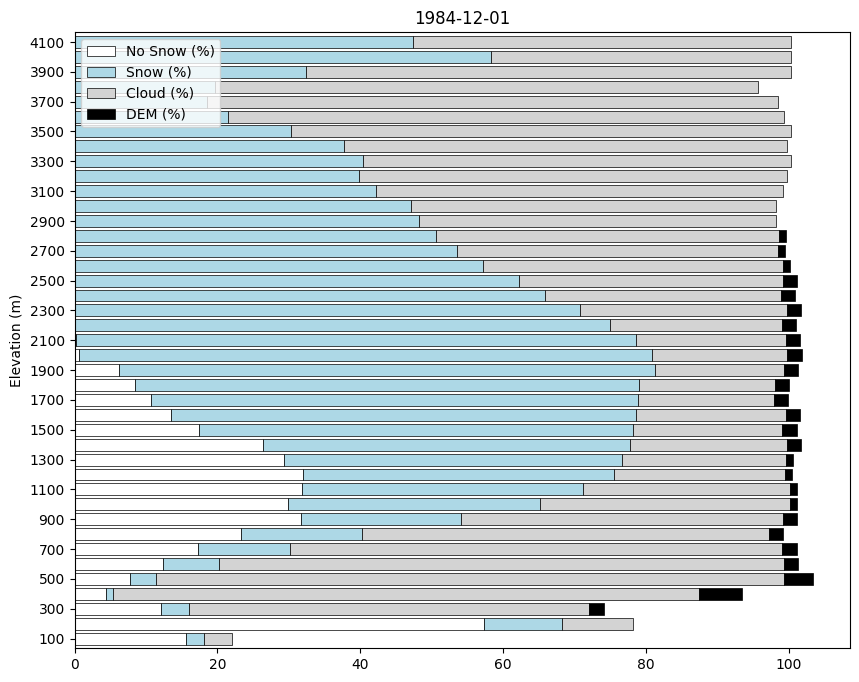

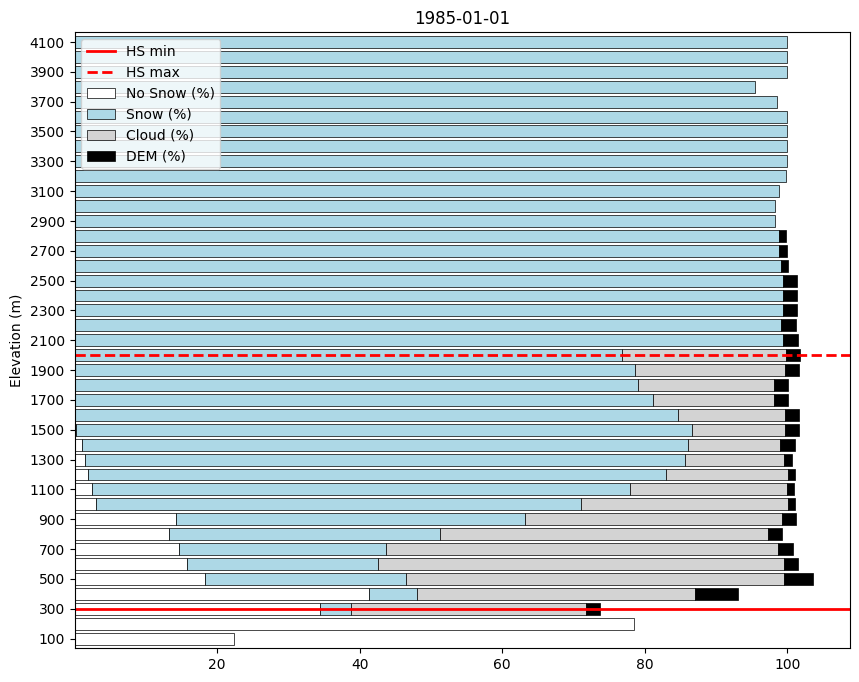

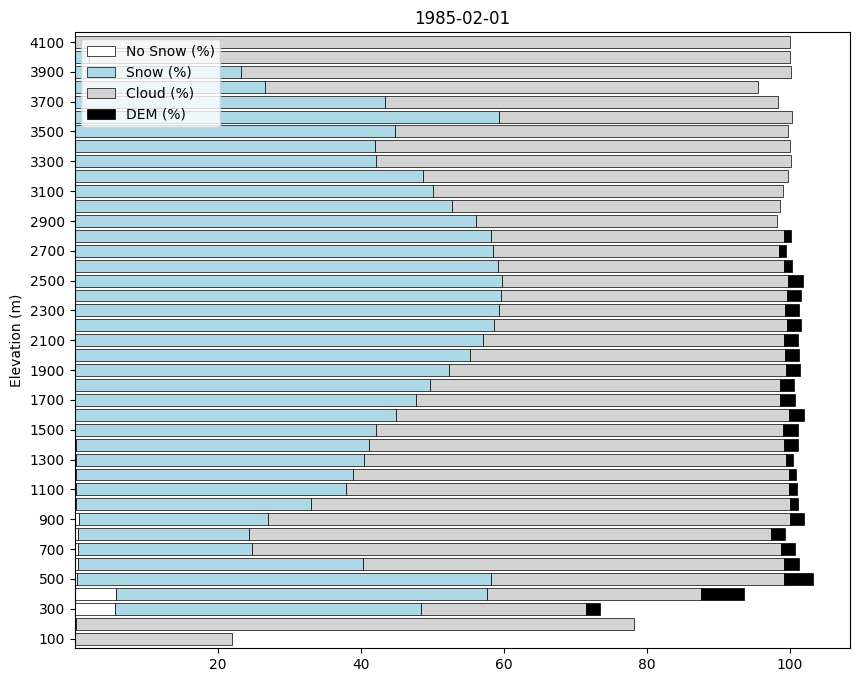

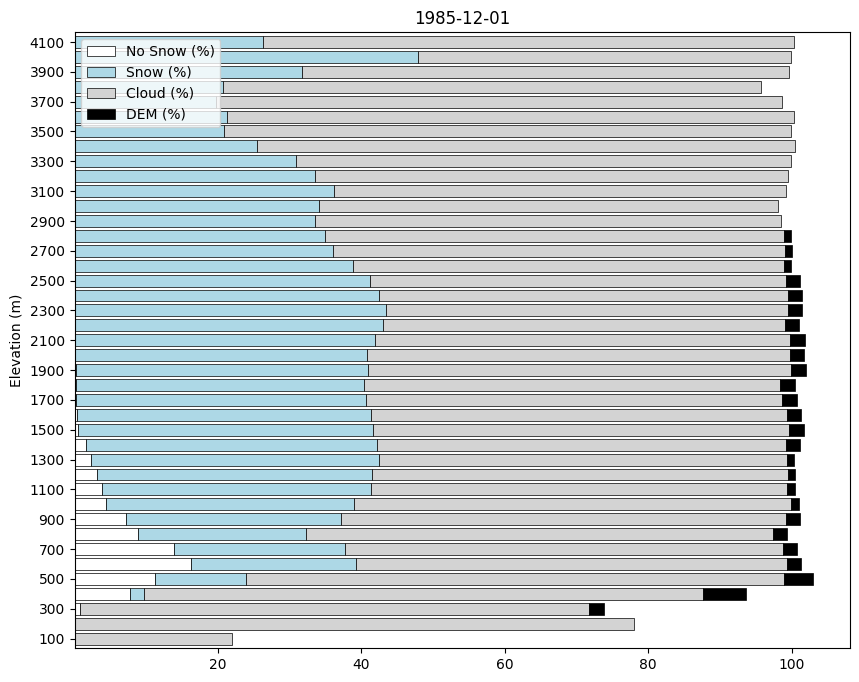

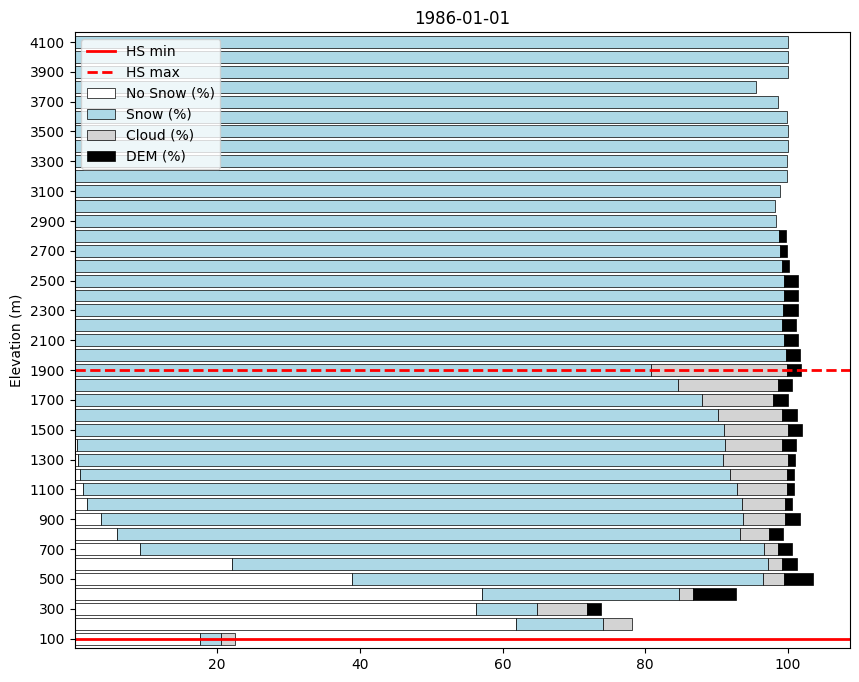

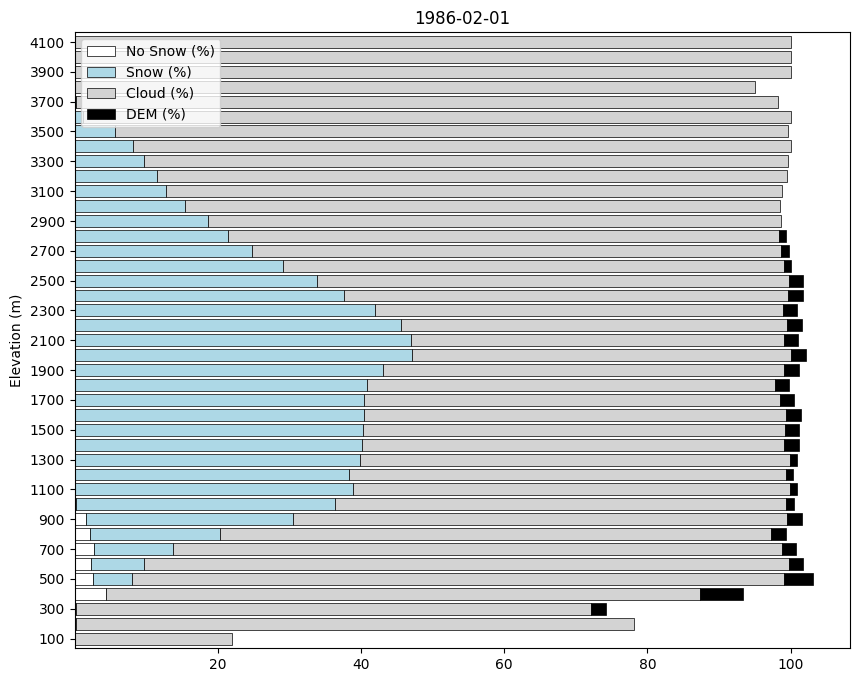

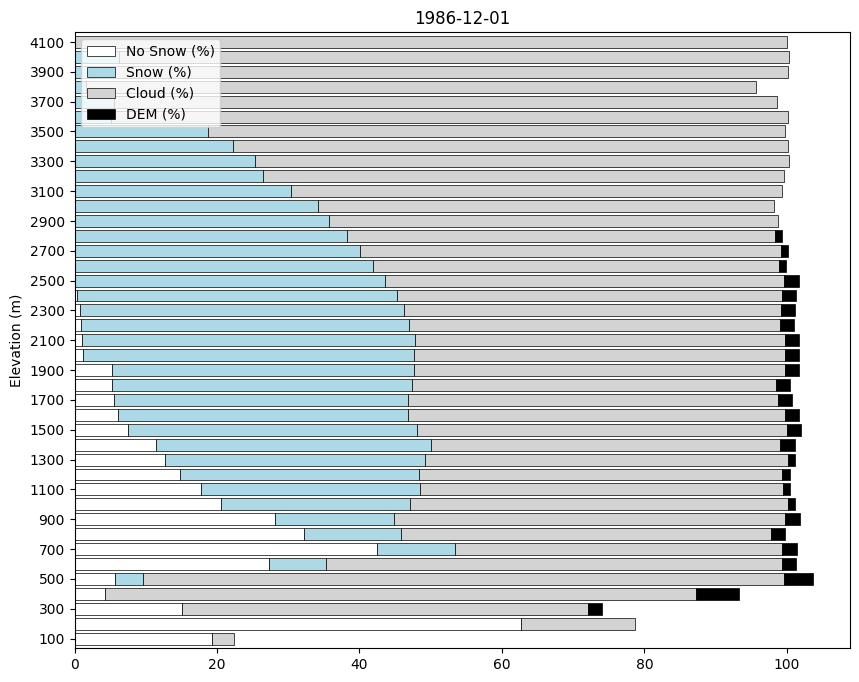

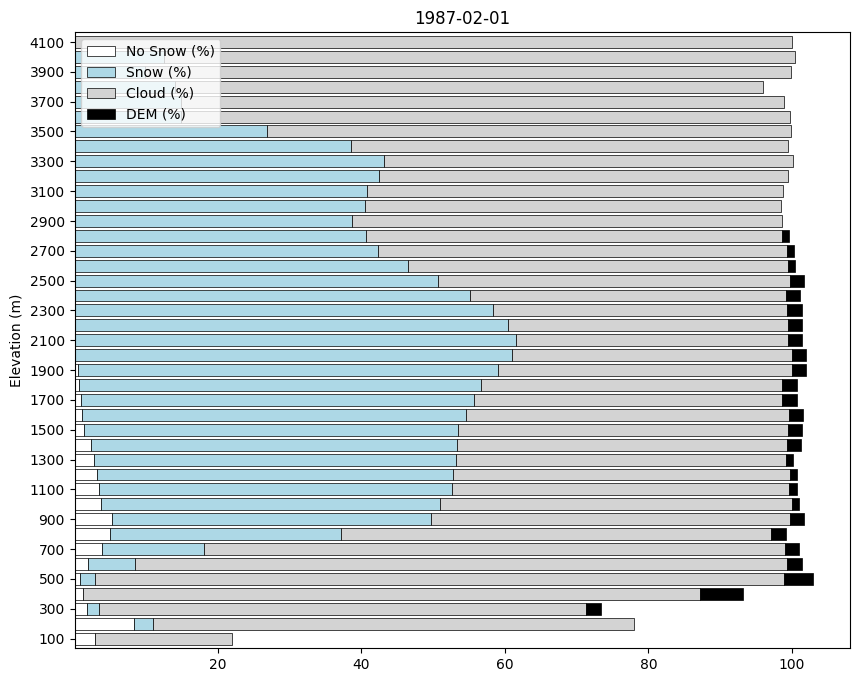

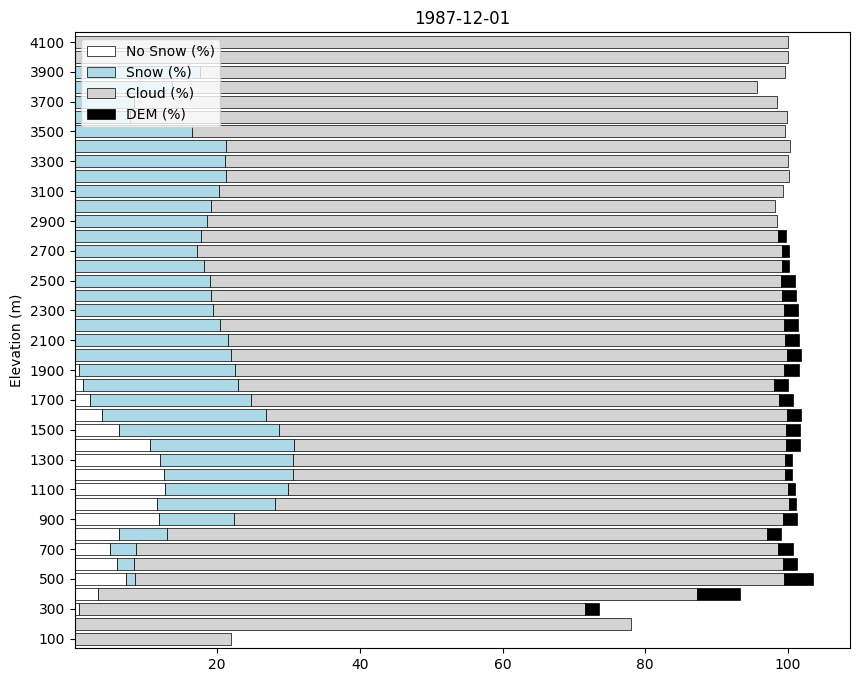

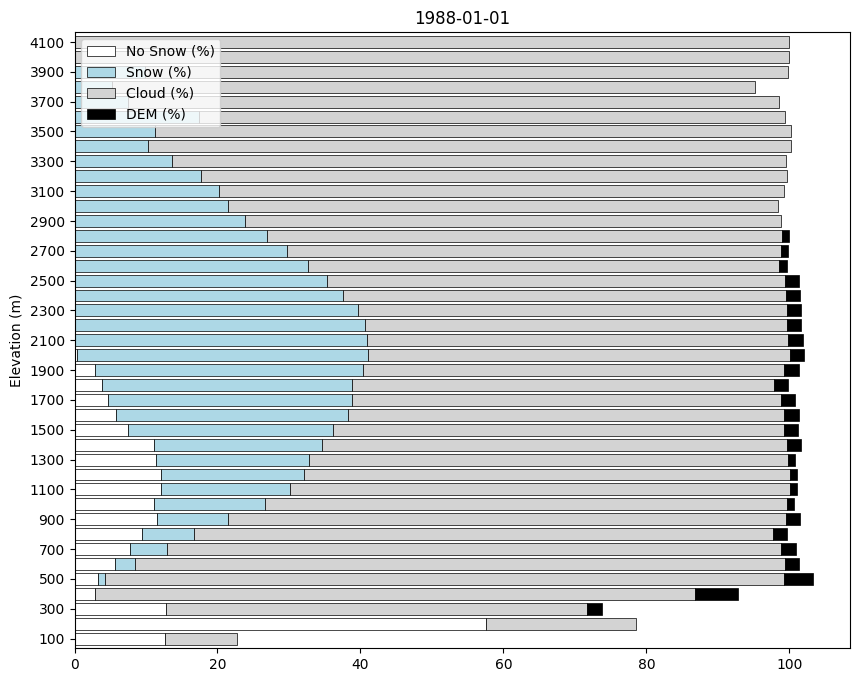

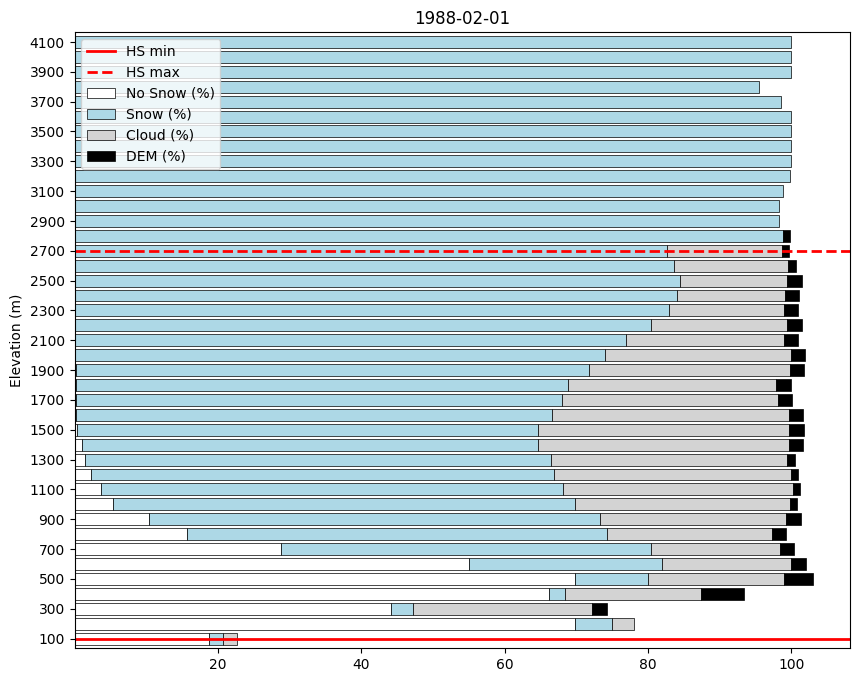

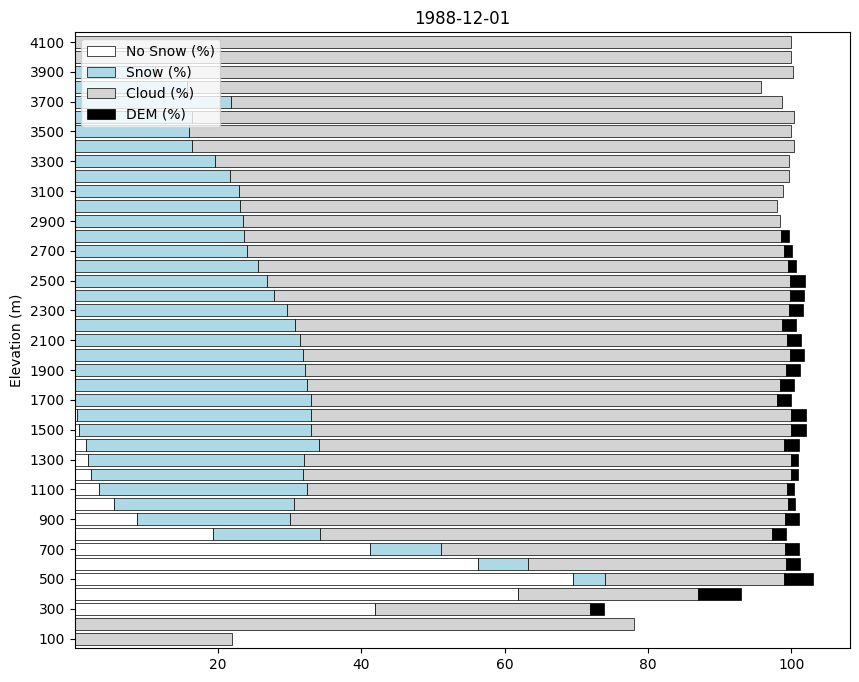

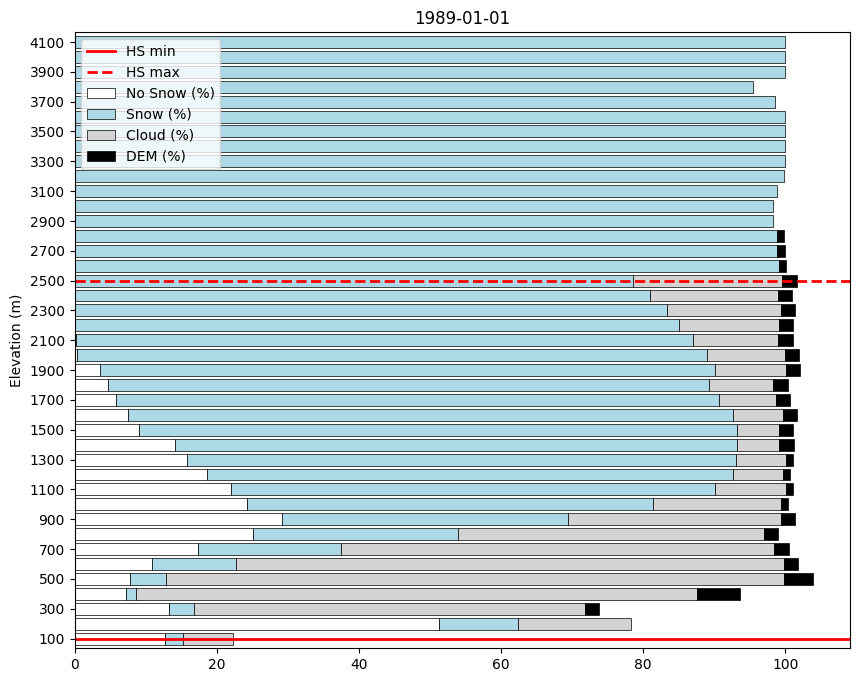

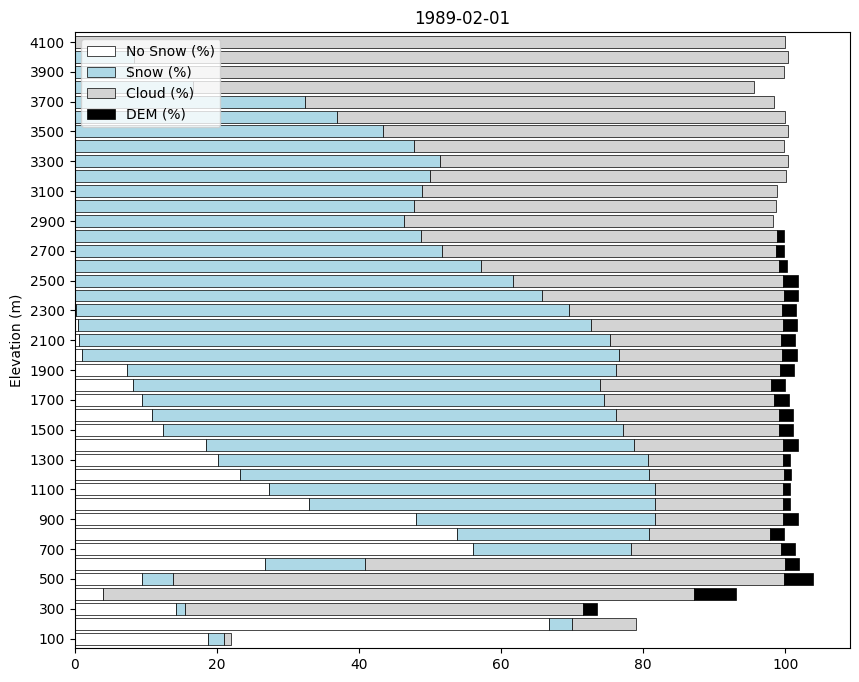

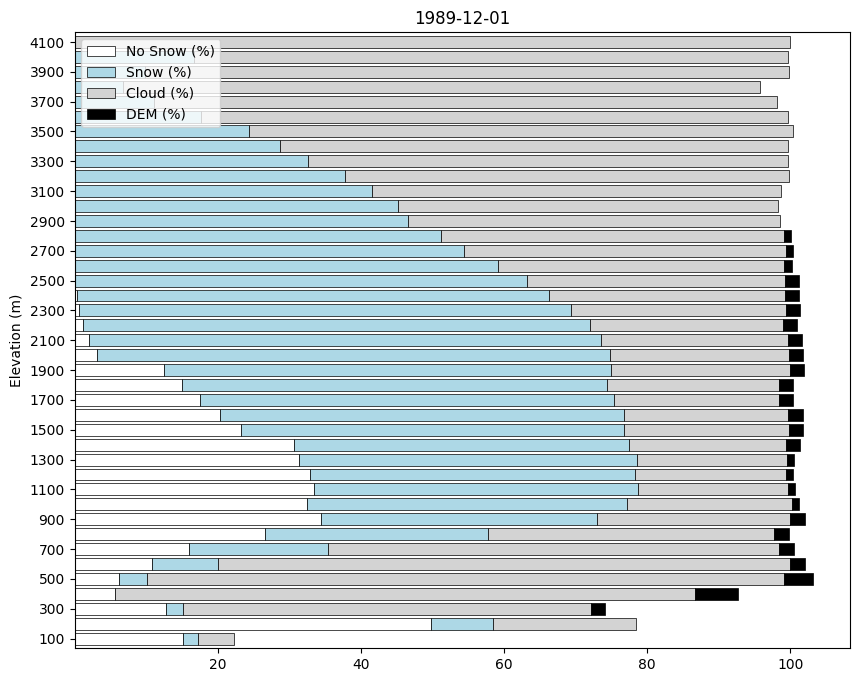

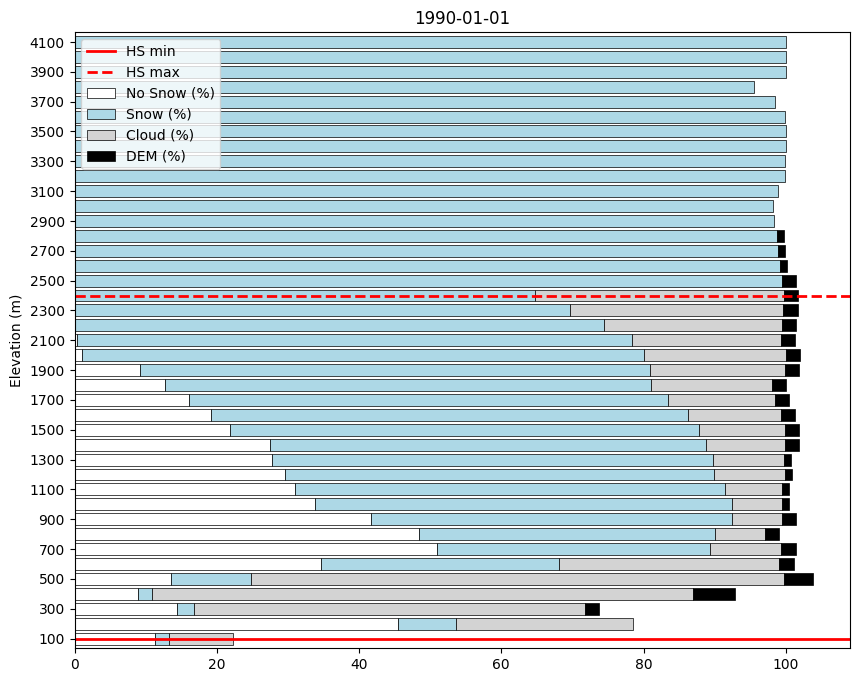

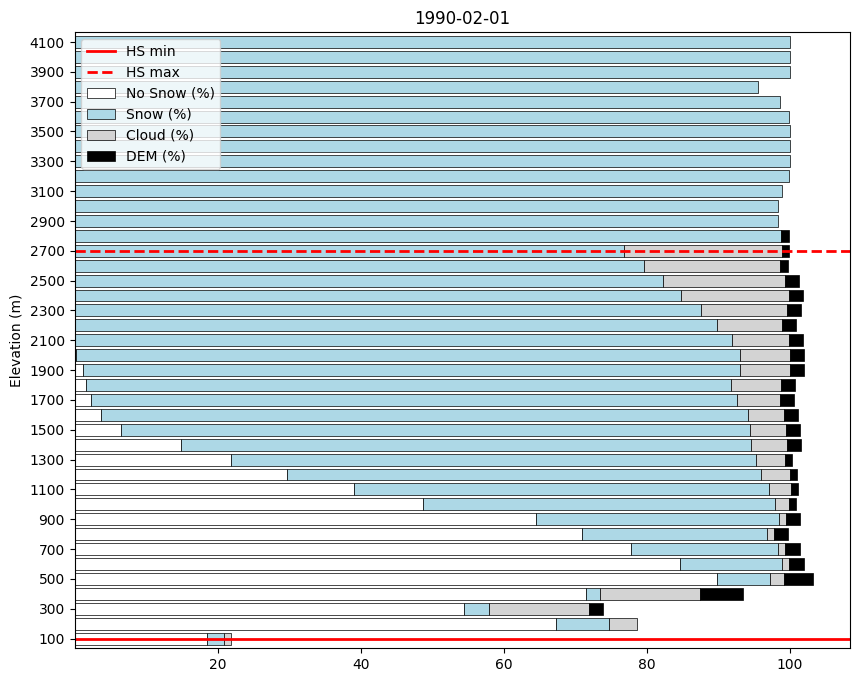

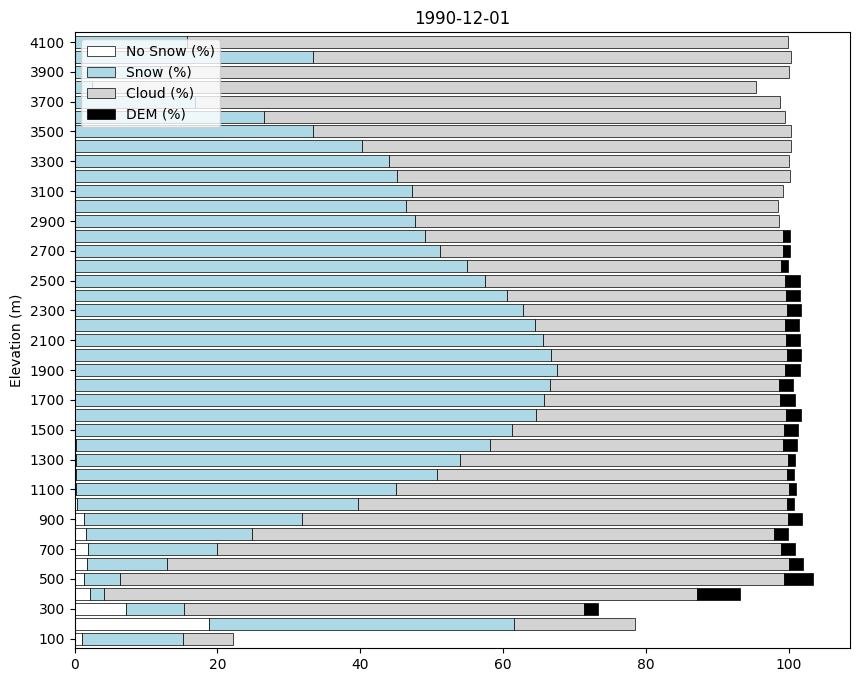

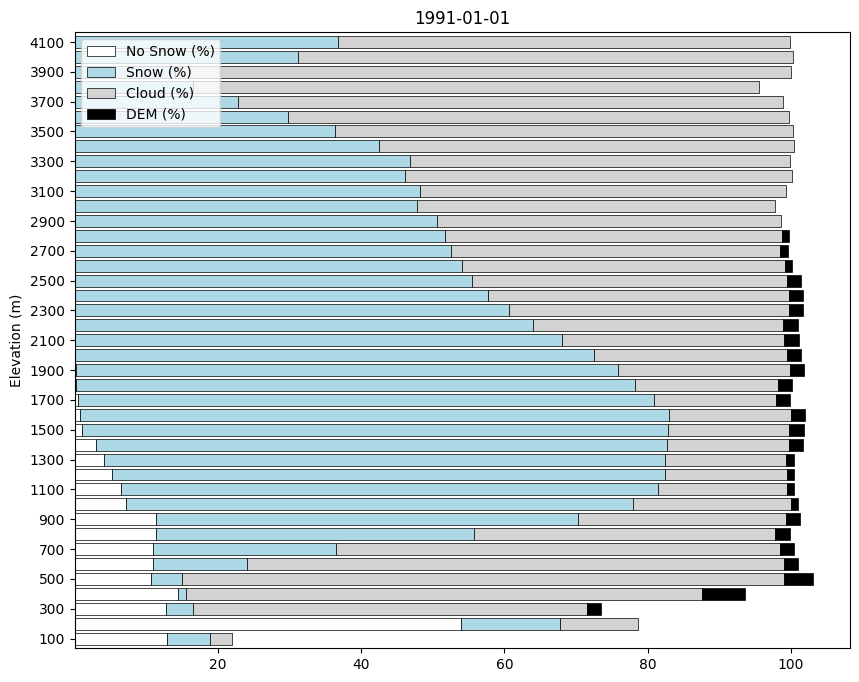

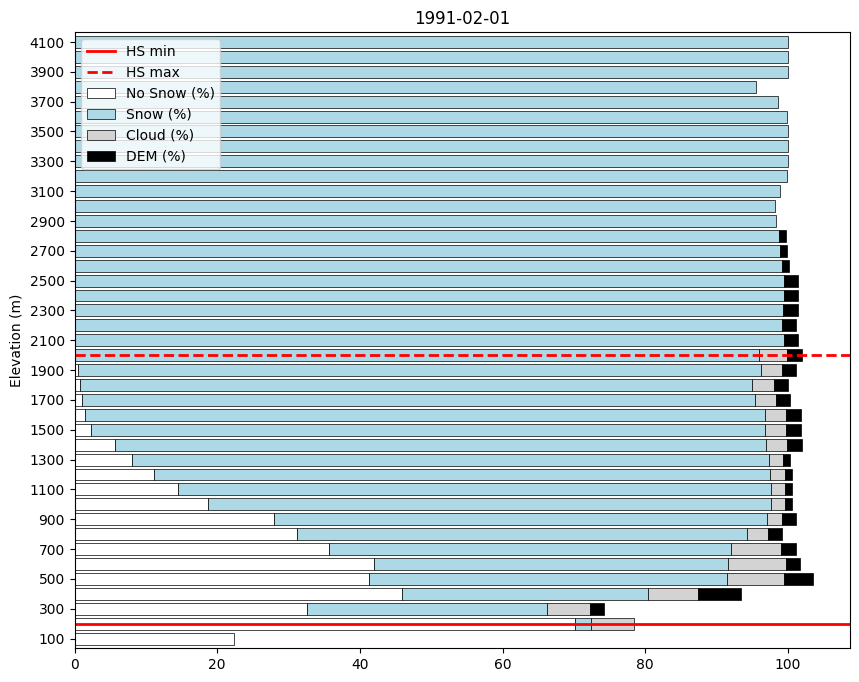

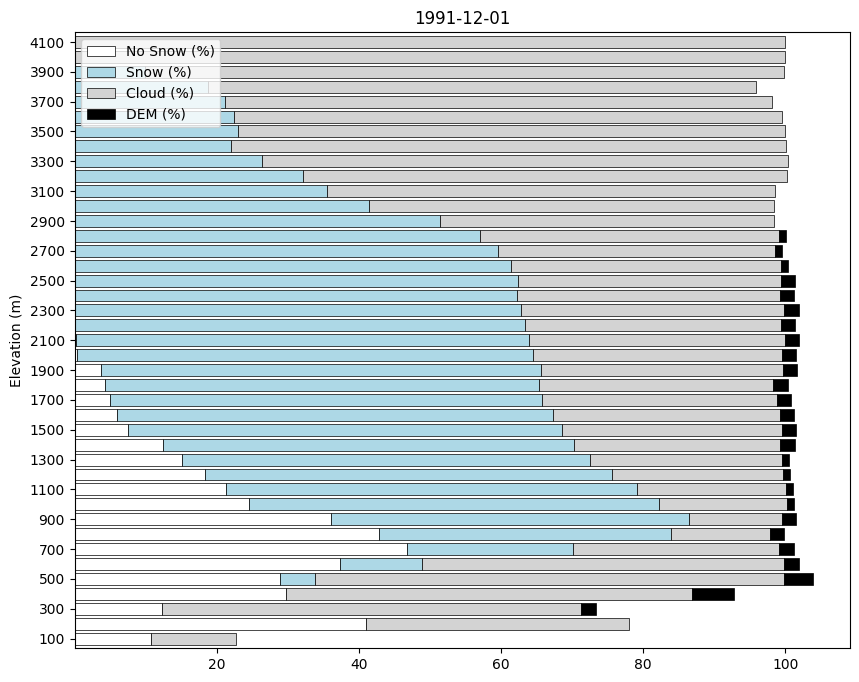

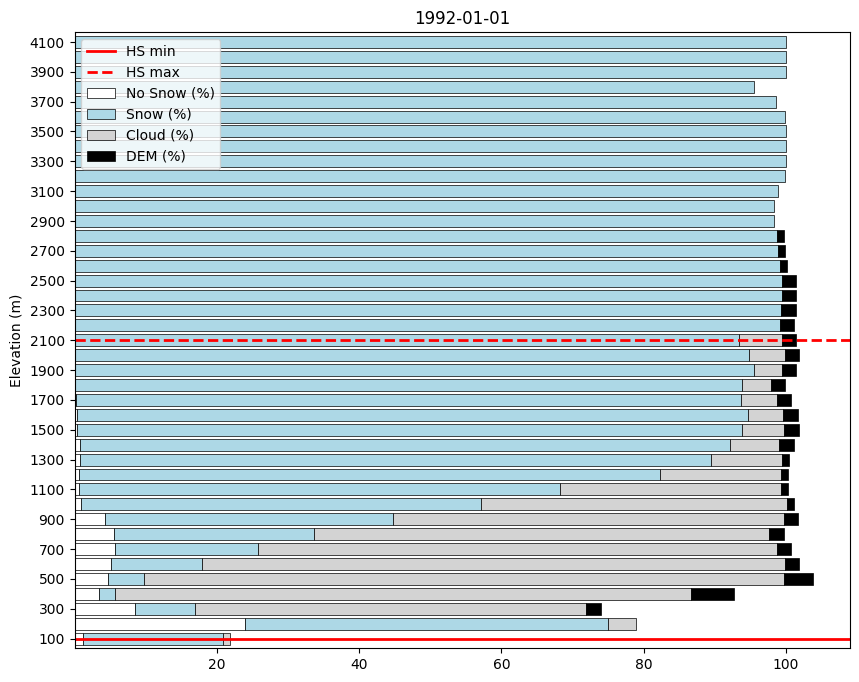

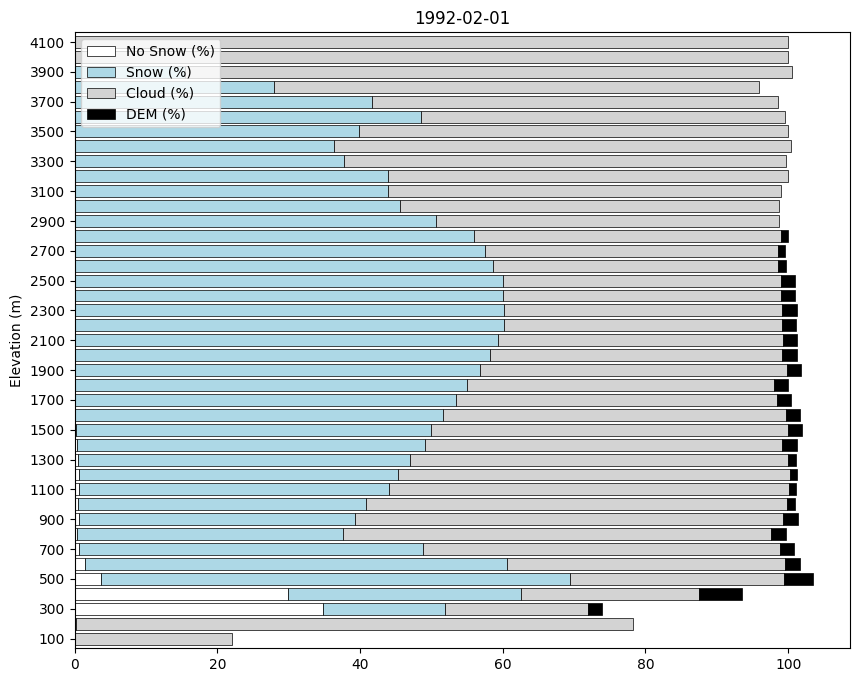

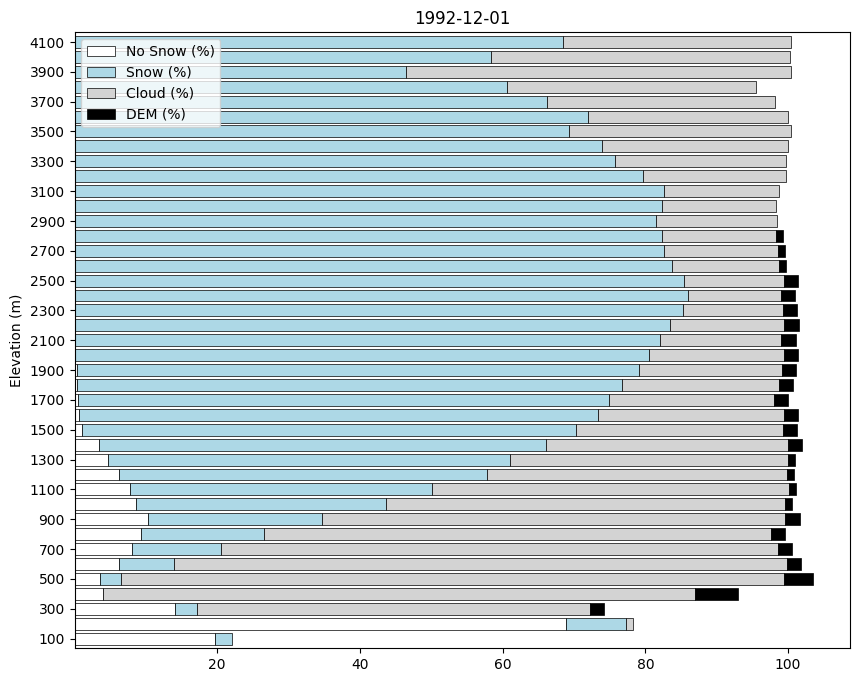

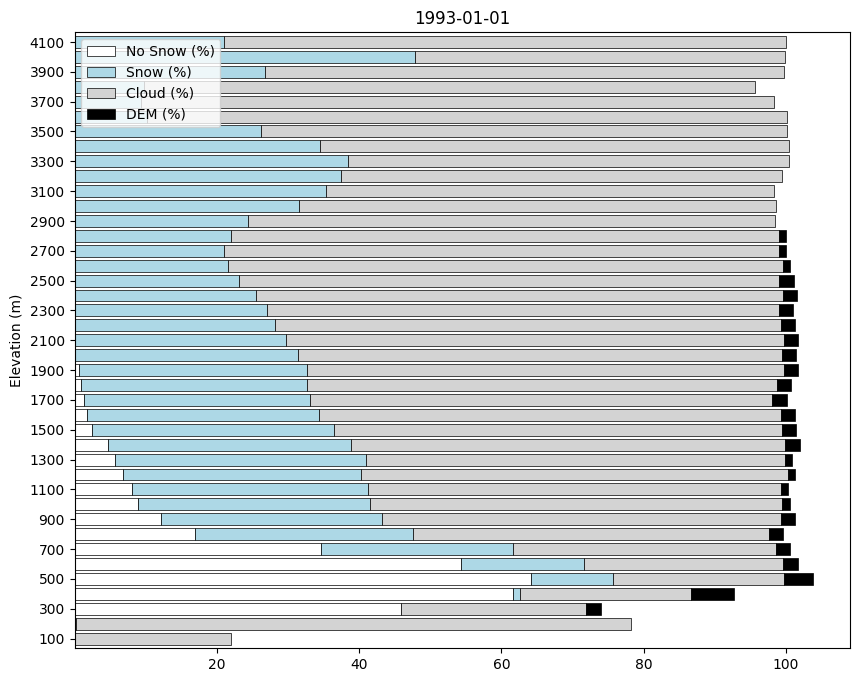

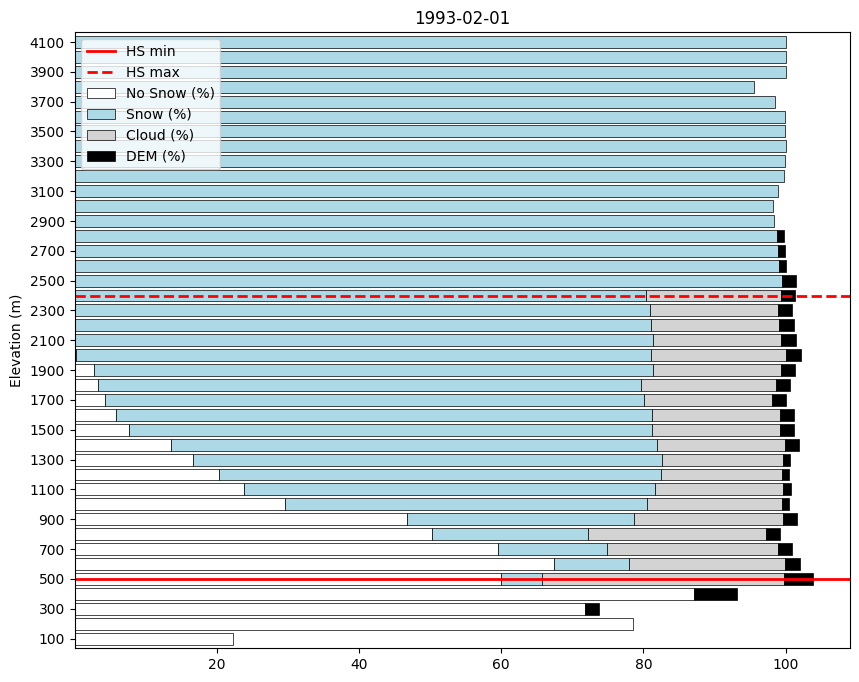

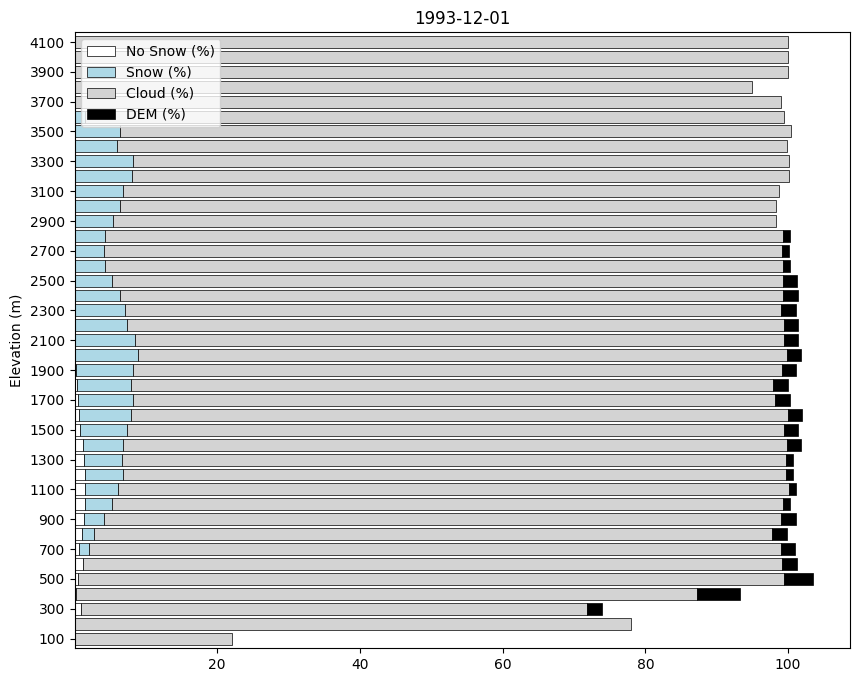

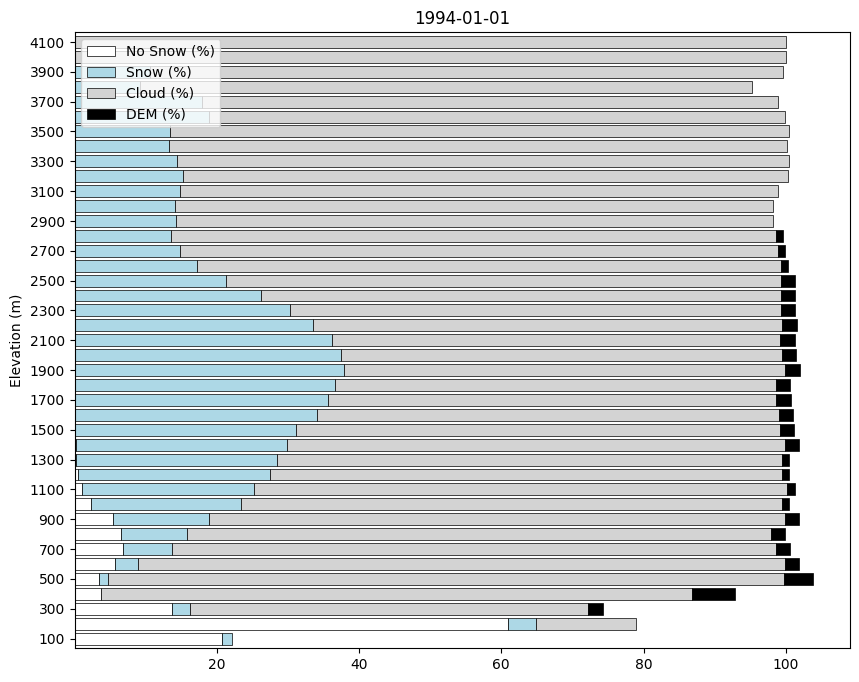

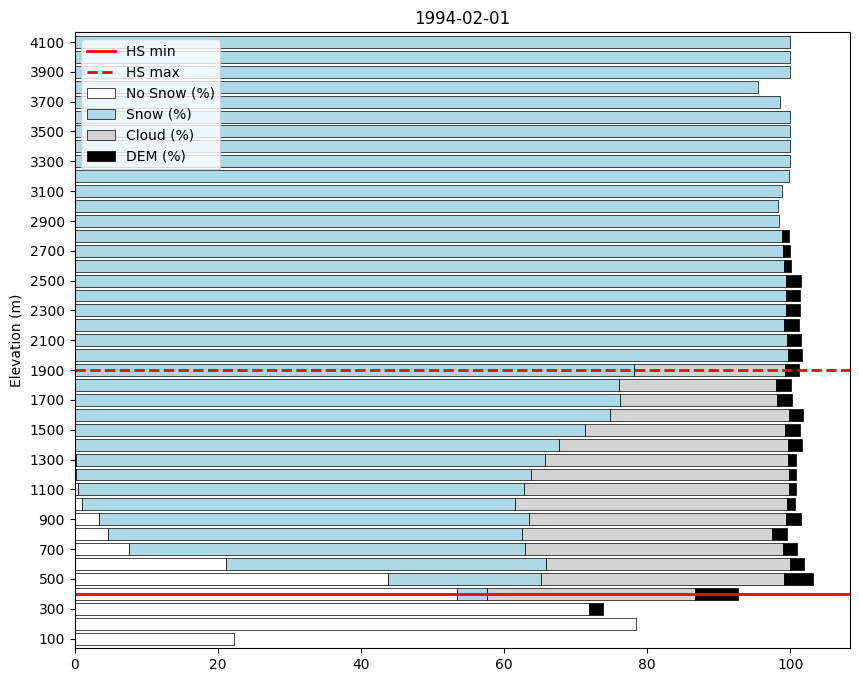

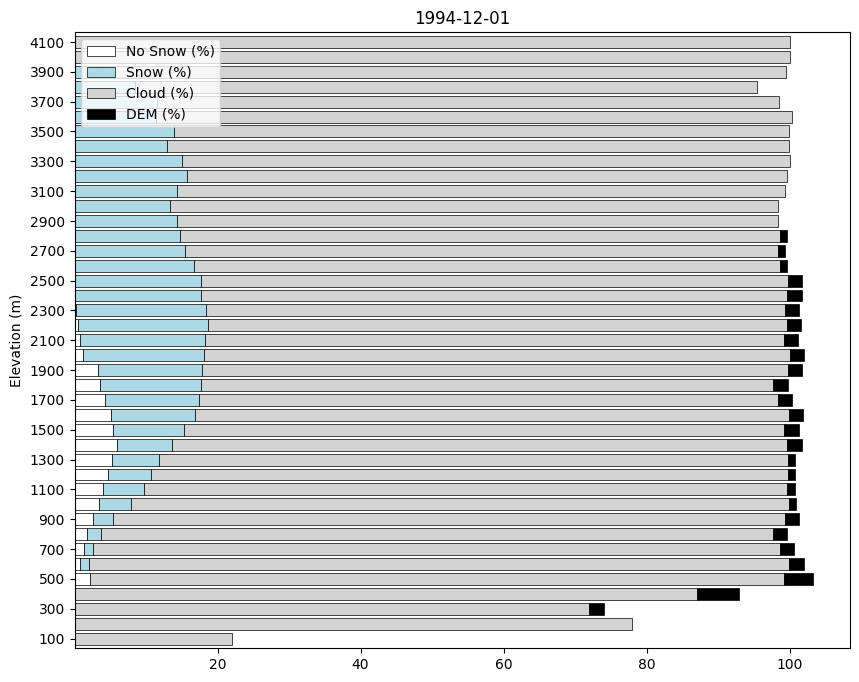

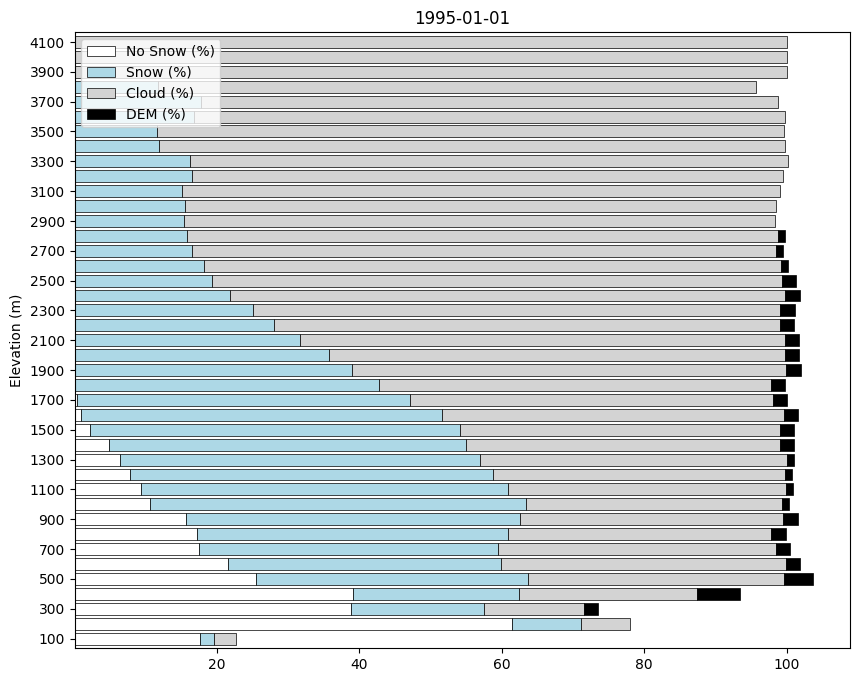

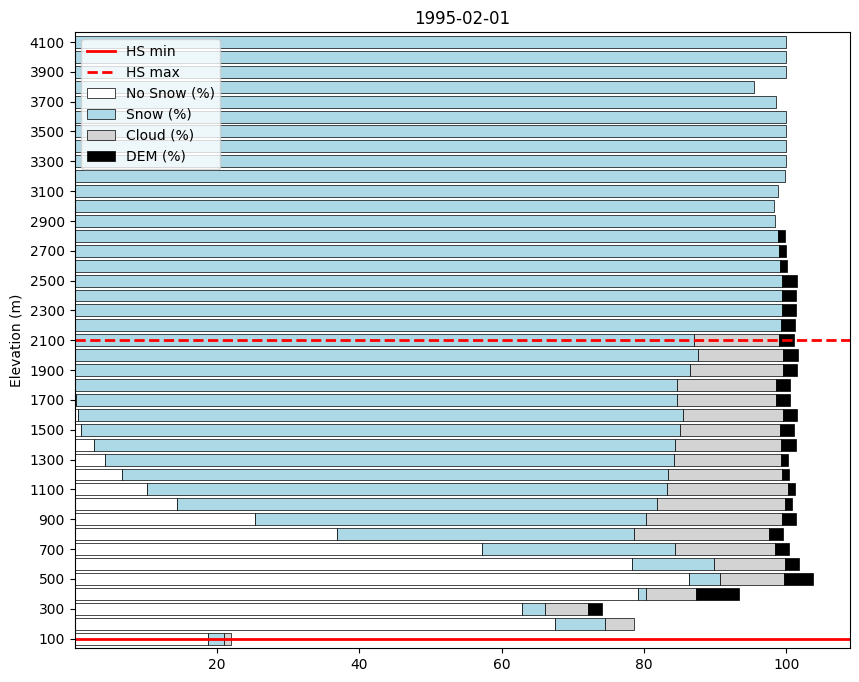

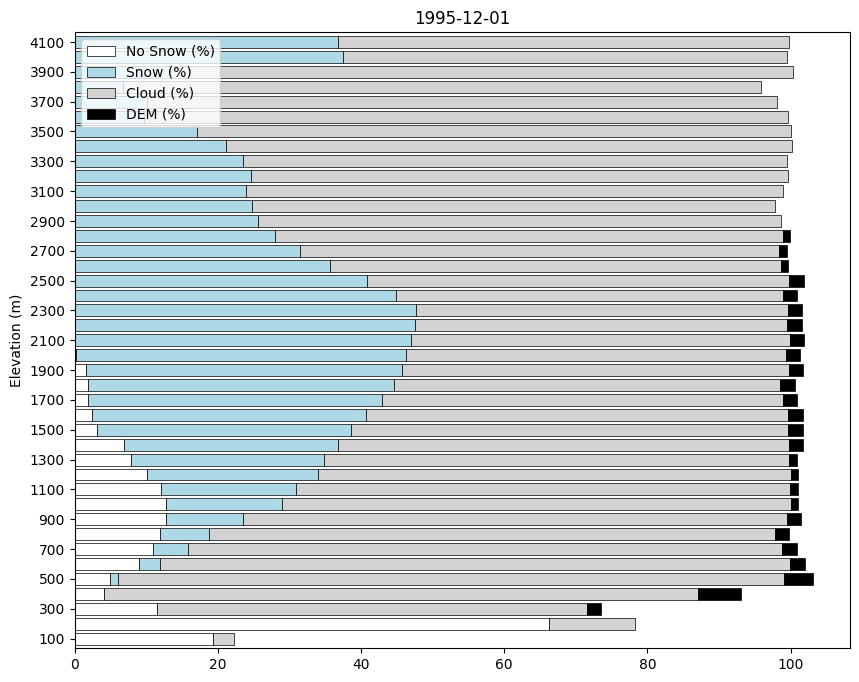

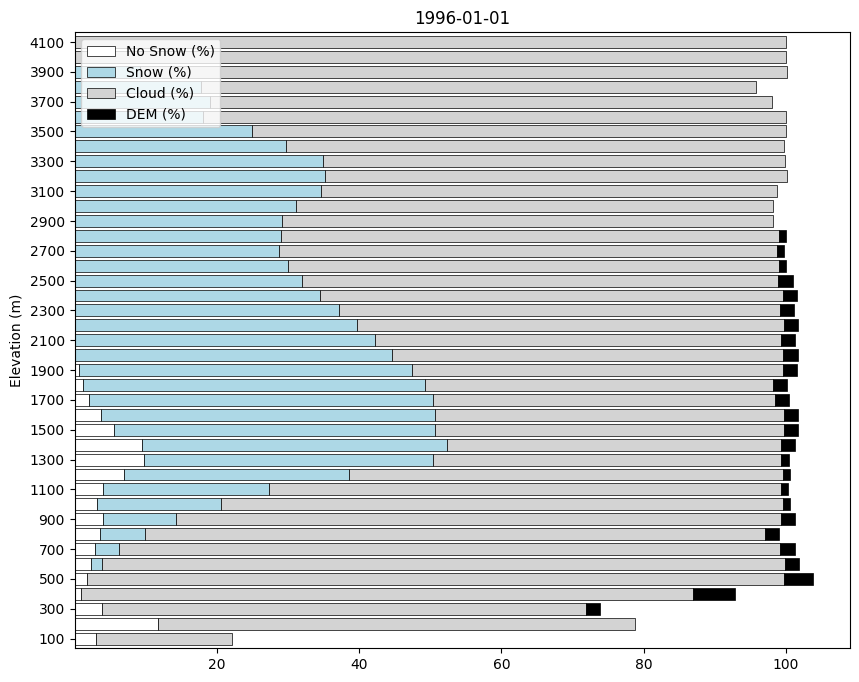

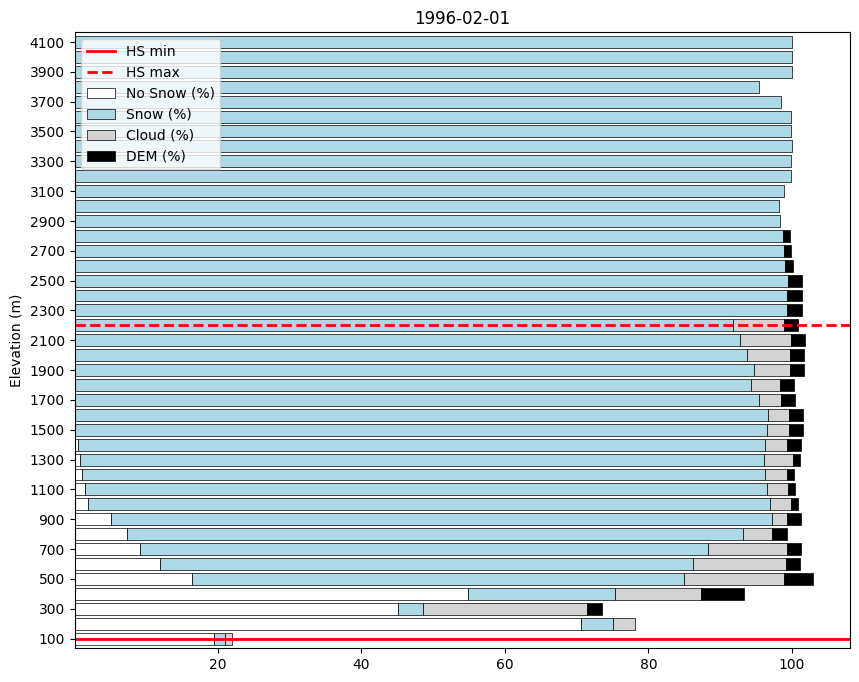

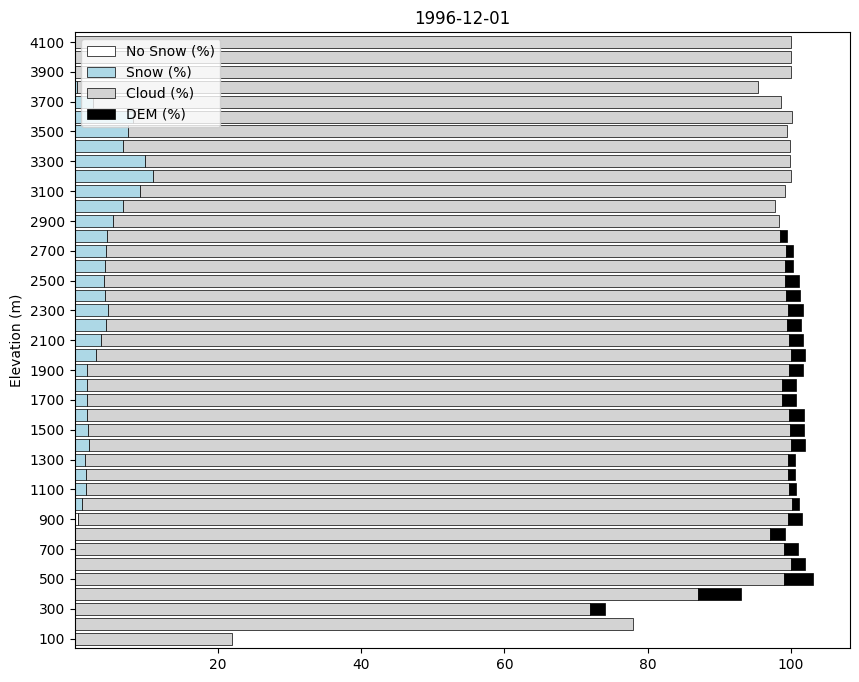

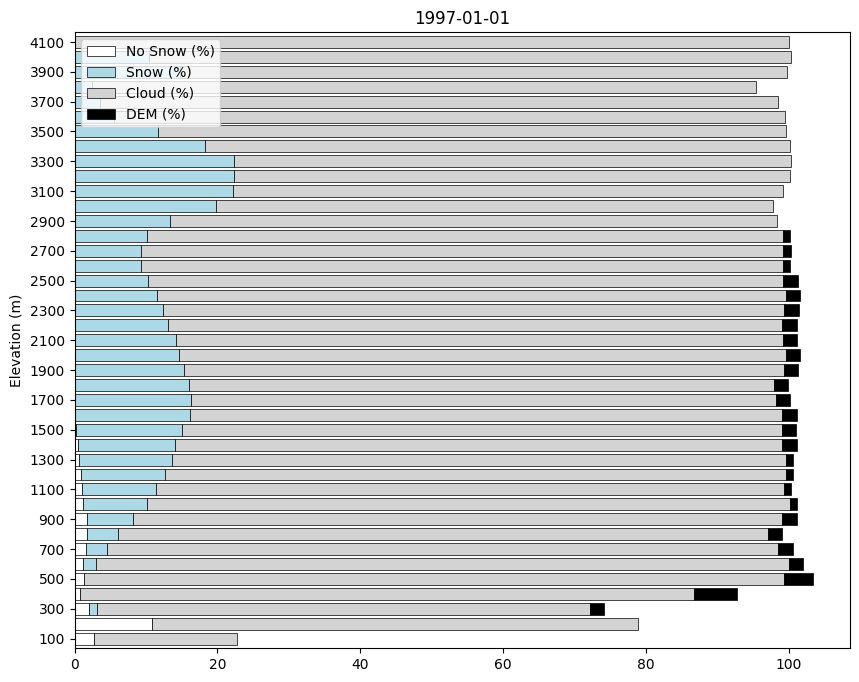

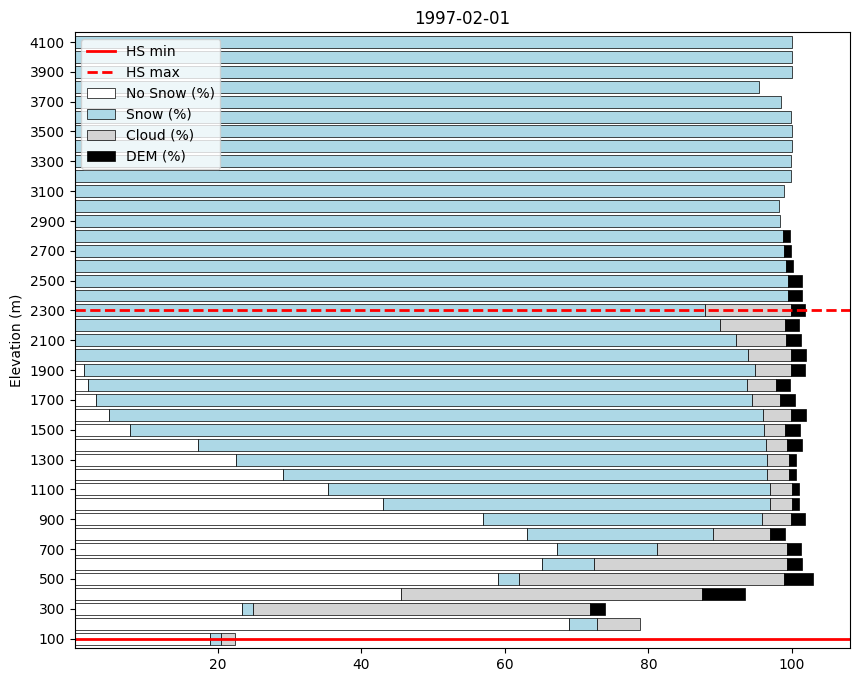

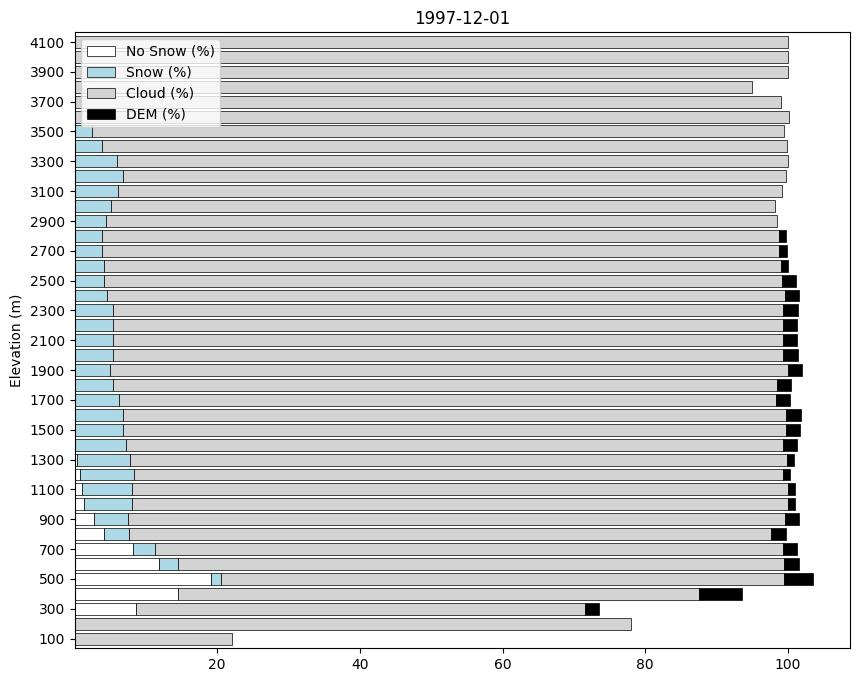

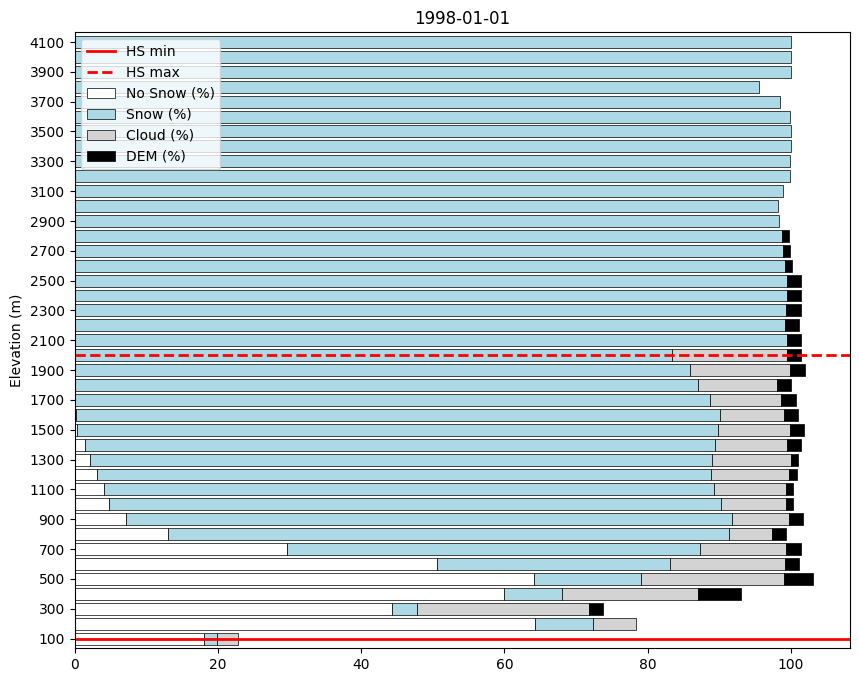

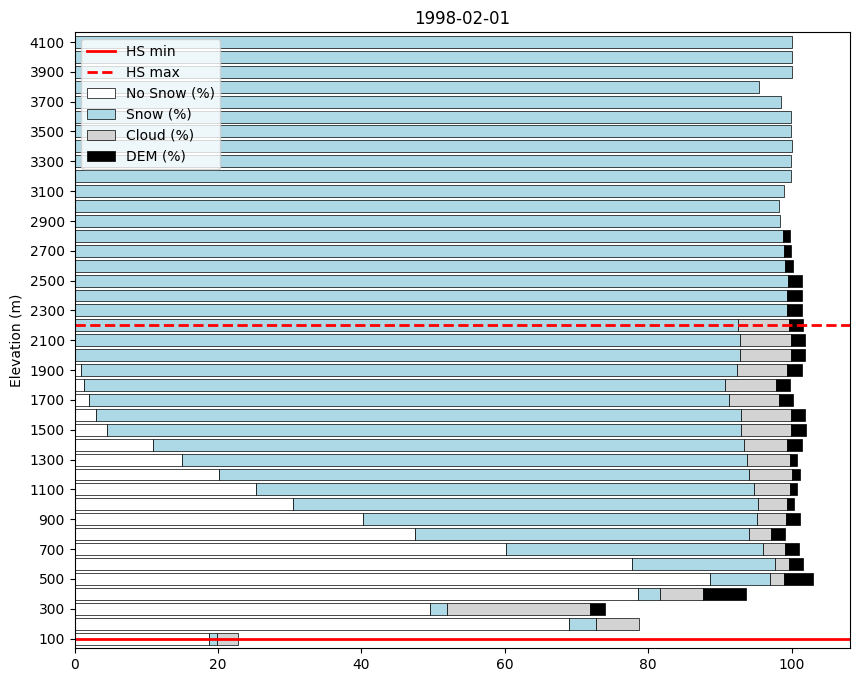

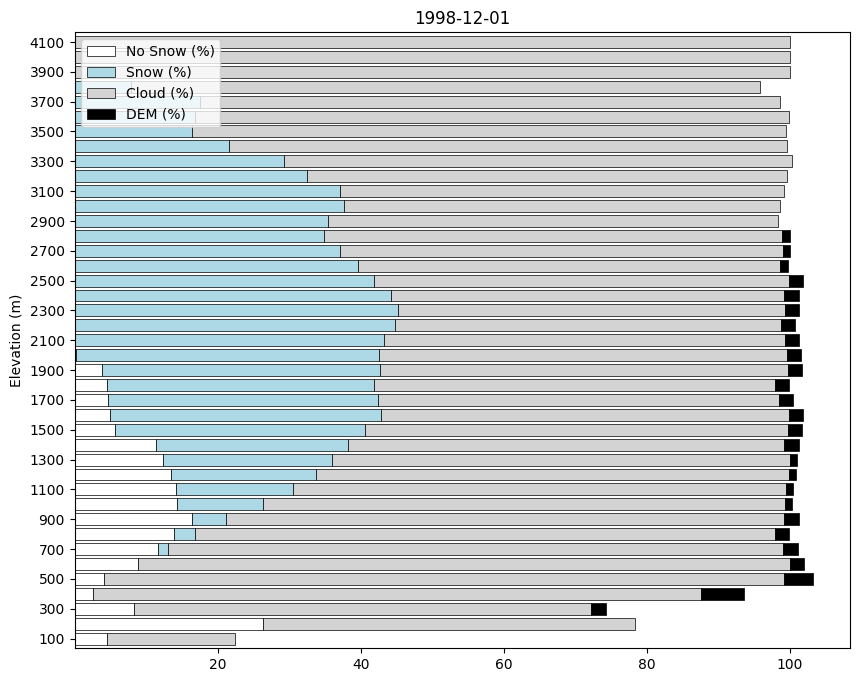

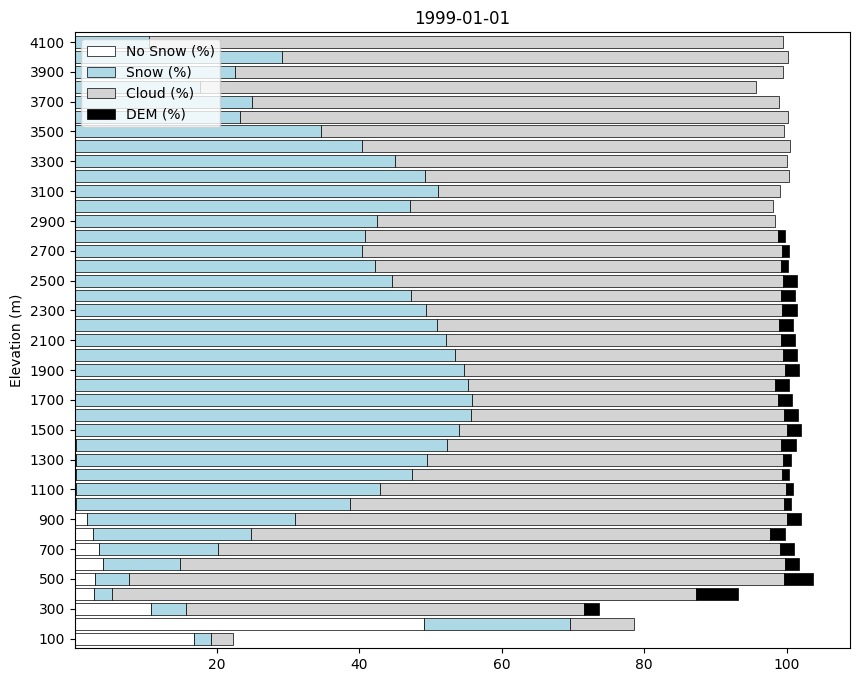

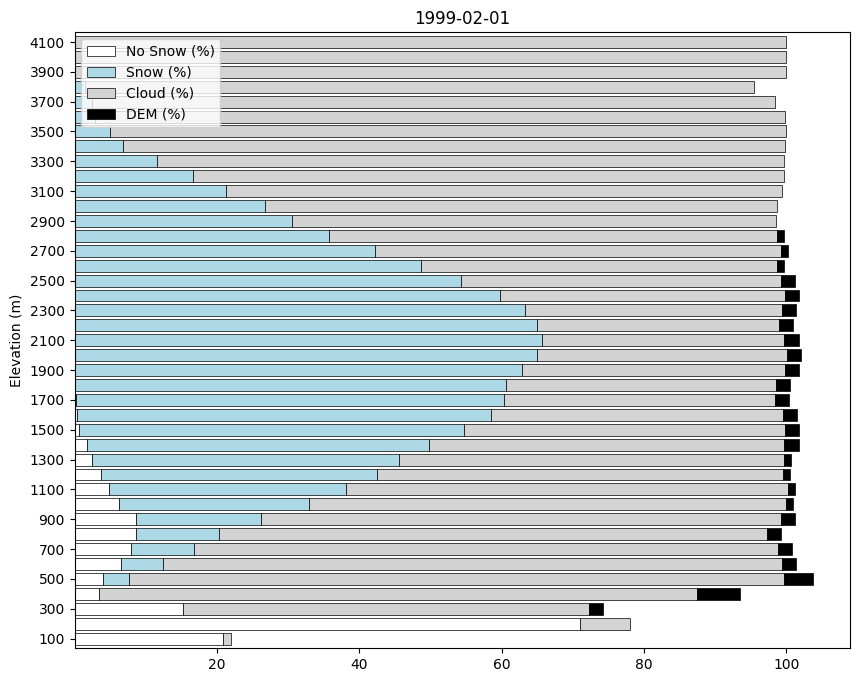

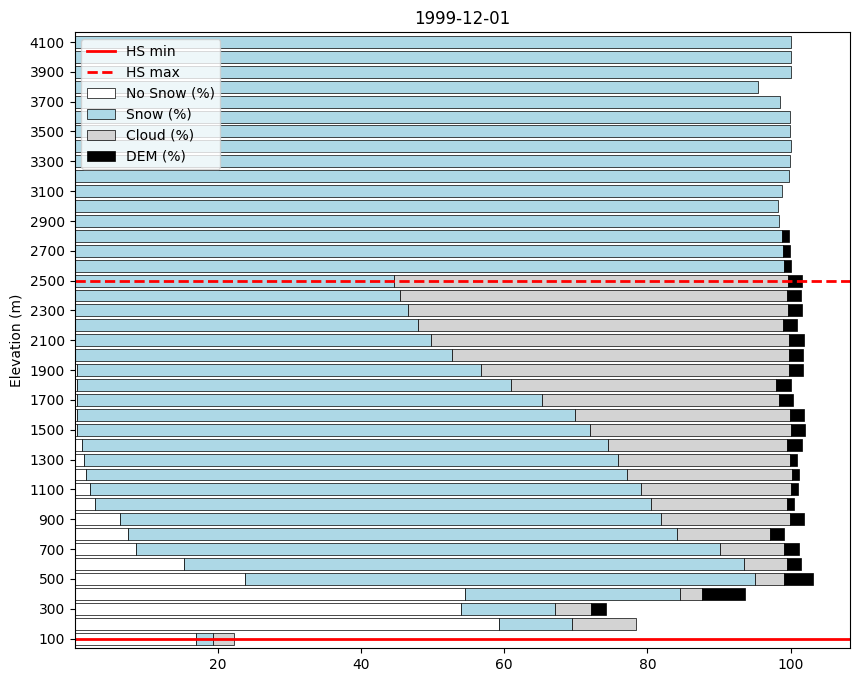

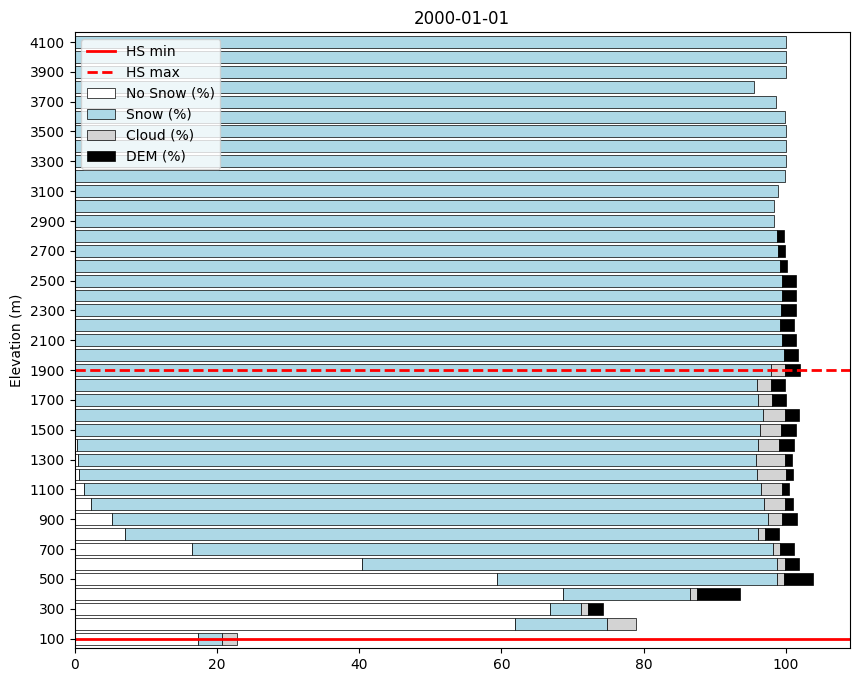

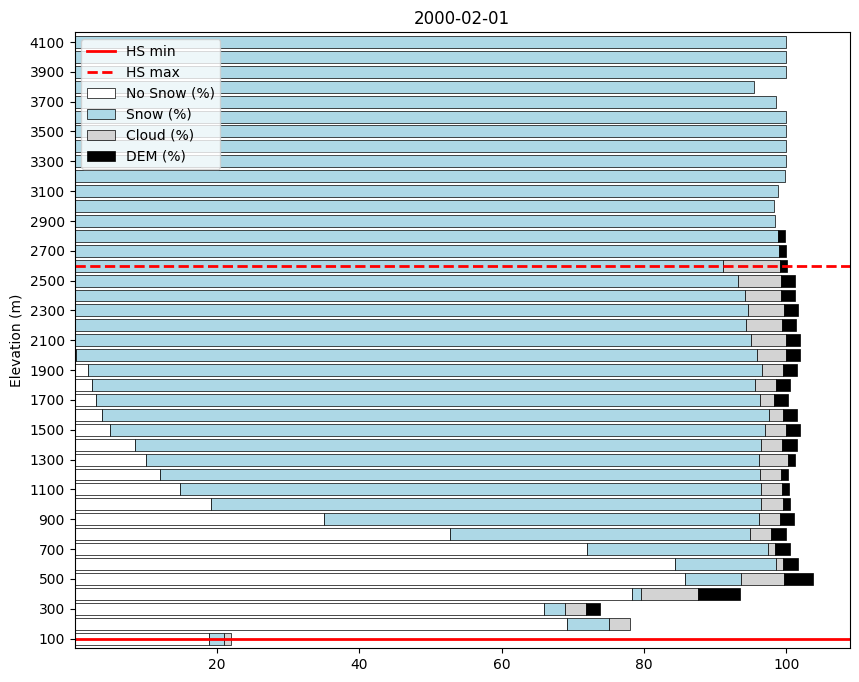

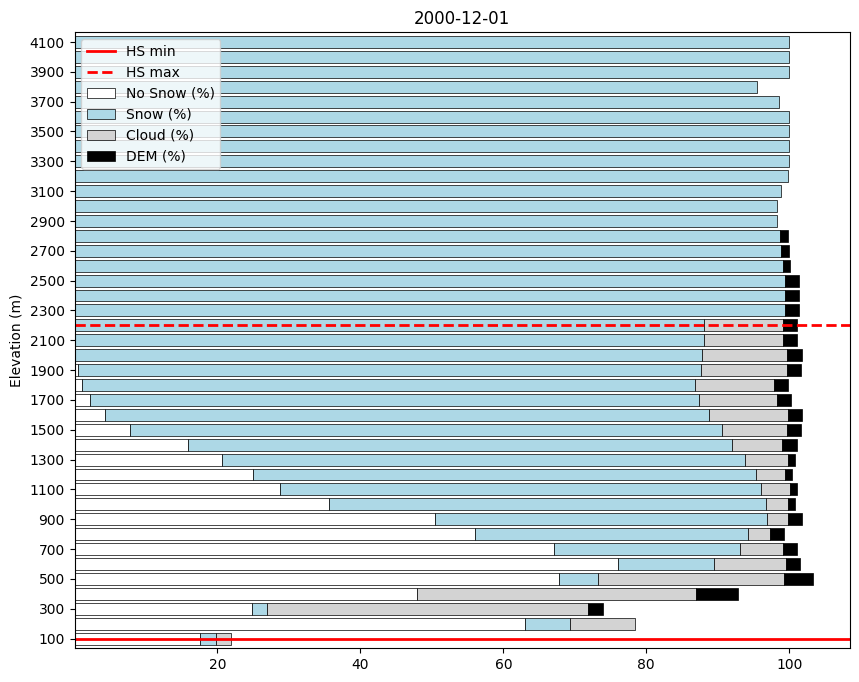

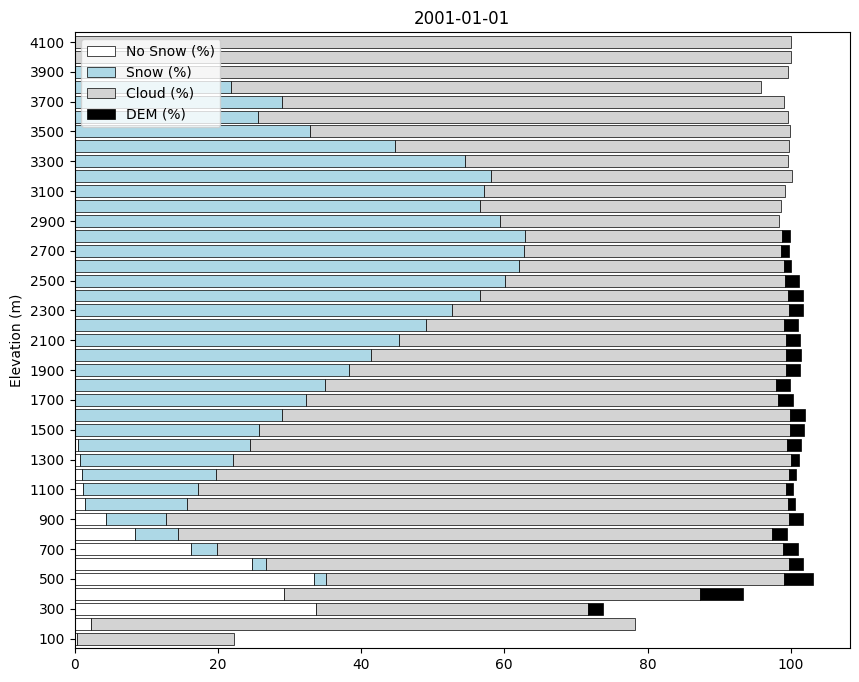

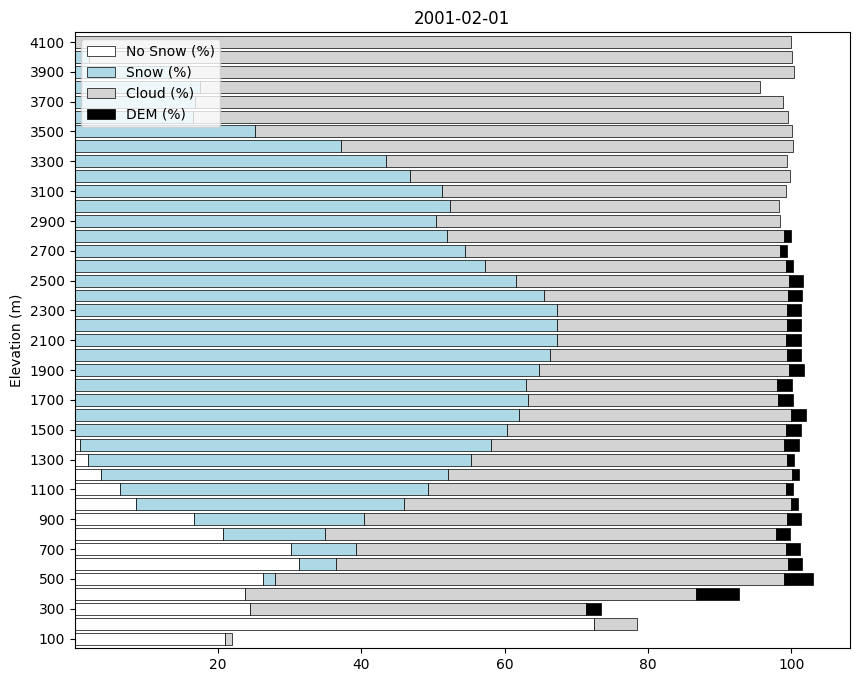

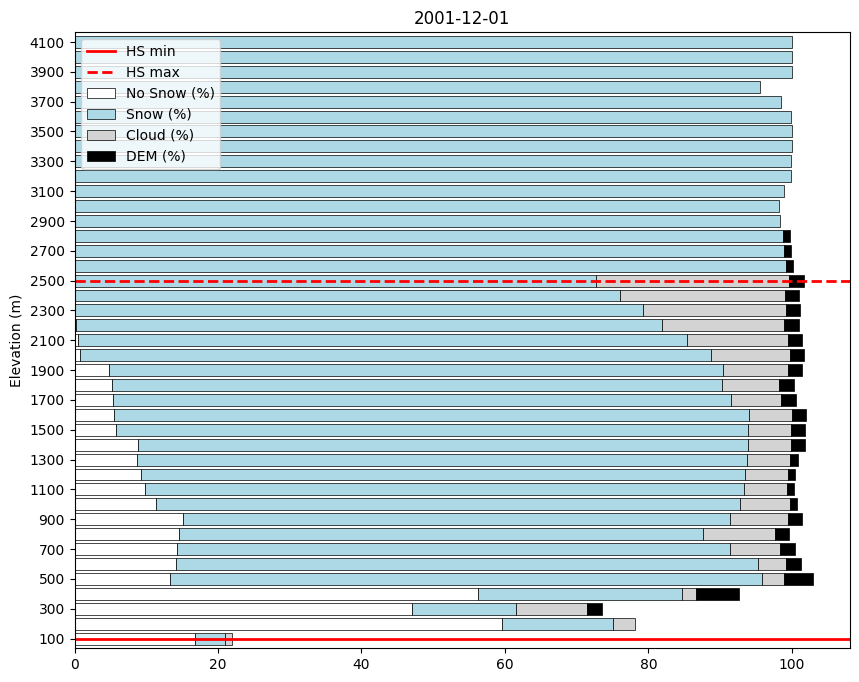

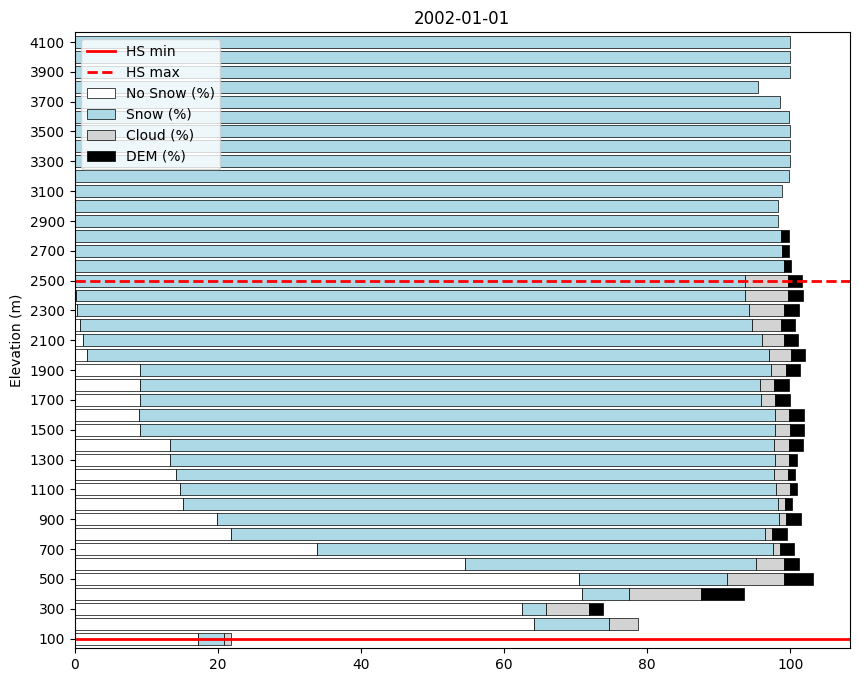

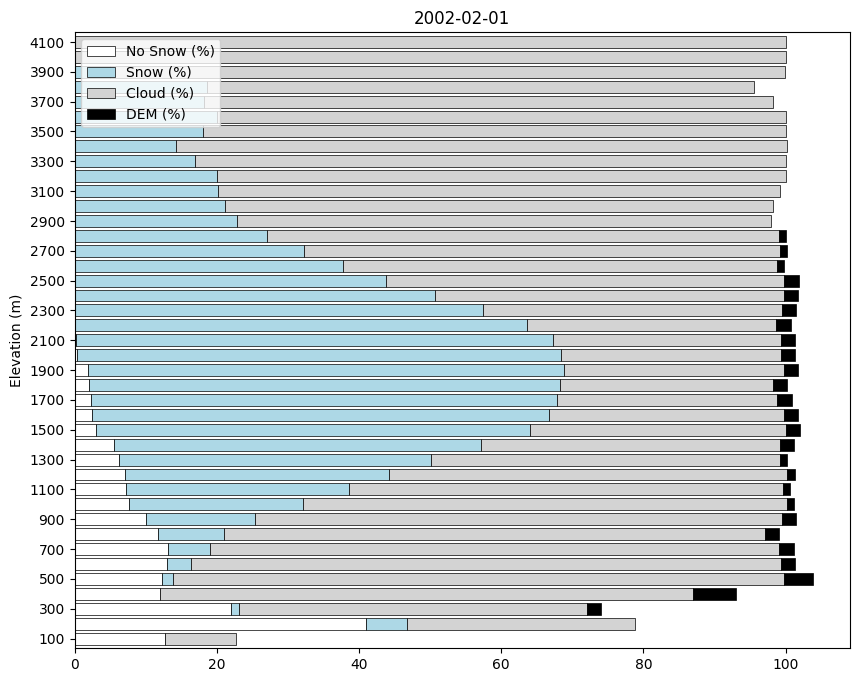

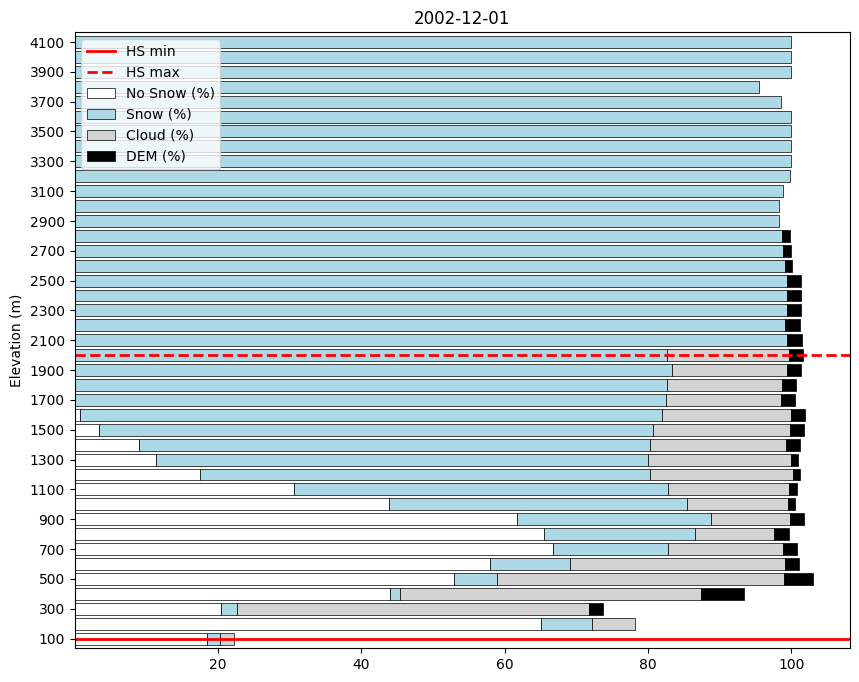

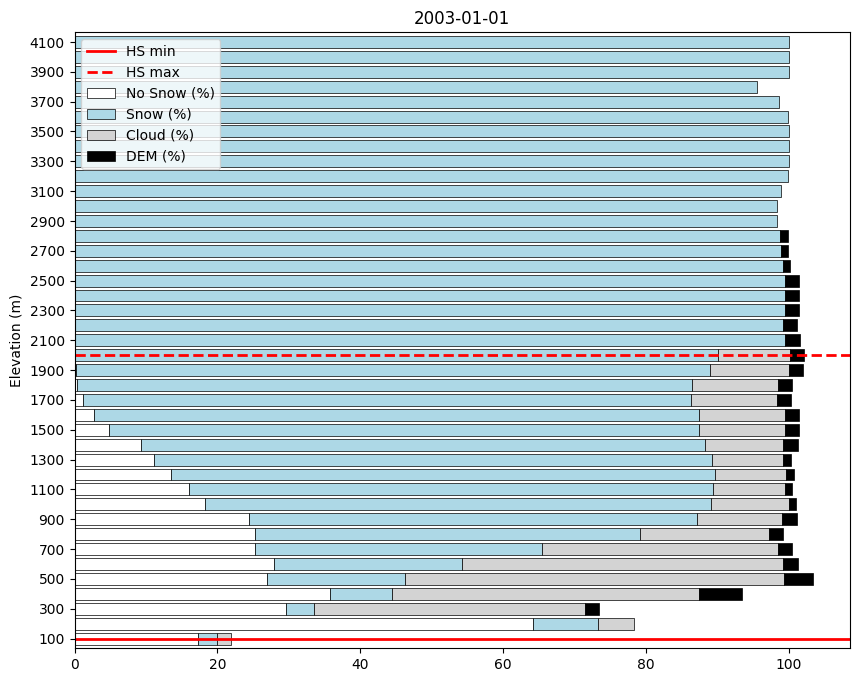

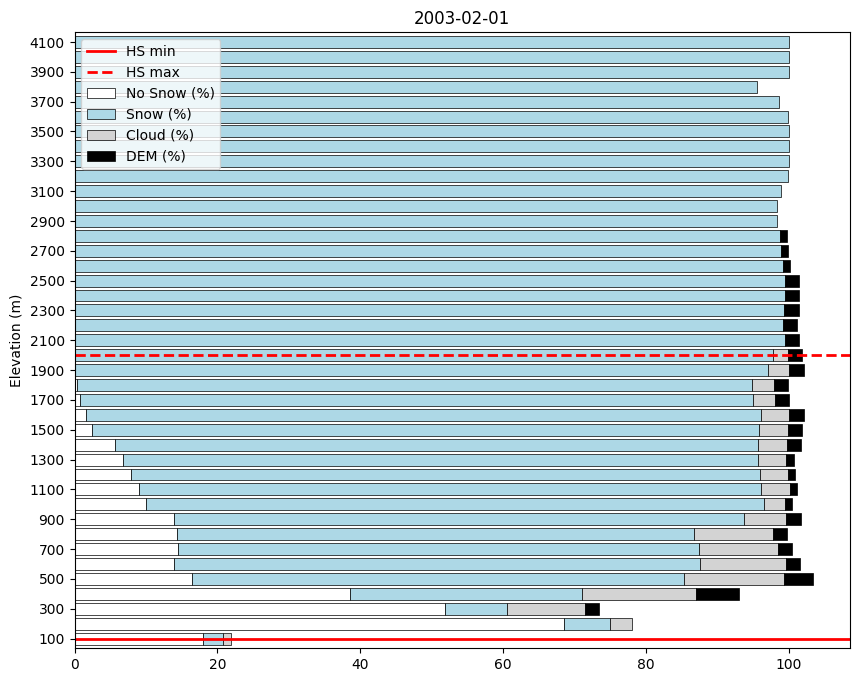

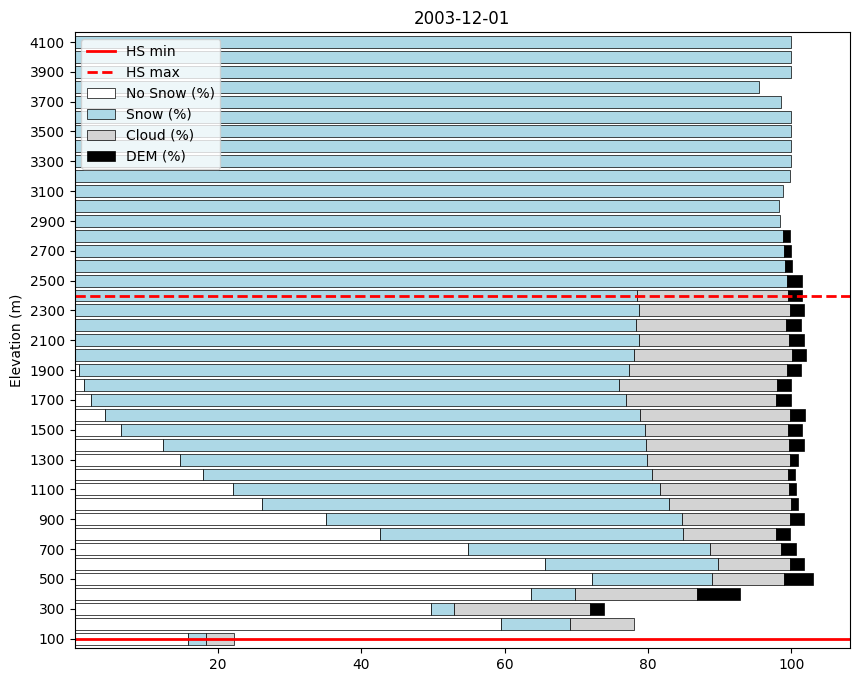

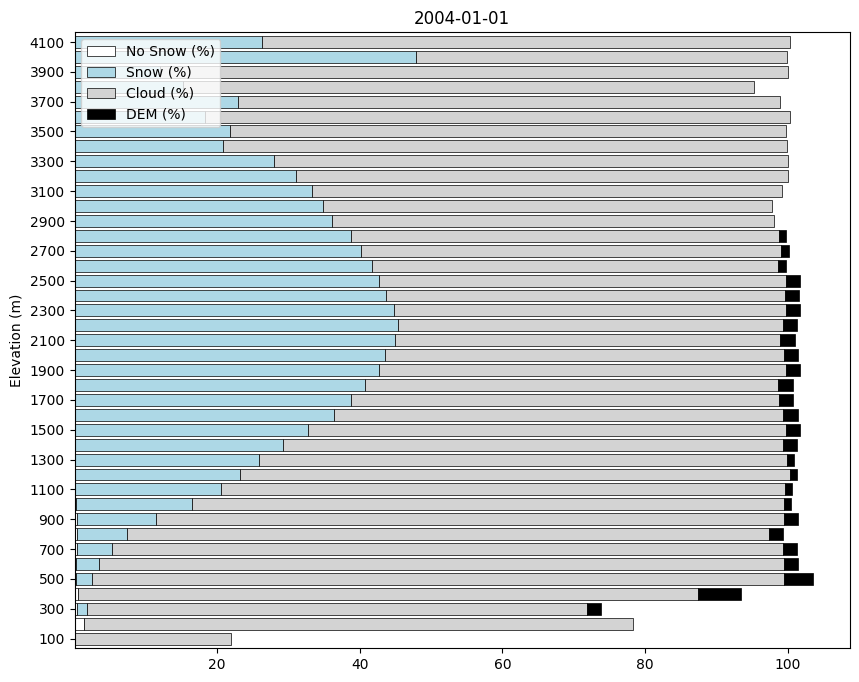

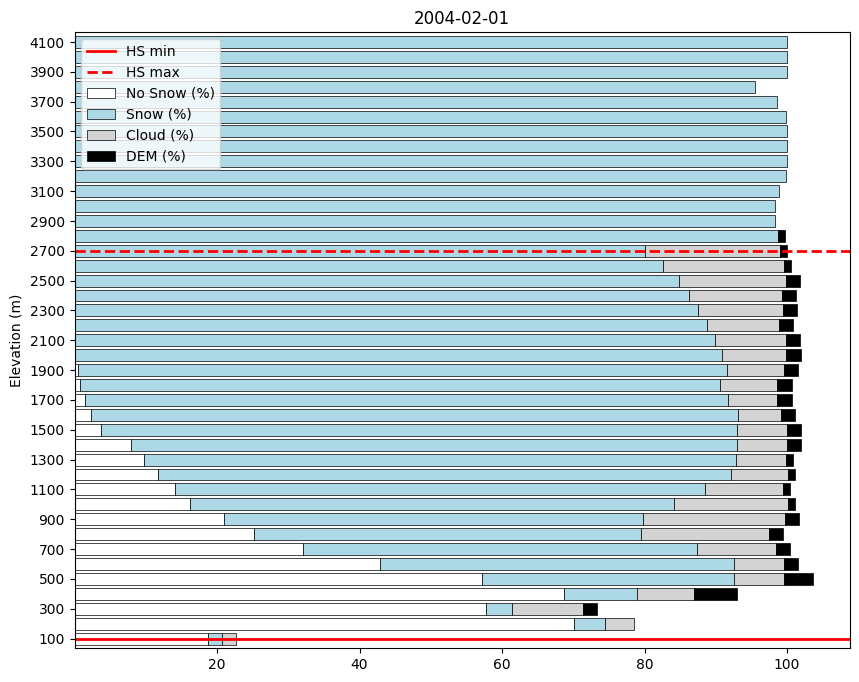

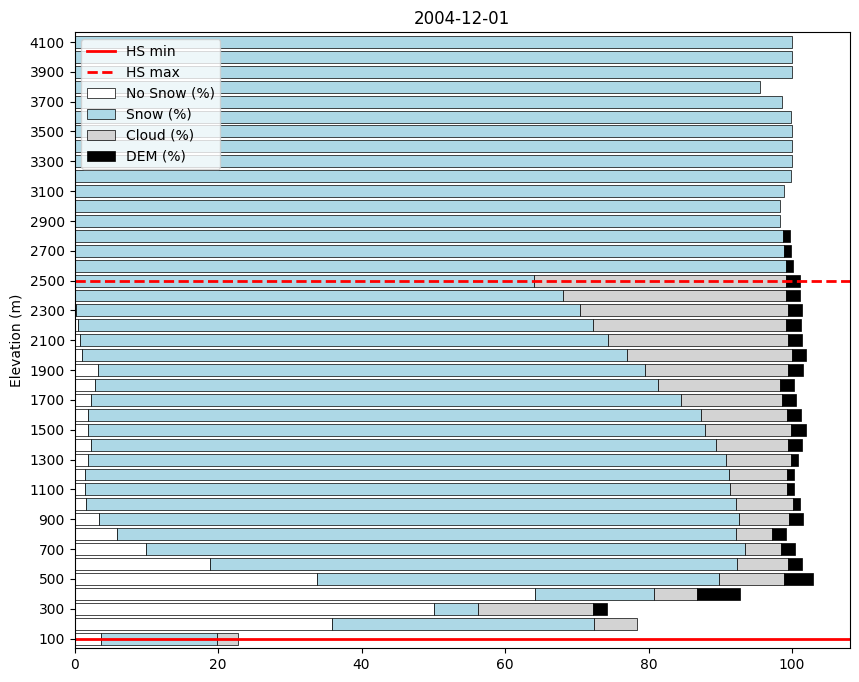

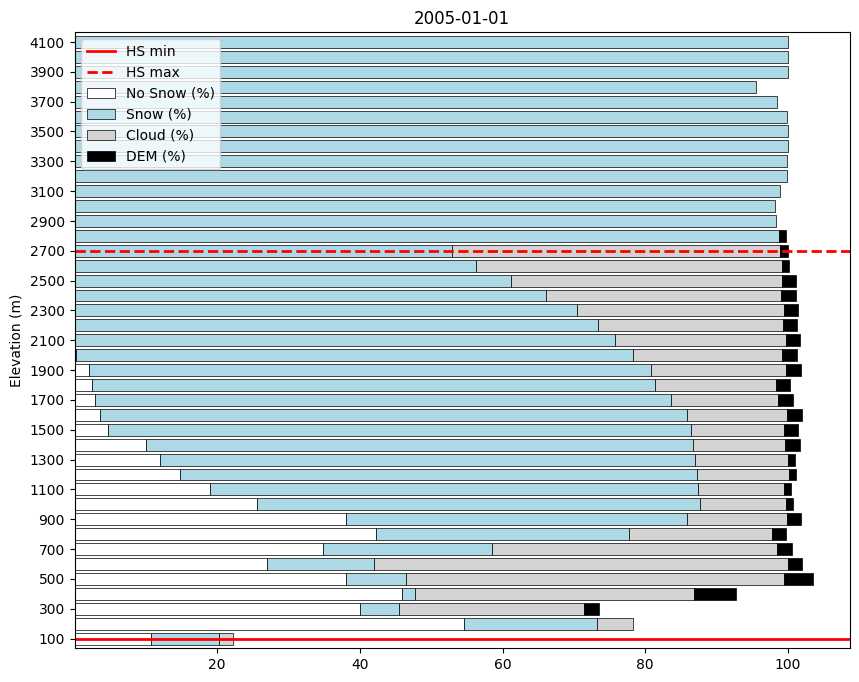

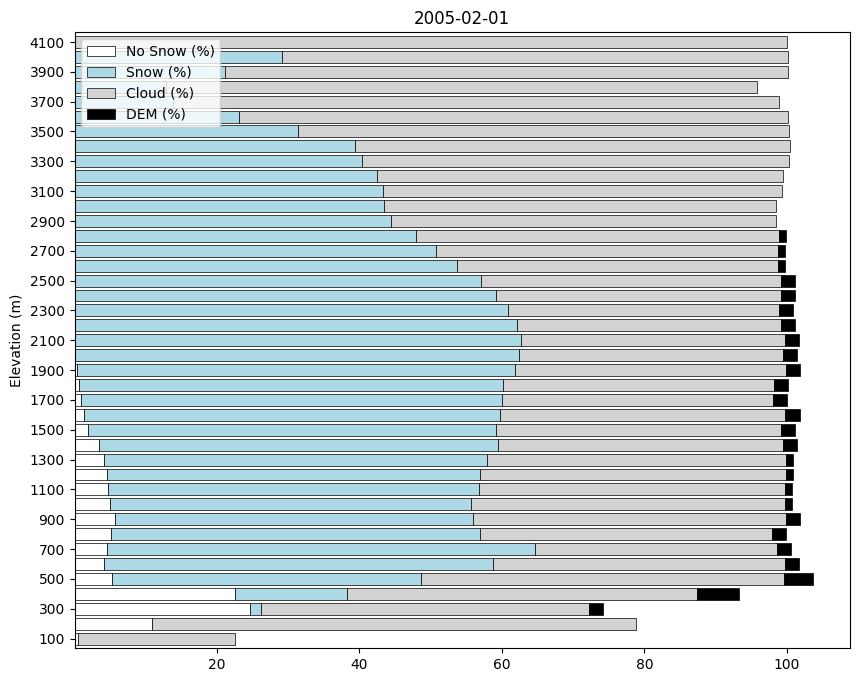

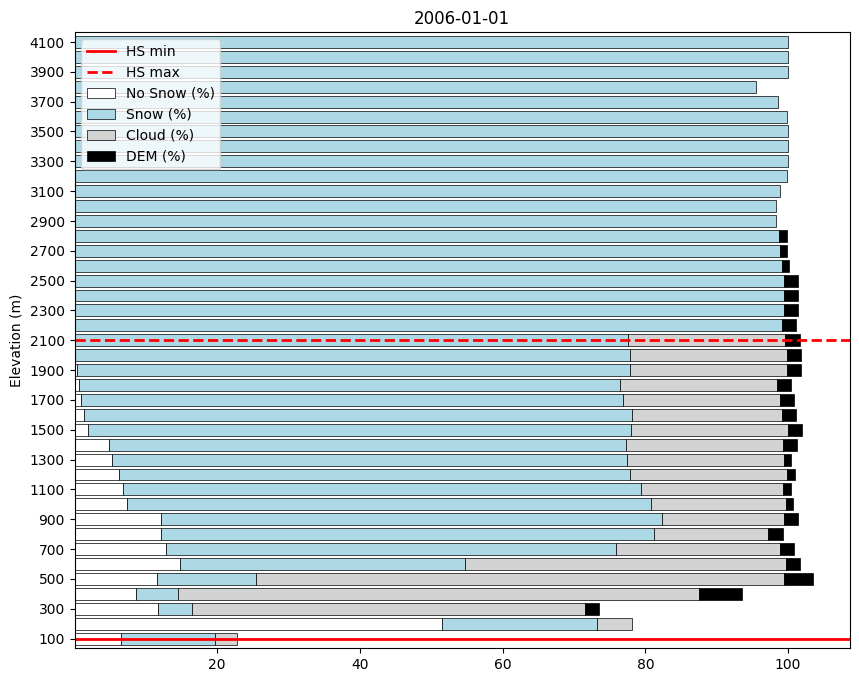

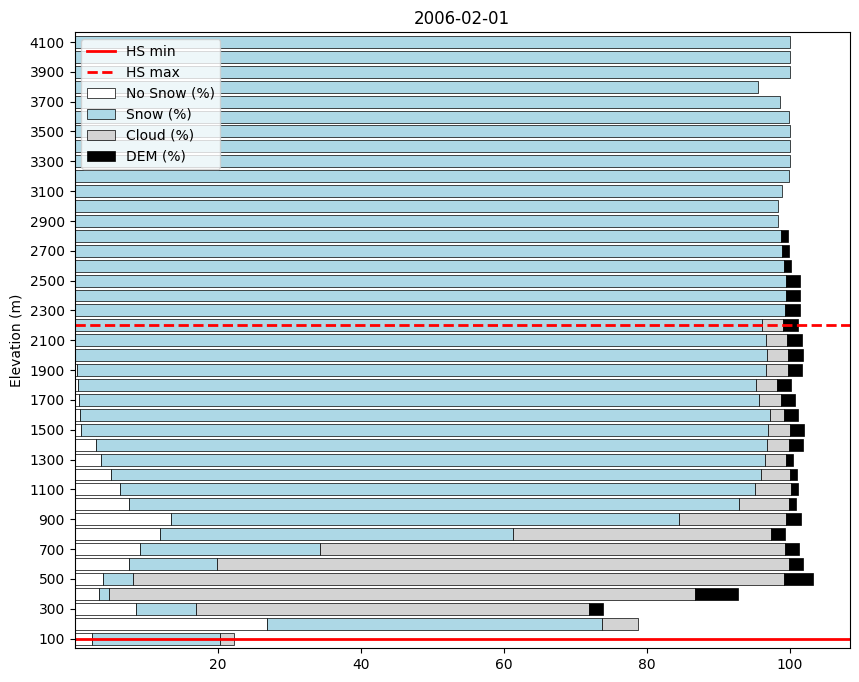

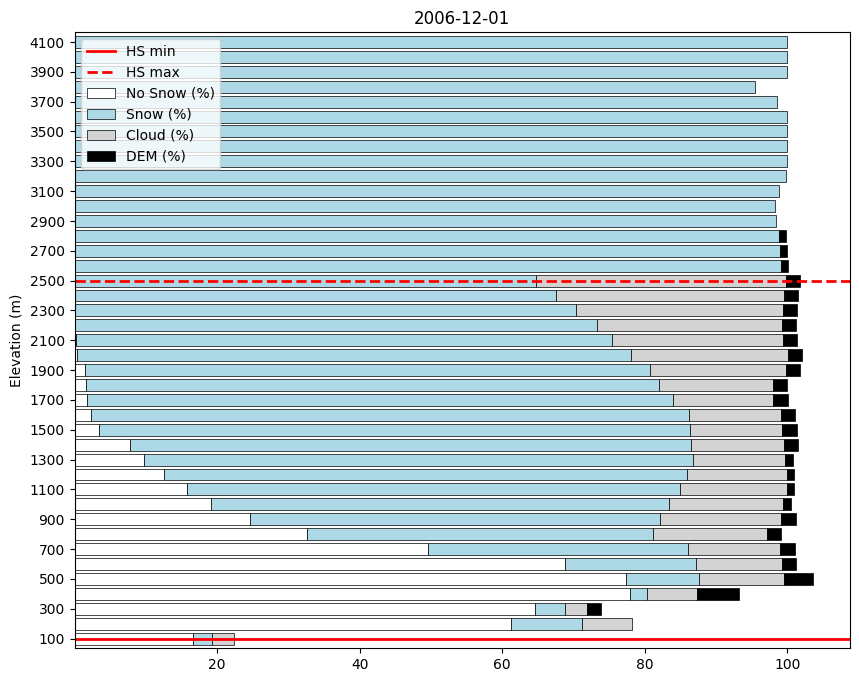

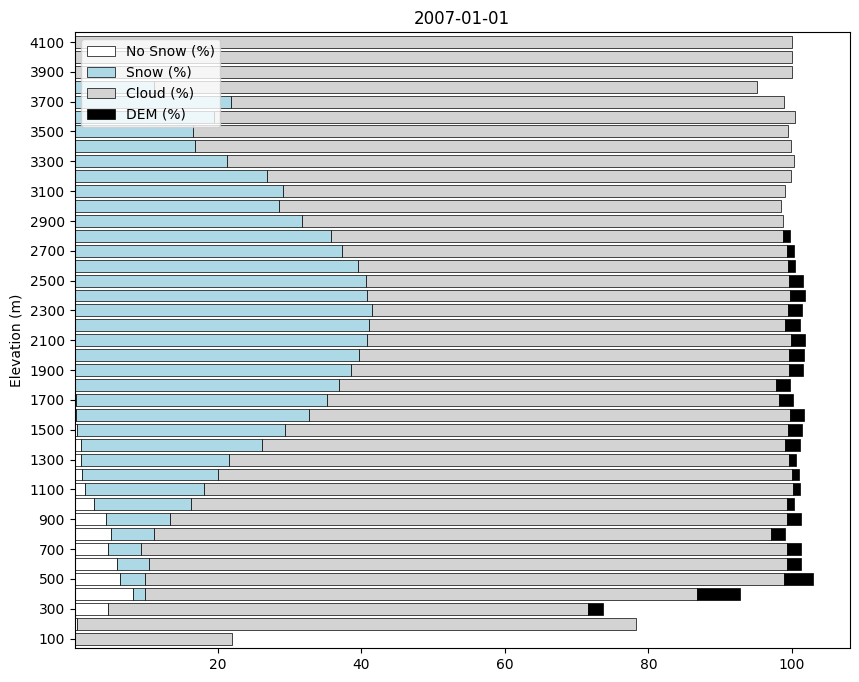

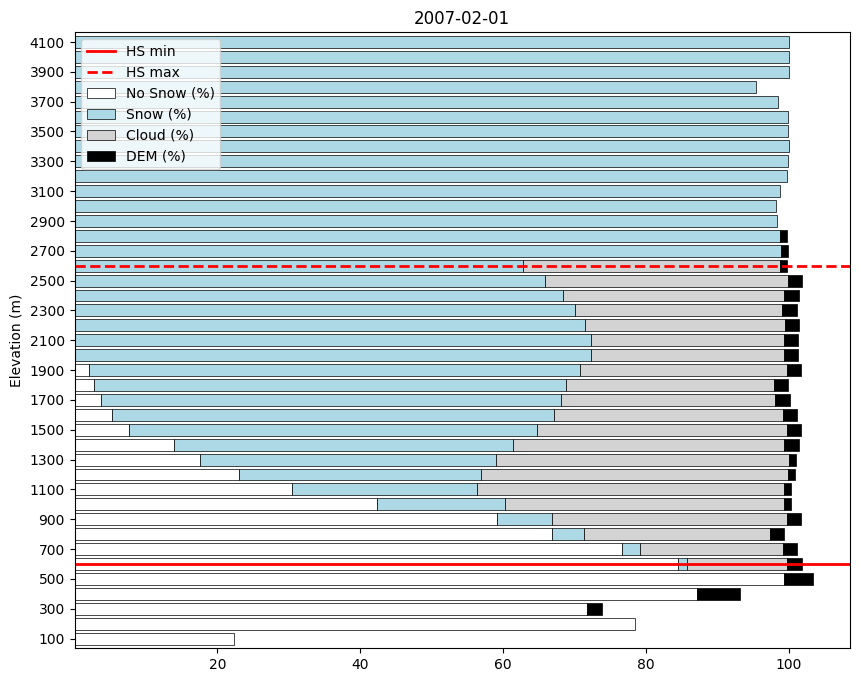

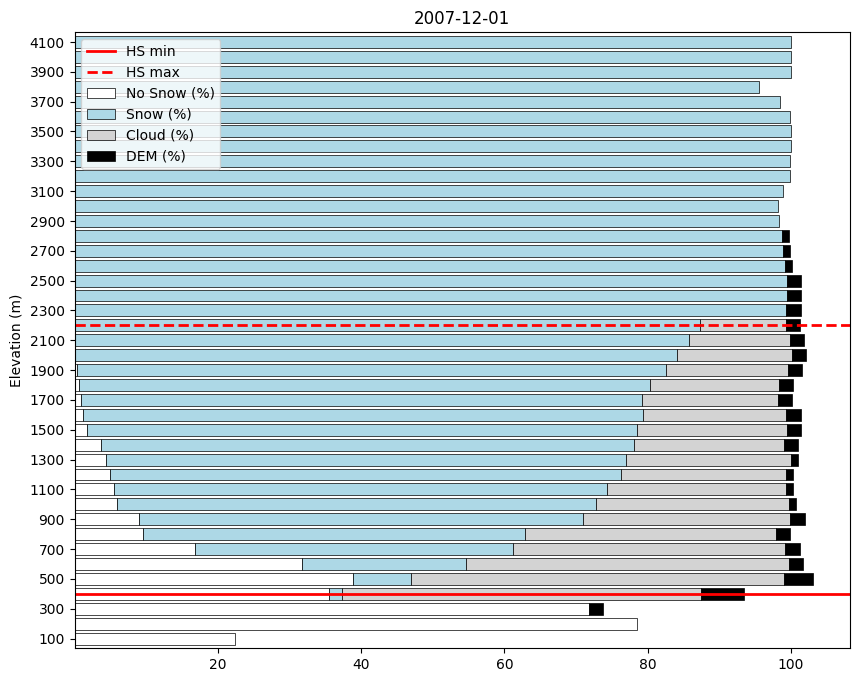

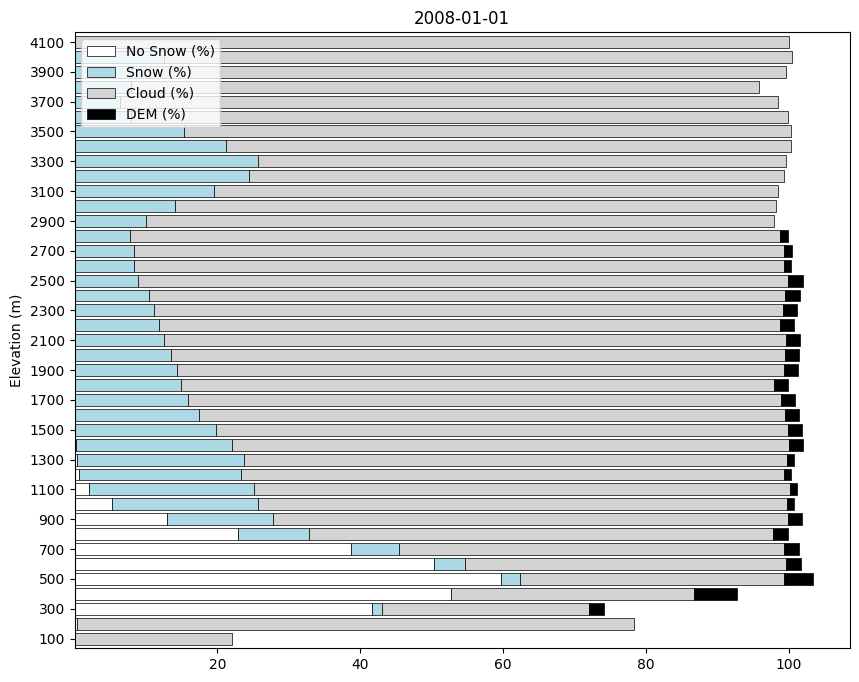

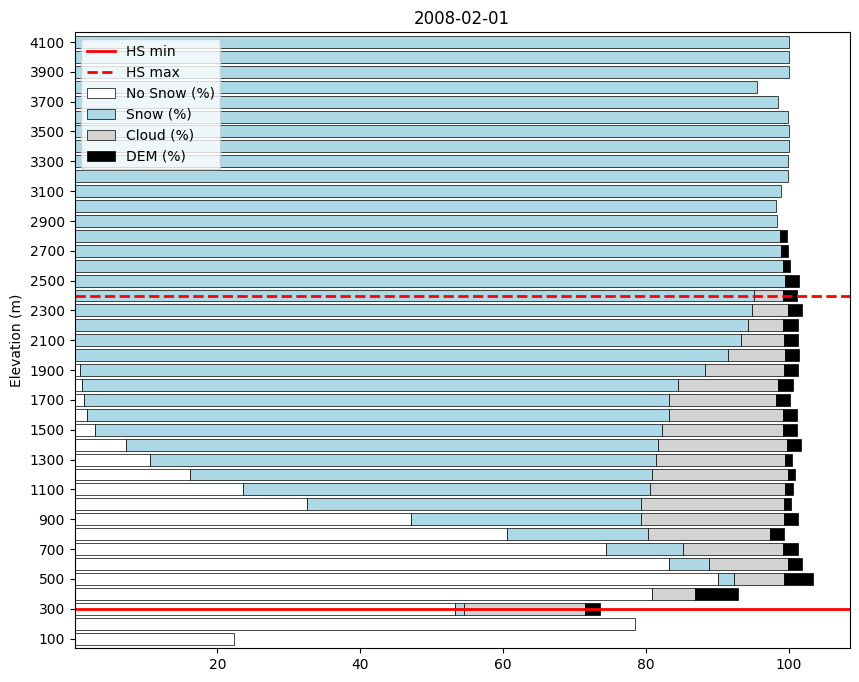

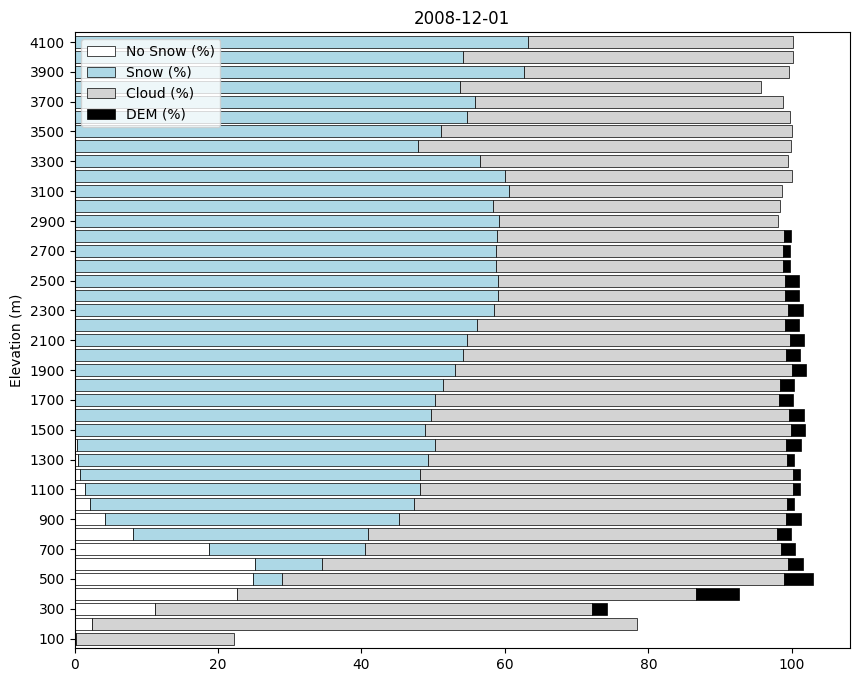

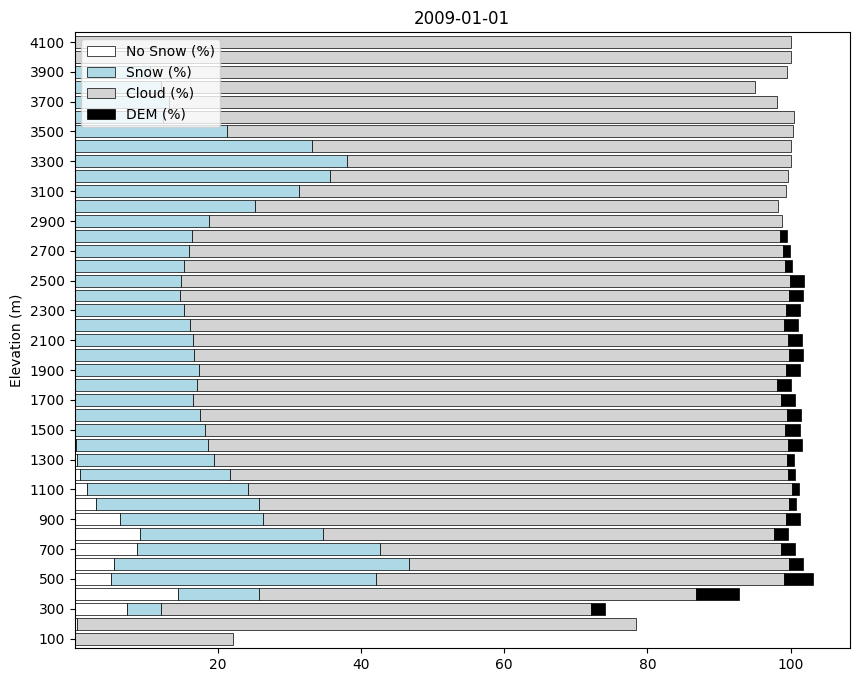

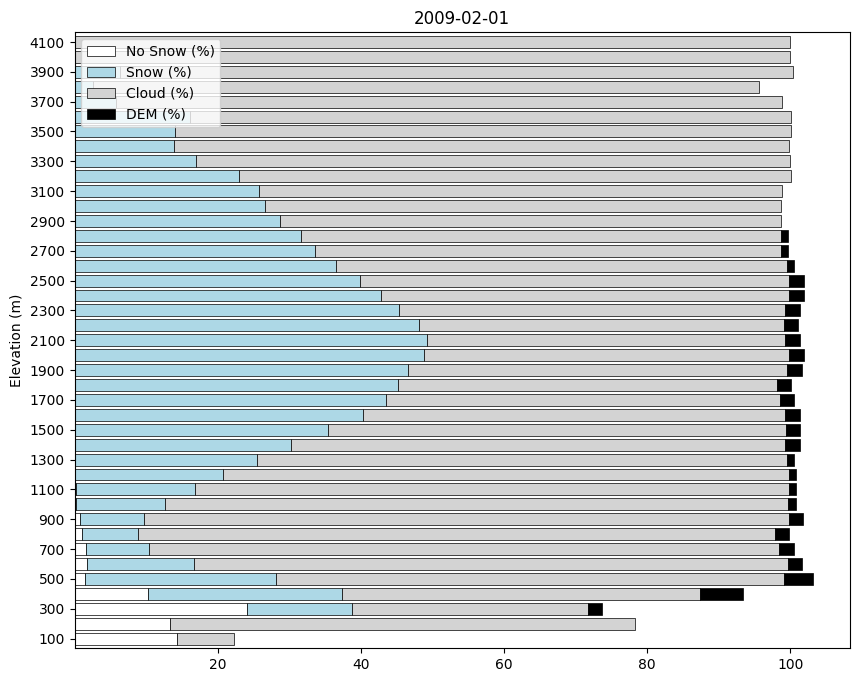

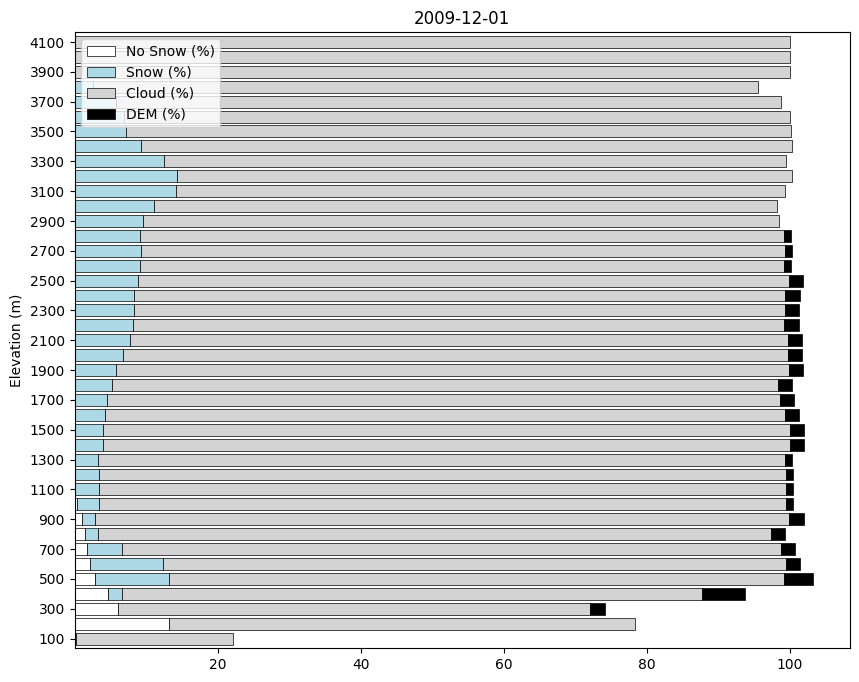

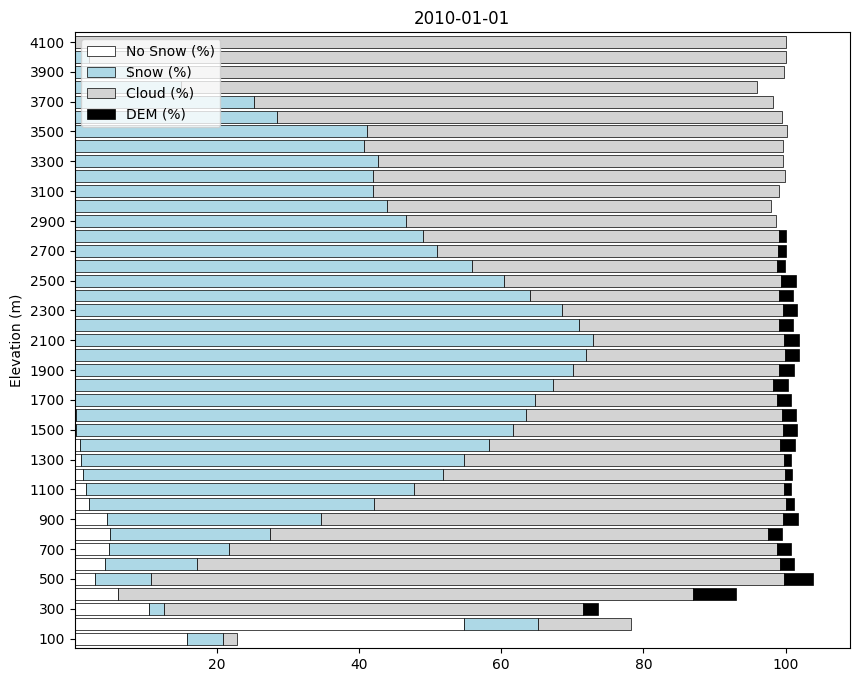

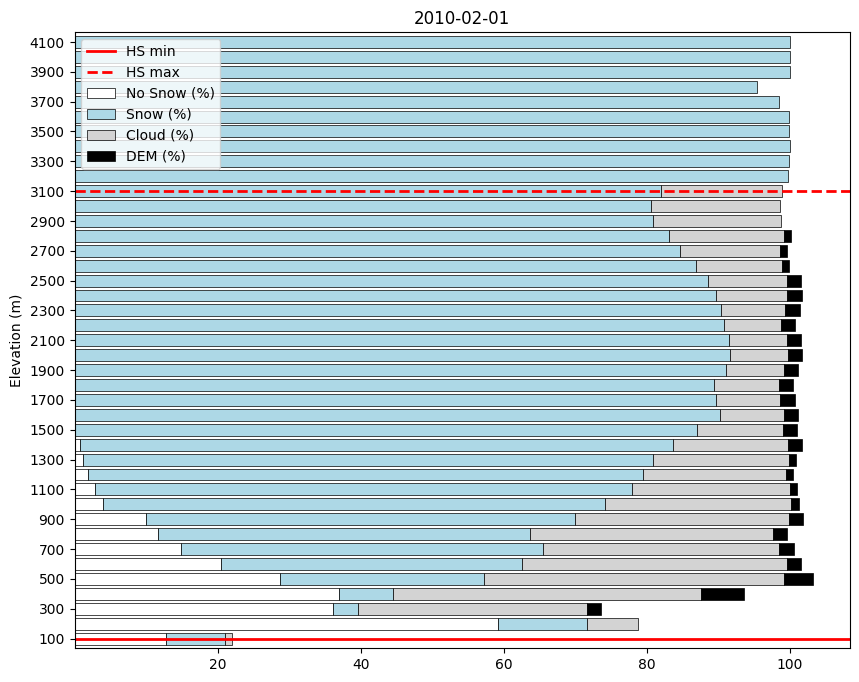

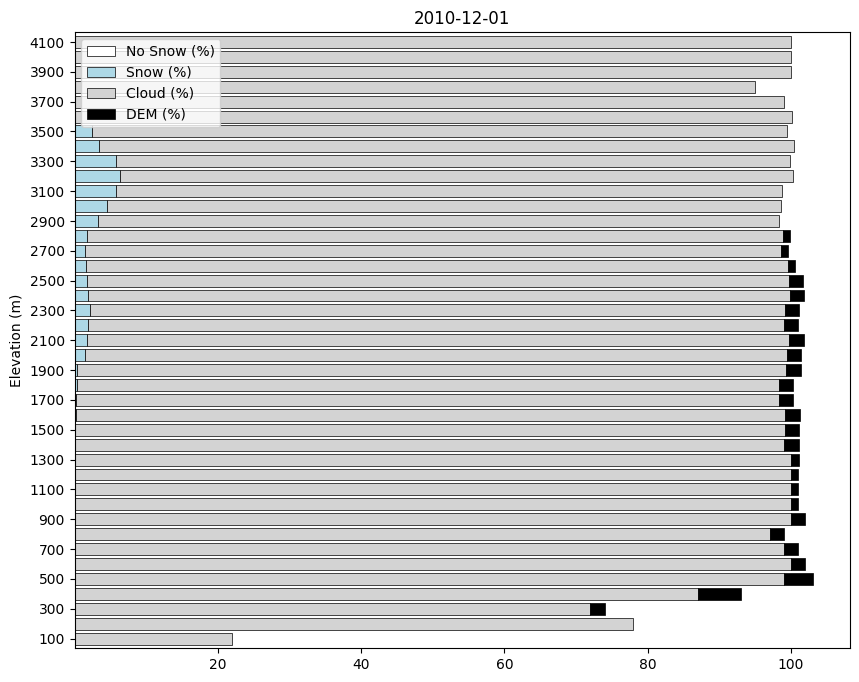

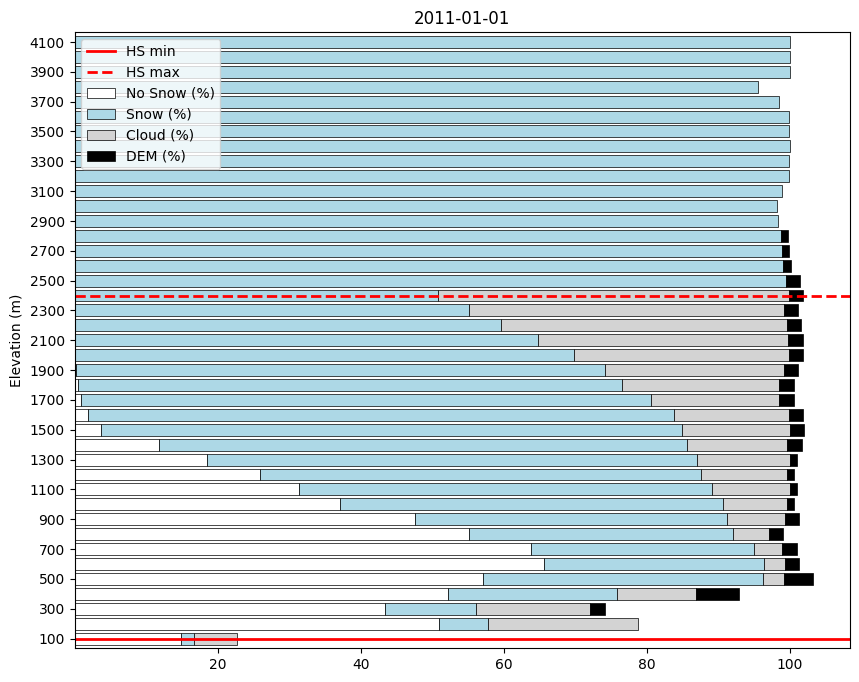

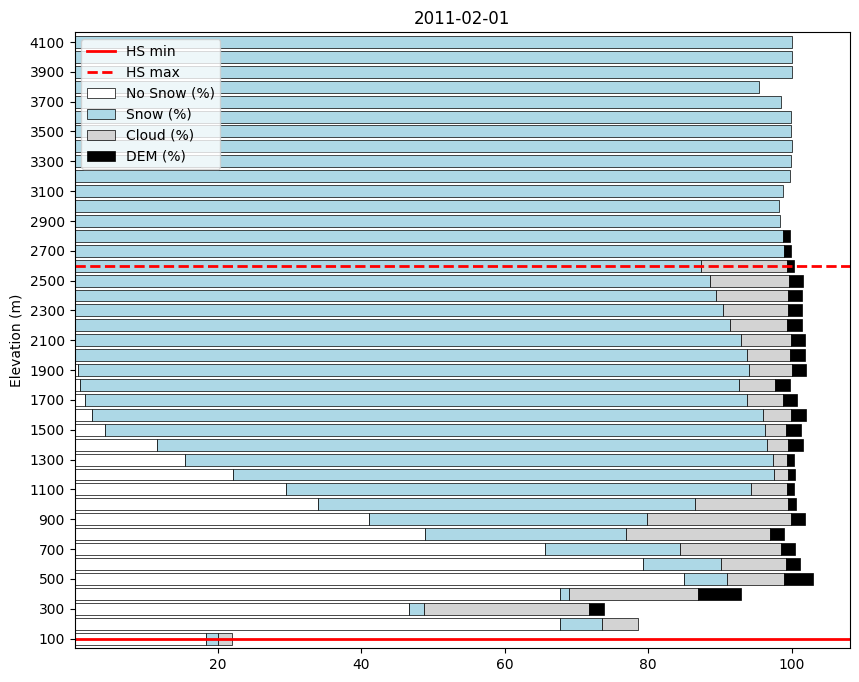

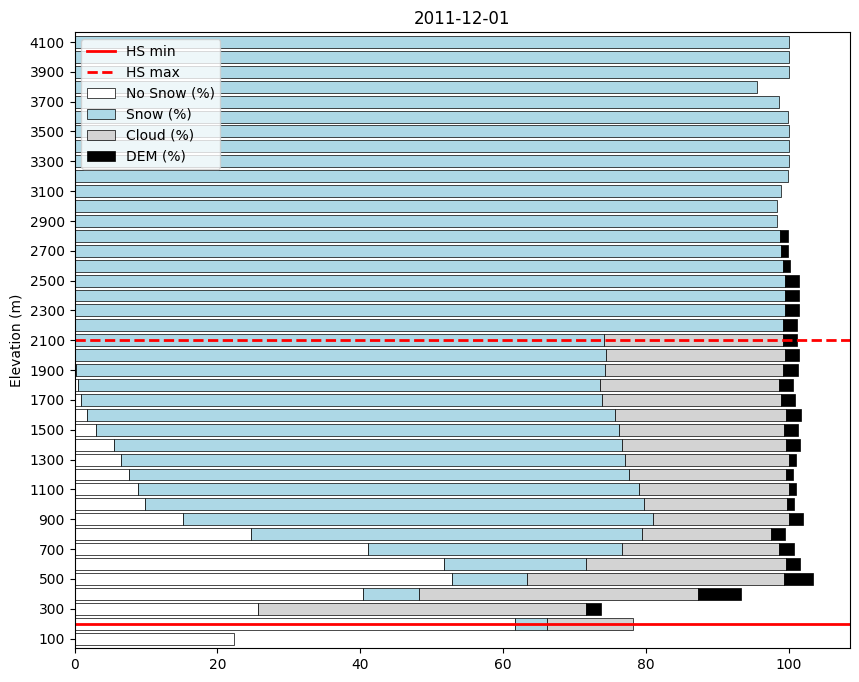

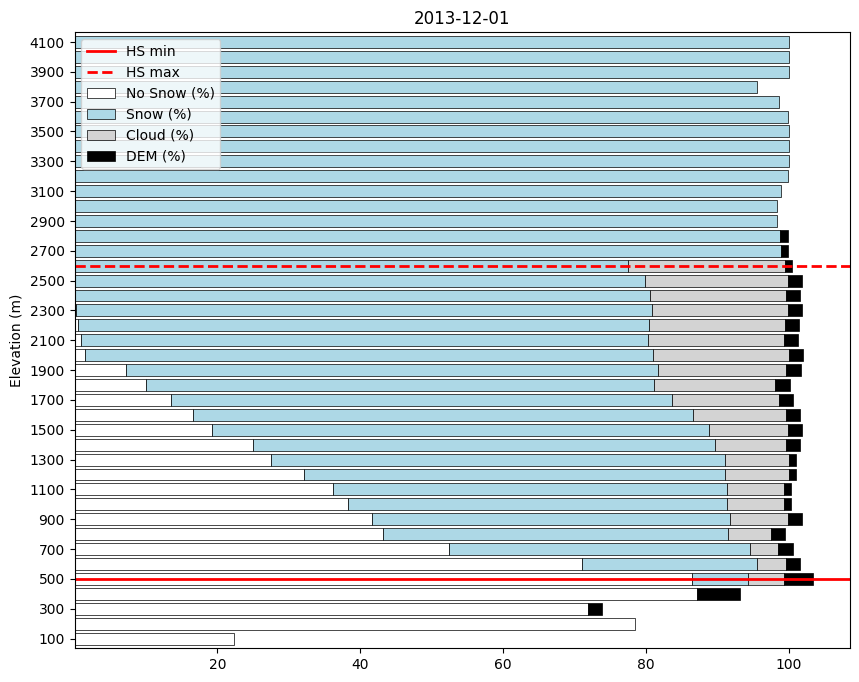

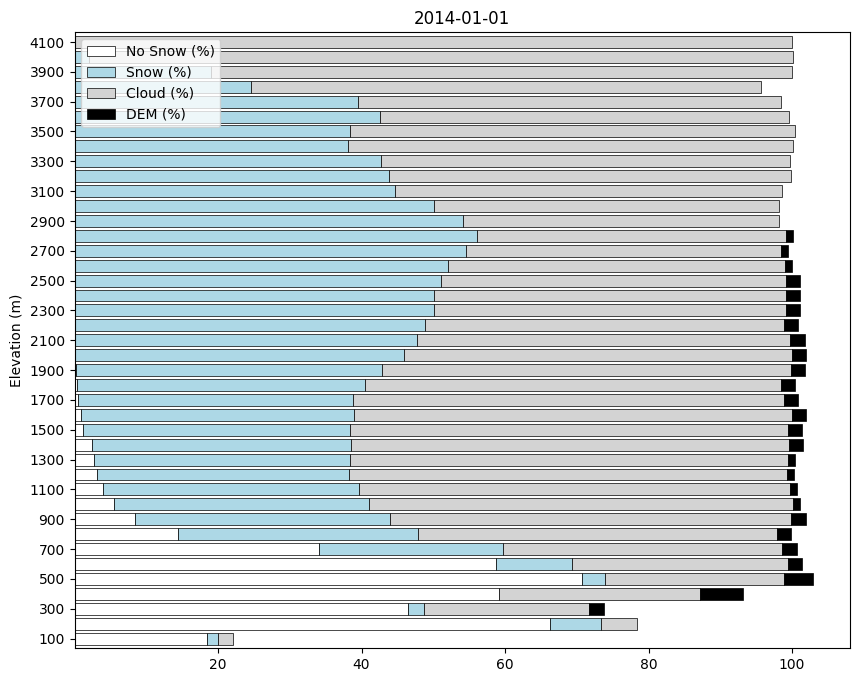

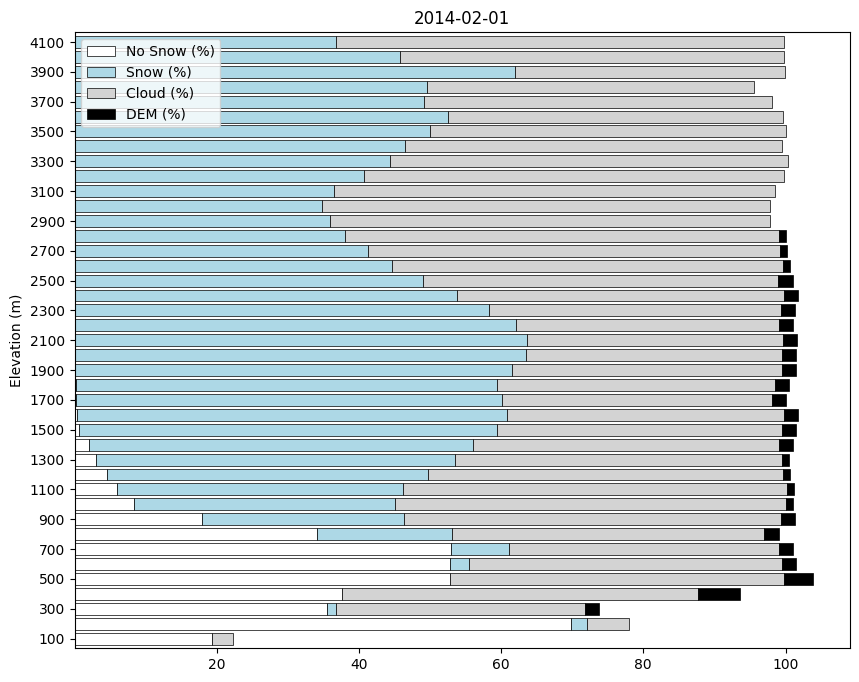

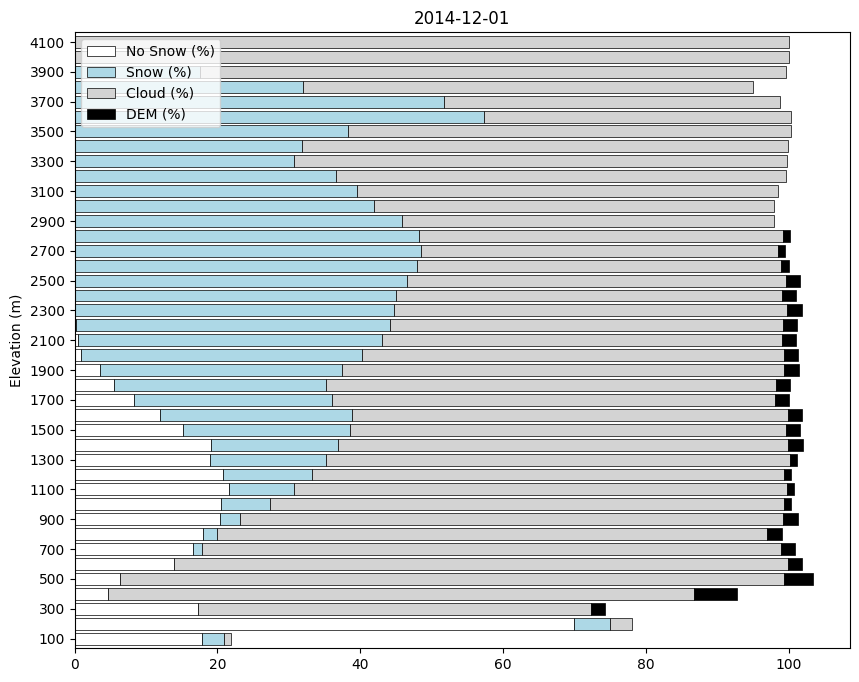

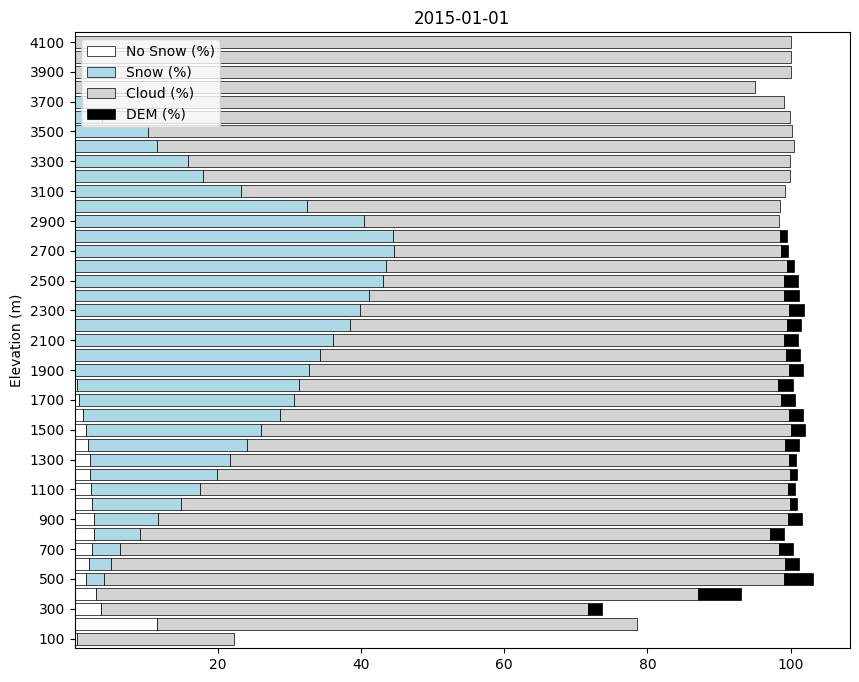

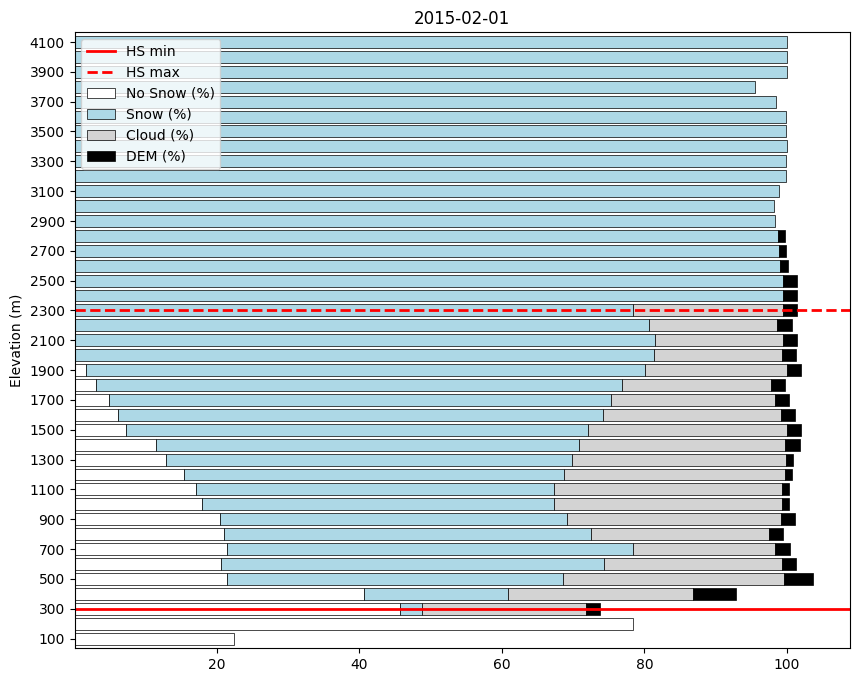

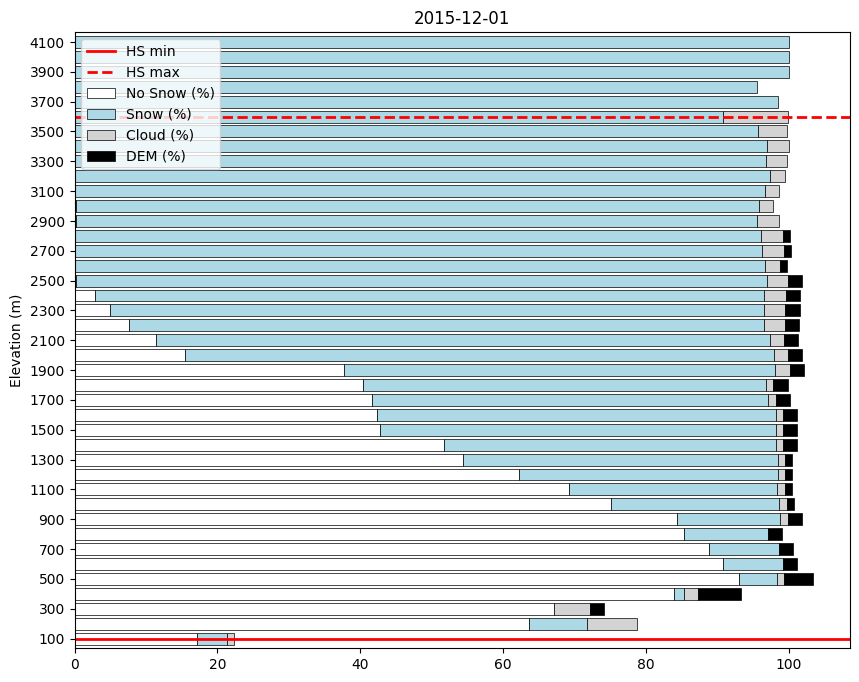

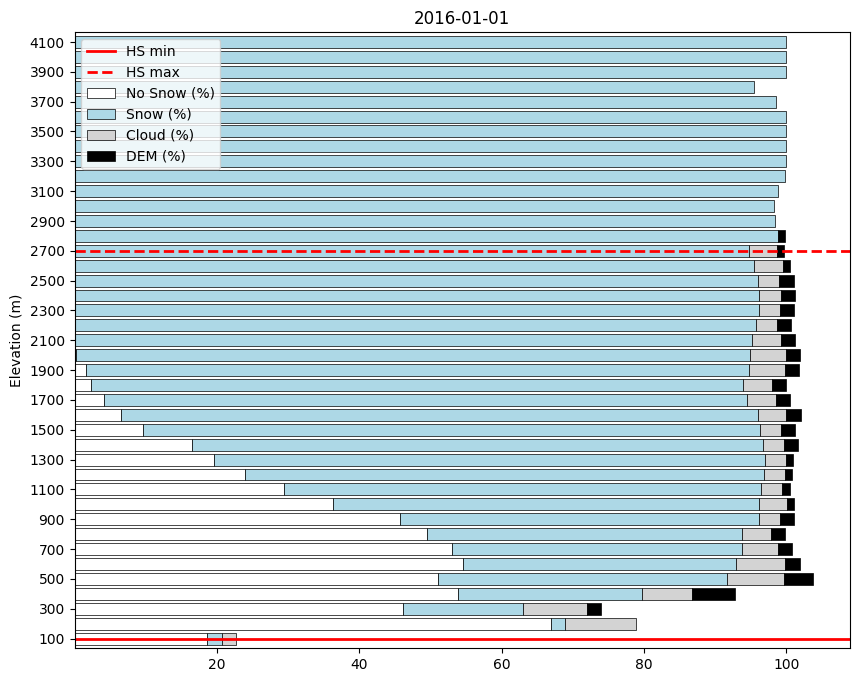

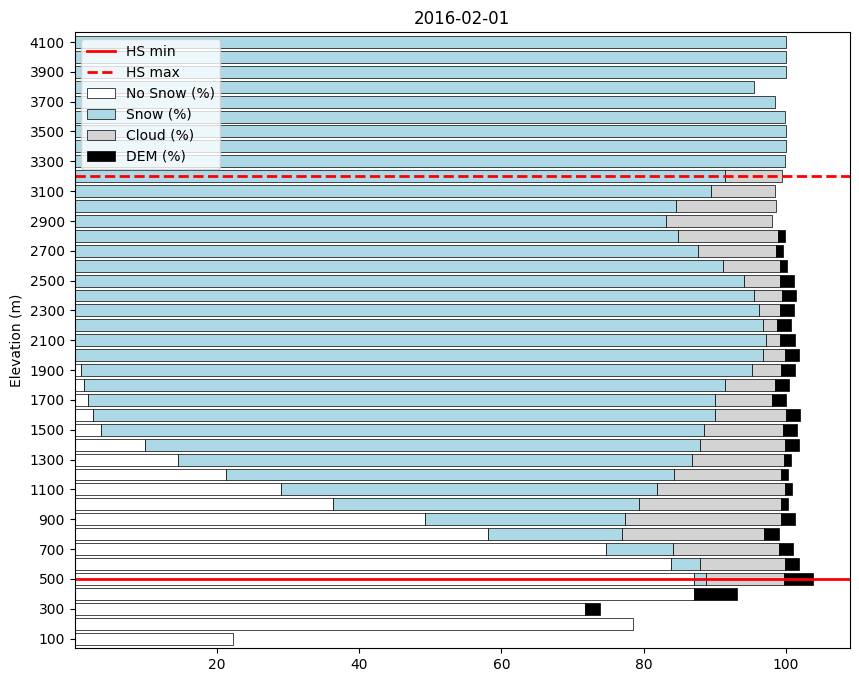

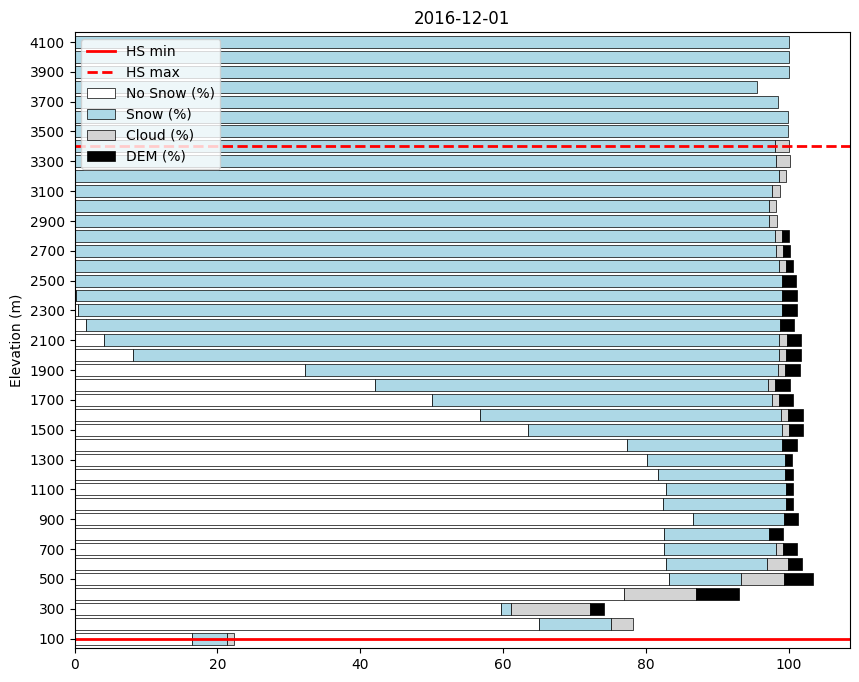

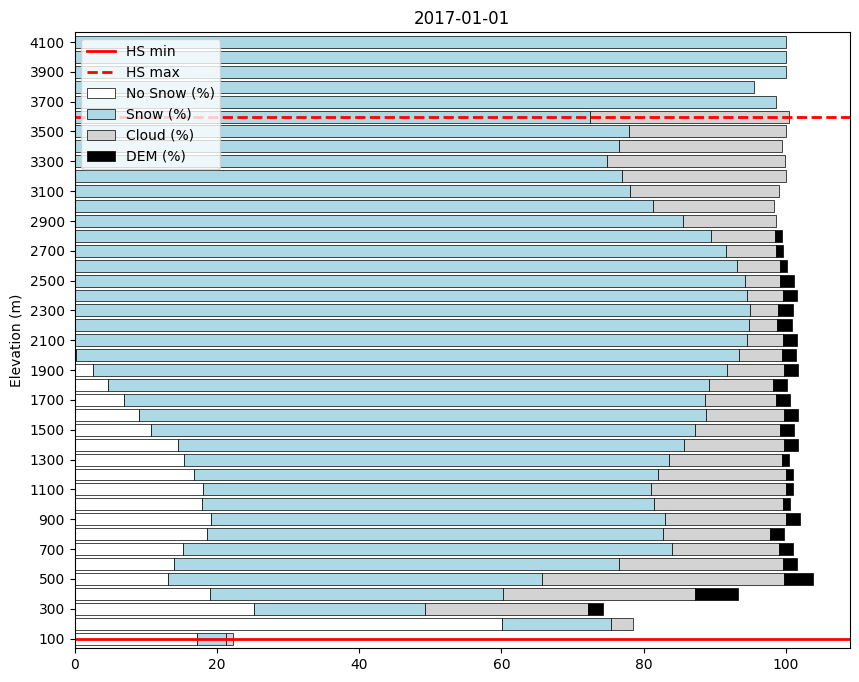

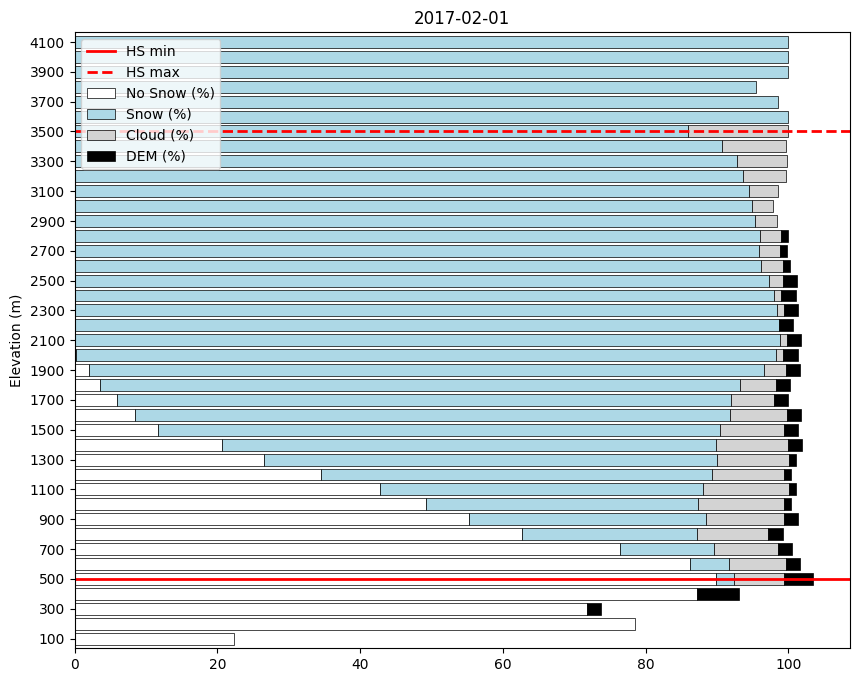

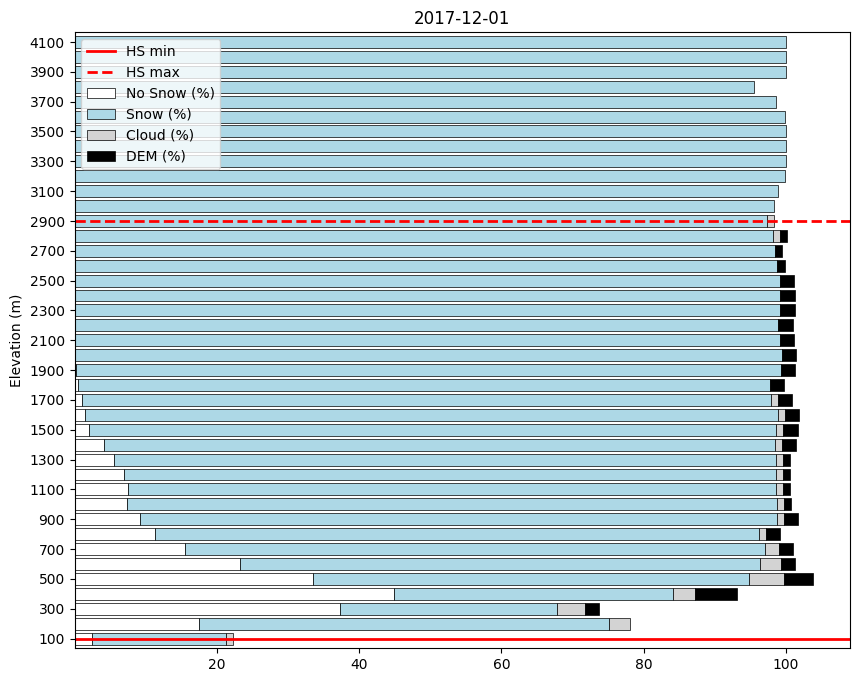

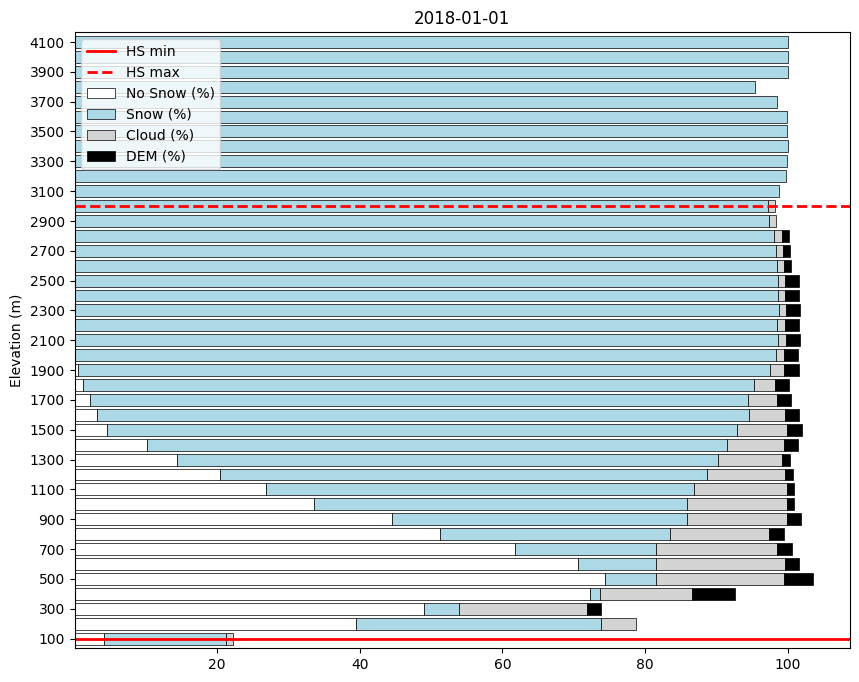

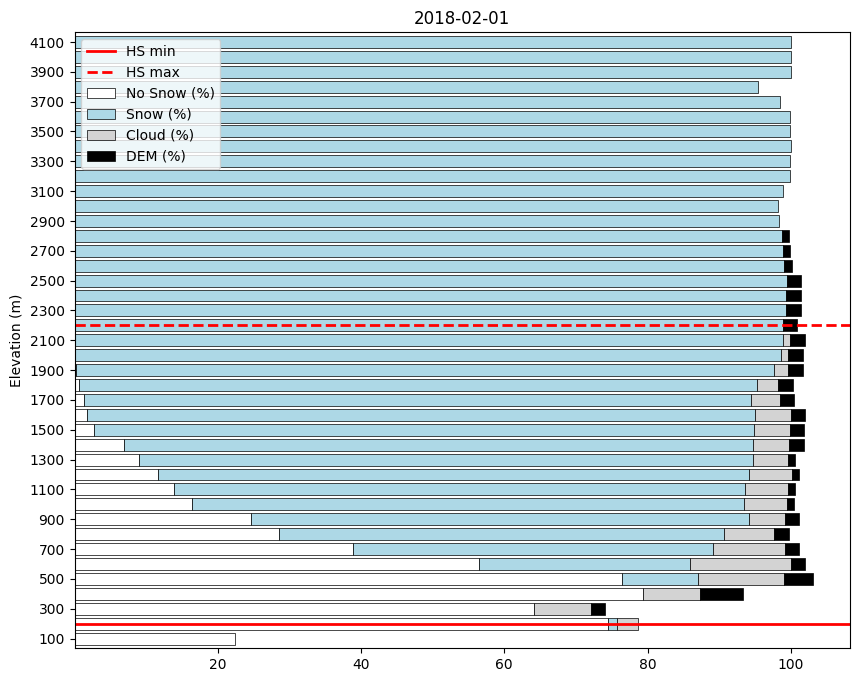

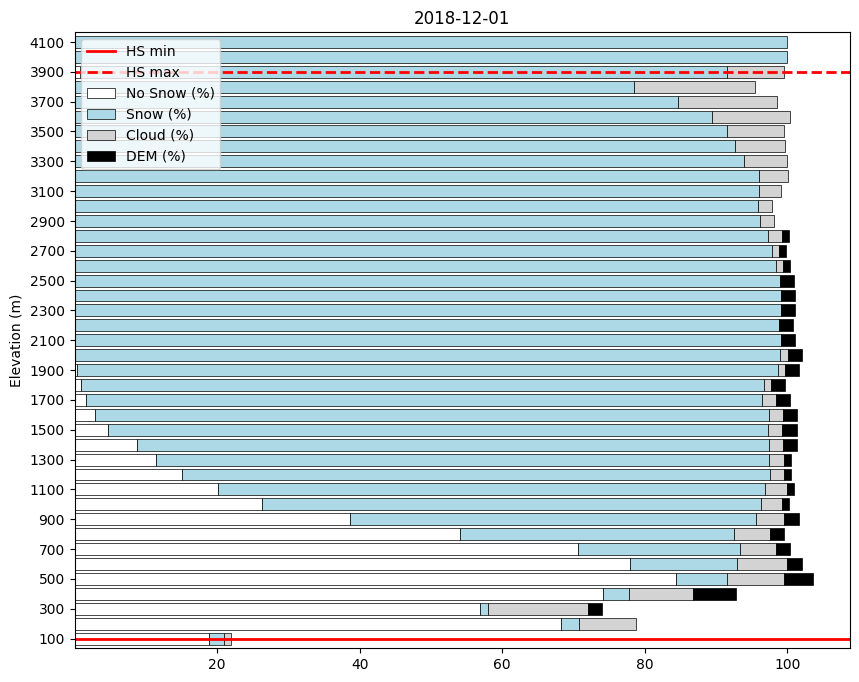

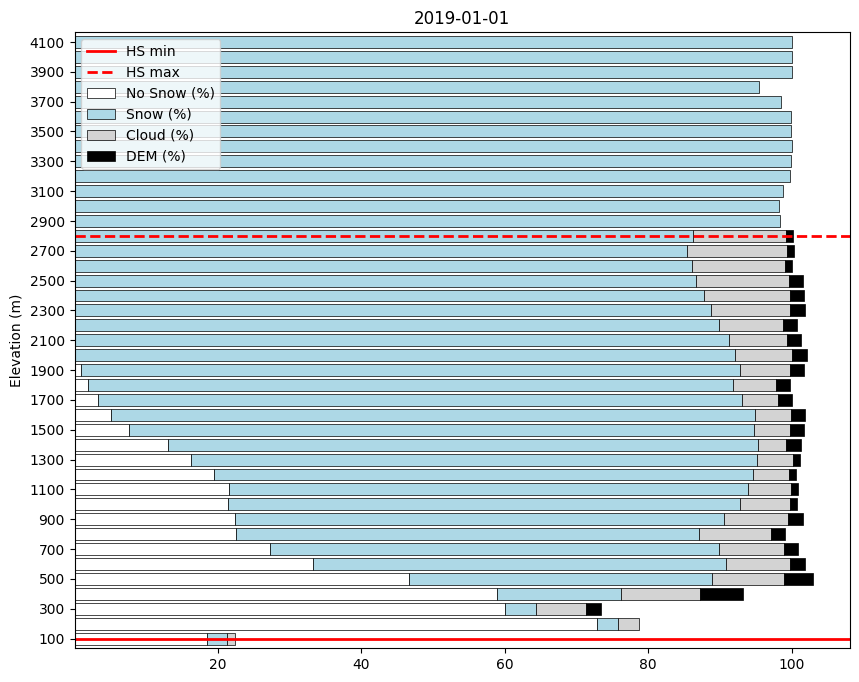

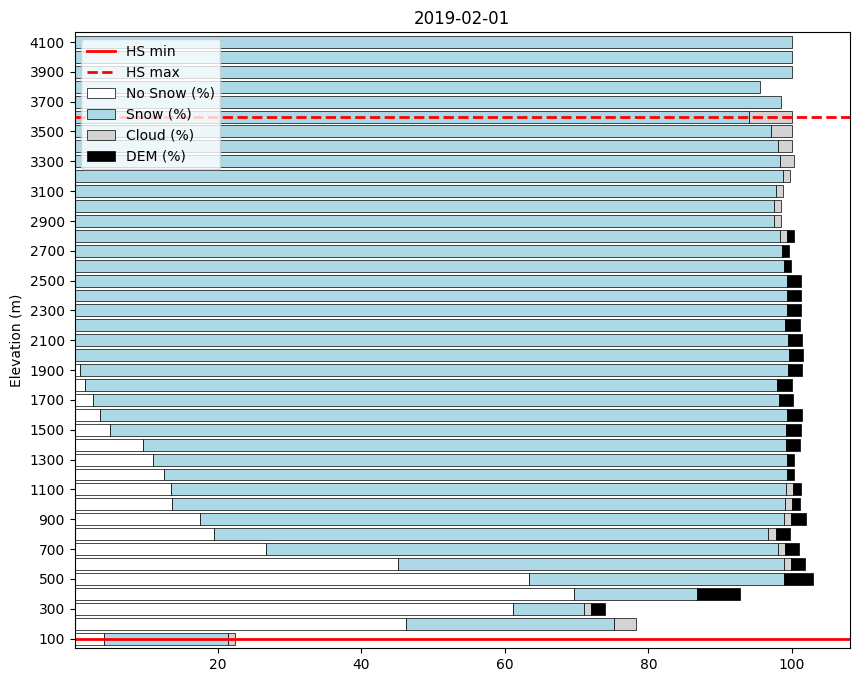

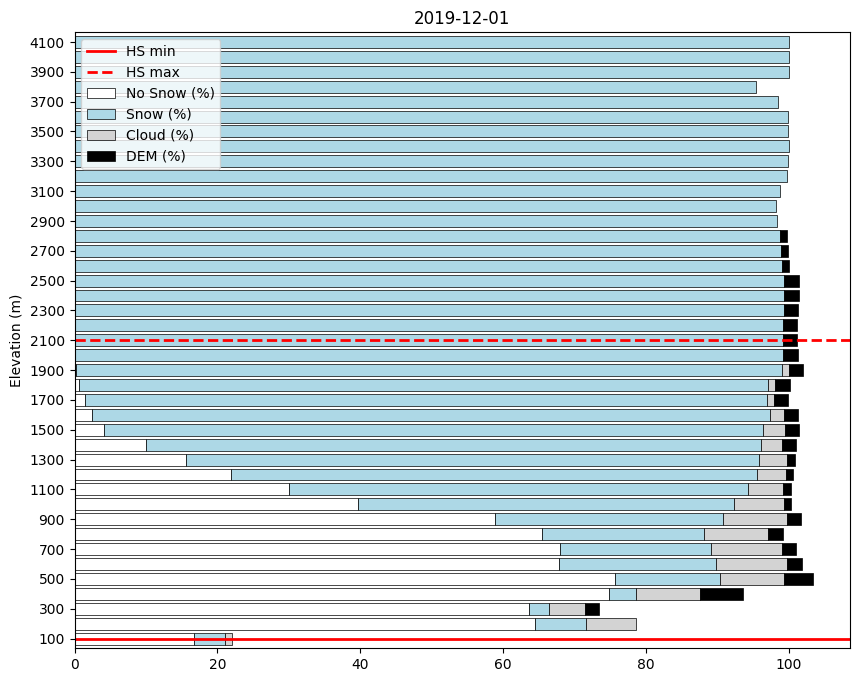

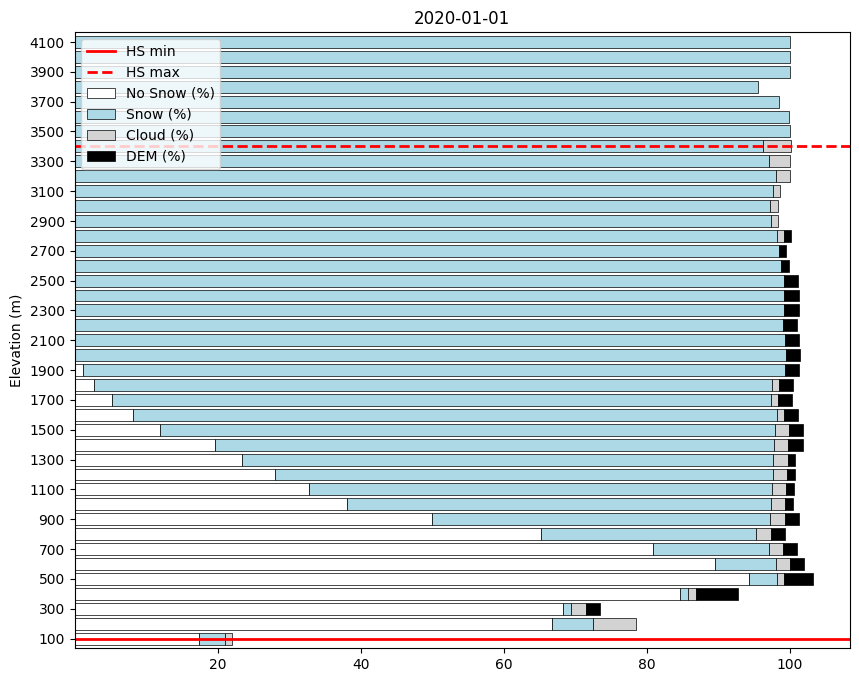

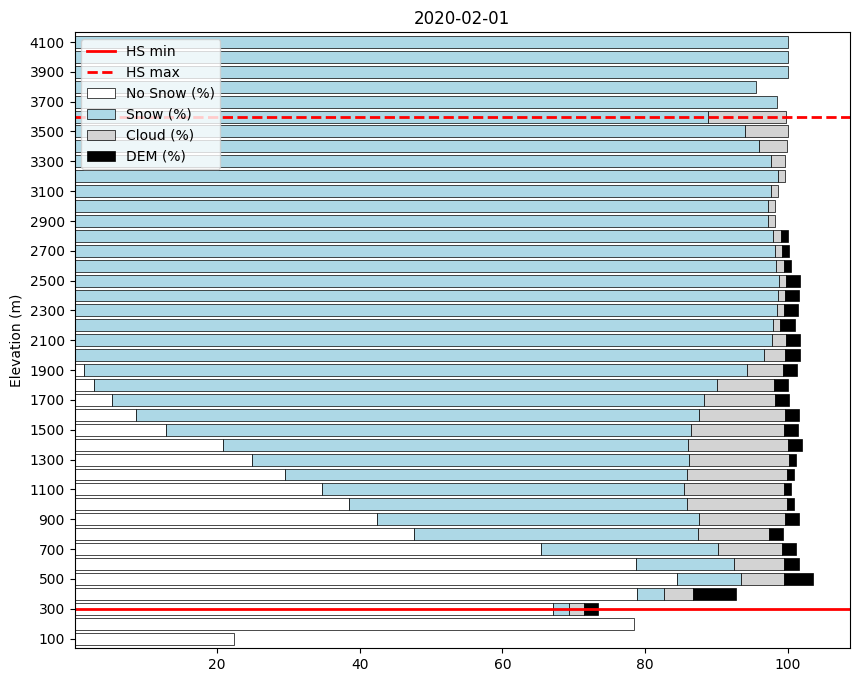

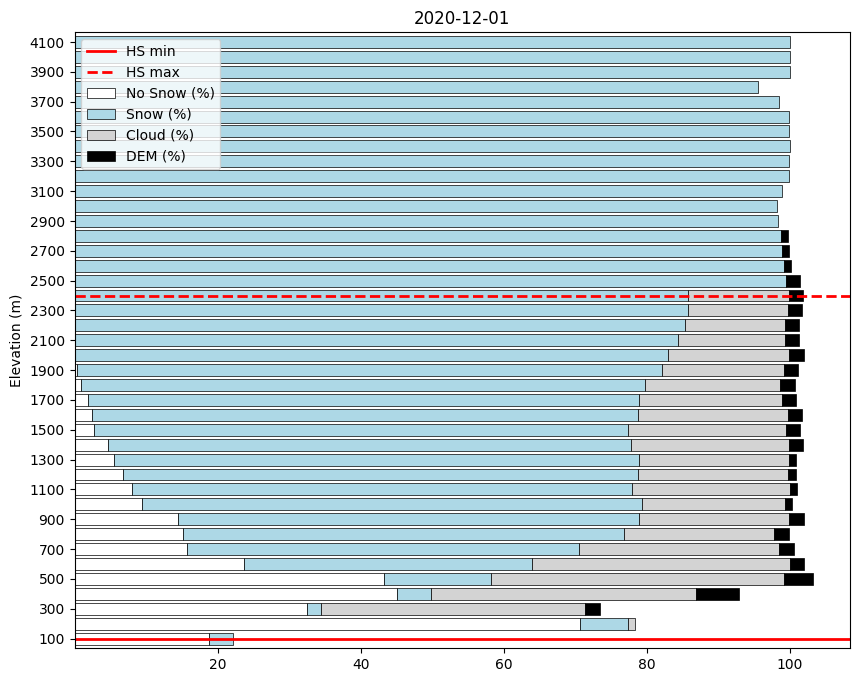

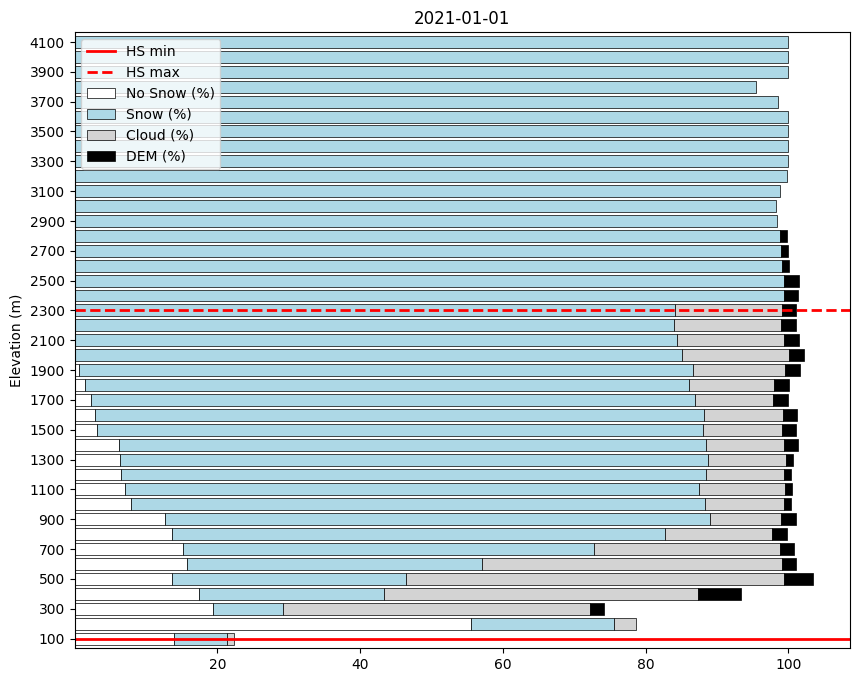

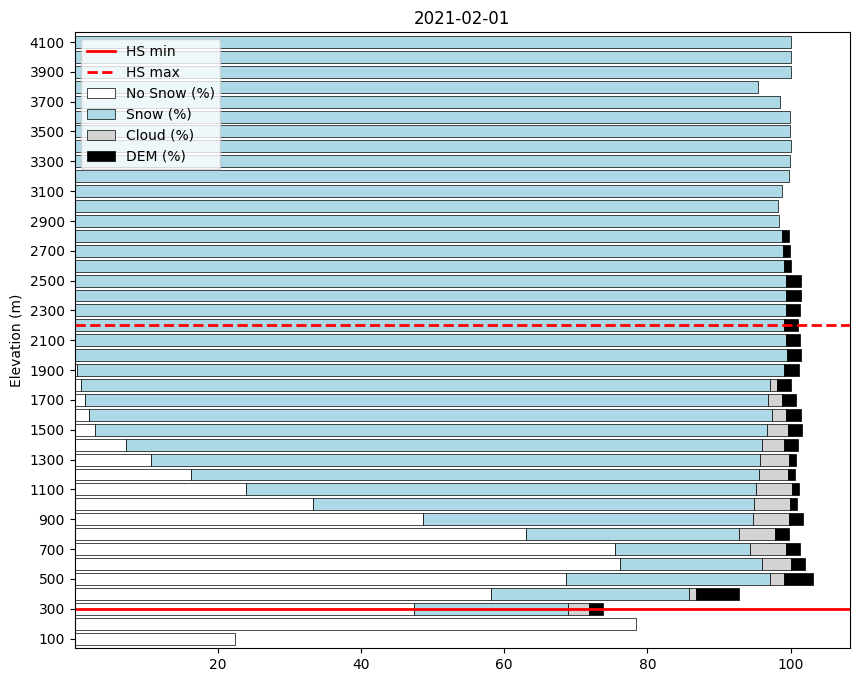

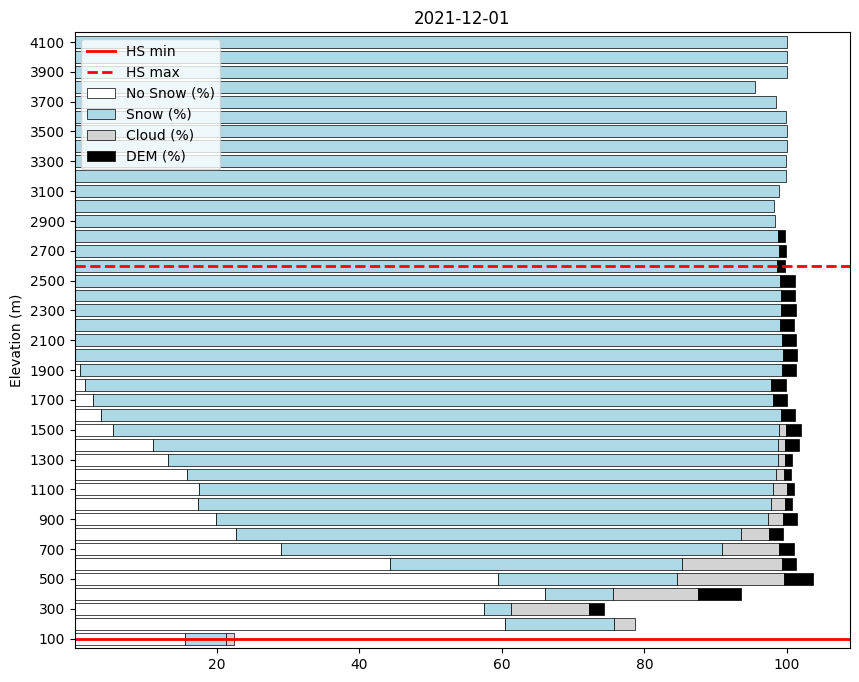

In [37]:
#####faire ce script pour tt les time
###Peut être intéressant de faire cela
#### les bar plot ne sont pas tous = 100 car il y a les NA (lac etc.) qui ne sont pas montré mais comptabilisé

# Créer une liste pour stocker les DataFrames résultants
result_list = []

for i, (date, HS_min, HS_max) in enumerate(zip(dataset_step3.z.values, hs_min_list,hs_max_list)):
    dem_values = NDSI_SON.DEM100.values.flatten()
    snow_values = dataset_step3.snow_step3.isel(z=i).values.flatten()


    # Créez un DataFrame avec deux colonnes : 'Altitude' et 'Count'
    df = pd.DataFrame({'Altitude': dem_values, 'Snow (%)': np.zeros_like(dem_values), 
                   'No Snow (%)': np.zeros_like(dem_values), 'Cloud (%)': np.zeros_like(dem_values),
                   'DEM %': np.zeros_like(dem_values)})

    # Comptez le nombre de zéros dans 'snow_final' pour chaque valeur d'altitude
    df['No Snow (%)'] = np.where((snow_values == 0) | (snow_values == 200), 1, 0)
    df['Snow (%)'] = np.where((snow_values == 1) | (snow_values == 100), 1, 0)
    df['Cloud (%)'] = np.where(snow_values == 2, 1, 0)

    # Agrégation pour obtenir le nombre total de zéros par valeur d'altitude
    result = df.groupby('Altitude').agg({'No Snow (%)':'mean','Snow (%)':'mean','Cloud (%)':'mean'}).reset_index()
    # Convertir les proportions en pourcentages
    result[['No Snow (%)', 'Snow (%)','Cloud (%)']] *= 100
    result = result.round({'No Snow (%)': 5, 'Snow (%)': 5, 'Cloud (%)': 0})


    # Calculer la proportion d'altitude
    altitude_counts = df['Altitude'].value_counts().reset_index()
    altitude_counts.columns = ['Altitude', 'DEM_Pixels']
    result = pd.merge(result, altitude_counts, on='Altitude')
    result['DEM (%)'] = (result['DEM_Pixels'] / len(dem_values)) * 100
    result = result.round({'DEM (%)': 0})

    result['Cloud Pixels'] = (result['Cloud (%)'] / 100) * result['DEM_Pixels']

    # Arrondir le nombre de pixels à des valeurs entières
    result['Cloud Pixels'] = result['Cloud Pixels'].round().astype(int)
   
    # Ajouter le DataFrame résultant à la liste
    result_list.append(result)
    
    # Enregistrez le DataFrame avec le nom de la date
    time = pd.to_datetime(NDSI_SON.z.isel(z=i).values)
    formatted_date = str(time.strftime('%Y-%m-%d'))
    filename = f'df_per DEM_snowline_{formatted_date}.xlsx'
    filepath = os.path.join('/home/charlottepoussin/Excels/DJF_b', filename)
    result.to_excel(filepath, index=False)


    # Plot et sauvegarde du graphique
    result_bis = result.drop(columns=['DEM_Pixels','Cloud Pixels'])

    # Définir des couleurs personnalisées pour chaque catégorie
    colors = {'No Snow (%)': 'white', 'Snow (%)': 'lightblue', 'Cloud (%)': 'lightgray', 'DEM (%)': 'black'}

    # Tracer le diagramme en barres horizontales cumulées
    ax = result_bis.plot(x='Altitude', kind='barh', stacked=True, color=[colors[col] for col in result_bis.columns[1:]],
                     edgecolor='black', linewidth=.5, width=0.8, figsize=(10, 8))

    ###ajouter les hsmin et hsmax
    if HS_min is not None and HS_min > 0.0:
        ax.axhline(result_bis.set_index('Altitude').index.get_loc(HS_min), color='red', linestyle='-', label='HS min', linewidth=2)
    if HS_max is not None and HS_max < 4200.0:
    #if HS_max is not None:       
        ax.axhline(result_bis.set_index('Altitude').index.get_loc(HS_max), color='red', linestyle='--', label='HS max', linewidth=2)
    #ax.plot([0.,100],[HS_min, HS_min], "k--")

    # Ajouter des étiquettes sur l'axe des y (altitude) tous les deux éléments
    ax.set_yticks(ax.get_yticks()[::2])

    # Ajouter des étiquettes sur l'axe des y (altitude)
    ax.set_yticklabels(range(int(result_bis['Altitude'].min()), int(result_bis['Altitude'].max()) + 1, 200), rotation=0)
    # Ajouter une légende
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

    # Ajouter un titre
    ax.set_title(f'{formatted_date}')
    plt.ylabel('Elevation (m)')
    
    plt.savefig(f'/home/charlottepoussin/graphs/DJF_b/graphsnowline_{formatted_date}.png')    
    plt.show()
    plt.close()  # Fermer la figure pour éviter la superposition des

In [38]:
result_list

[    Altitude  No Snow (%)  Snow (%)  Cloud (%)  DEM_Pixels  DEM (%)  \
 0      100.0     15.55000   2.51722        4.0       52836      0.0   
 1      200.0     57.29238  10.94908       10.0      149903      0.0   
 2      300.0     12.14472   3.94415       56.0      677636      2.0   
 3      400.0      4.42573   1.00802       82.0     2653210      6.0   
 4      500.0      7.74929   3.61885       88.0     1809636      4.0   
 5      600.0     12.37788   7.92067       79.0     1095753      2.0   
 6      700.0     17.32393  12.81750       69.0      835428      2.0   
 7      800.0     23.33370  16.90838       57.0      734547      2.0   
 8      900.0     31.67784  22.49436       45.0      673960      2.0   
 9     1000.0     29.86190  35.35495       35.0      619619      1.0   
 10    1100.0     31.88631  39.30546       29.0      595729      1.0   
 11    1200.0     32.05044  43.48165       24.0      606288      1.0   
 12    1300.0     29.35677  47.26443       23.0      643797     

In [39]:
NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
    DEM100       (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    snow_final5  (z, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

In [40]:
NDSI_SON

<xarray.Dataset>
Dimensions:      (longitude: 7117, latitude: 6200, z: 105)
Coordinates:
  * longitude    (longitude) float64 8.125 8.126 8.126 ... 10.55 10.55 10.55
  * latitude     (latitude) float64 47.85 47.85 47.85 ... 45.74 45.74 45.74
  * z            (z) datetime64[ns] 1984-12-01 1985-01-01 ... 2021-12-01
Data variables:
    DEM          (latitude, longitude) float32 ...
    snow_final3  (z, latitude, longitude) float32 ...
    snow_final4  (z, latitude, longitude) float32 ...
    crs          int32 ...
    DEM100       (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    snow_final5  (z, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.6-23)
    date:         2024-02-08 11:17:36
    crs:          +proj=longlat +datum=WGS84 +no_defs +type=crs

In [41]:
dataset_step3.to_netcdf('NDSI_DJF_afterSL_b_nc.nc')

###j'ouvre mon étude de cas
CS = xr.open_dataset('NDSI_SON_beforSL_b_nc.nc')